# view 1t and 5 kt coeff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
import os, sys
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

# 1t coeff
#### pe

In [2]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9 + f * x**11 + g * x**13 + h * x**15 + i*x**17 + j*x**19
# fit even order, even order is 0
def even_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8 + f * x**10 + g * x**12 + h * x**14 + i*x**16 + j*x**18
# load data
def LoadDataPE(path, radius, order):
    data = []
    H = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    H = eval('np.array(h.root.'+ hess + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data, H


def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    
    data = eval('np.array(h.root.'+ coeff + '[:])')

    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data

(15,)
(15, 154)
(15, 154)


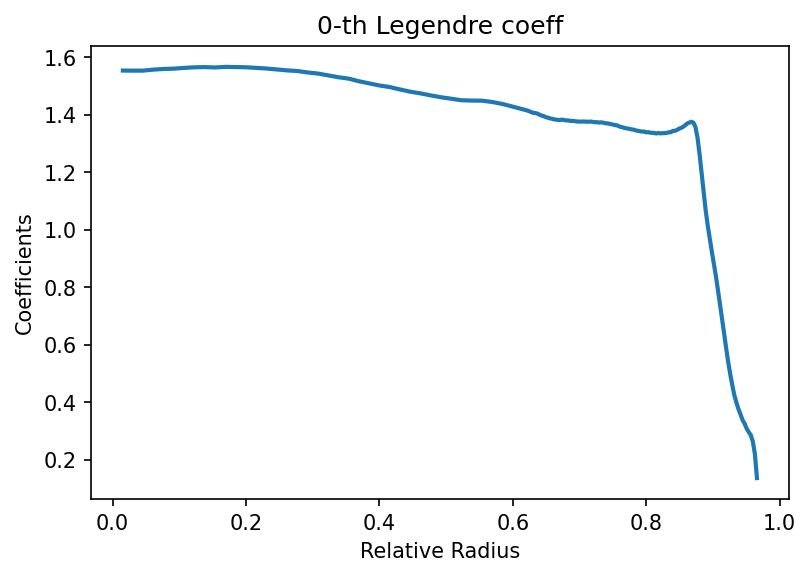

(15, 154)
(15, 154)


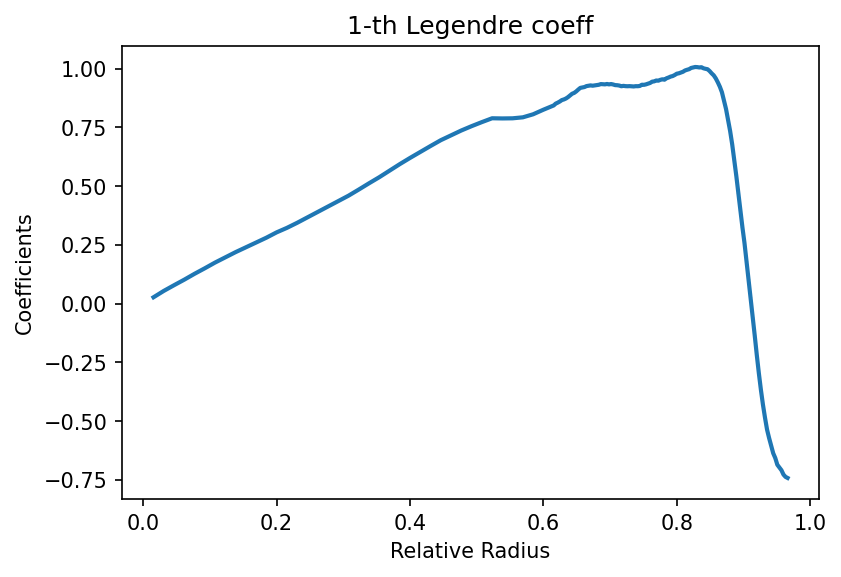

(15, 154)
(15, 154)


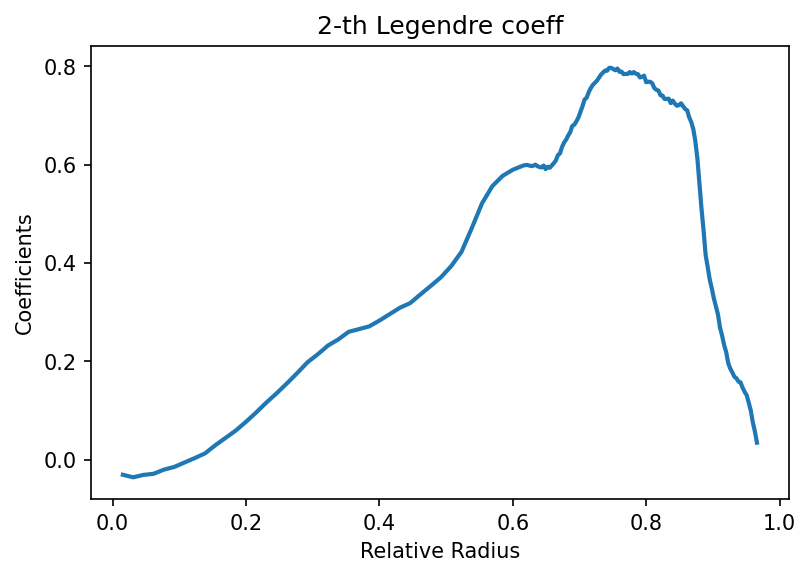

(15, 154)
(15, 154)


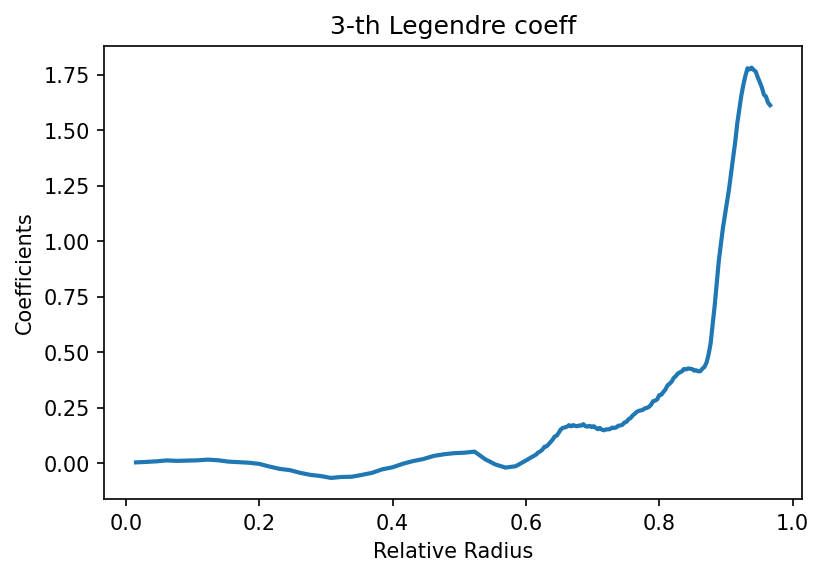

(15, 154)
(15, 154)


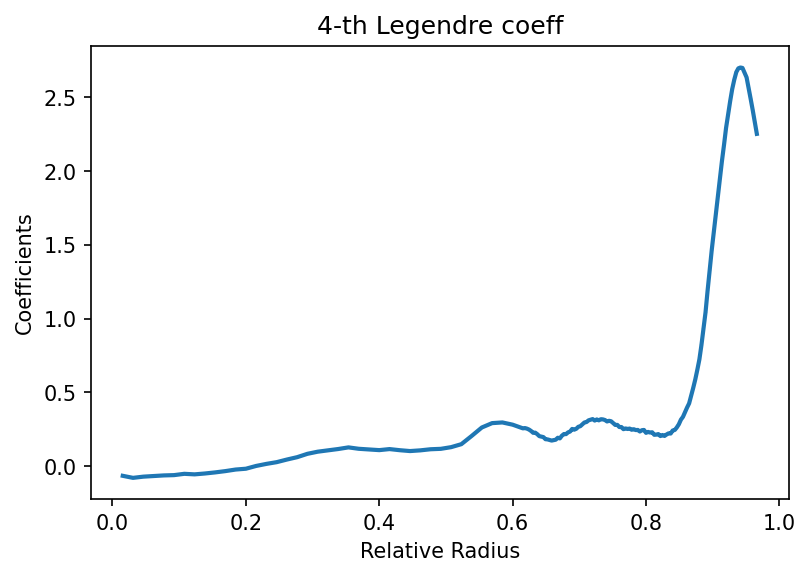

(15, 154)
(15, 154)


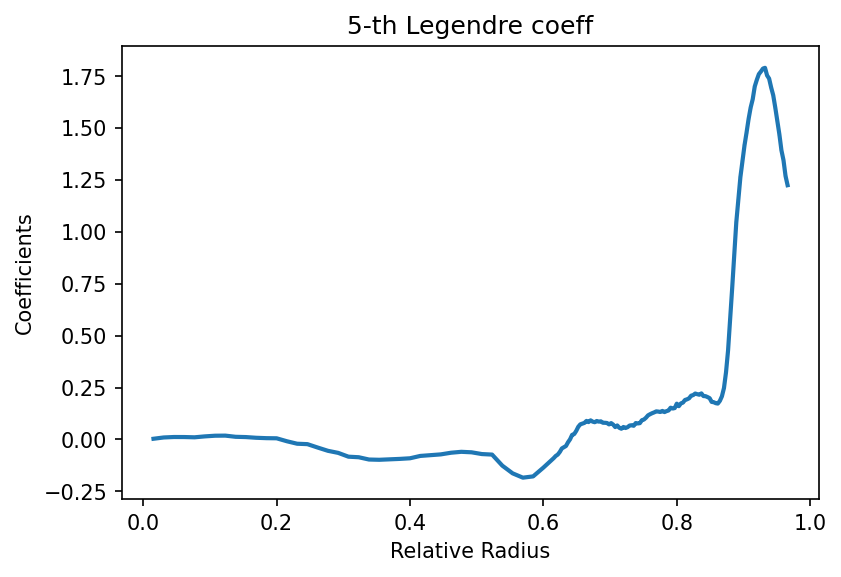

(15, 154)
(15, 154)


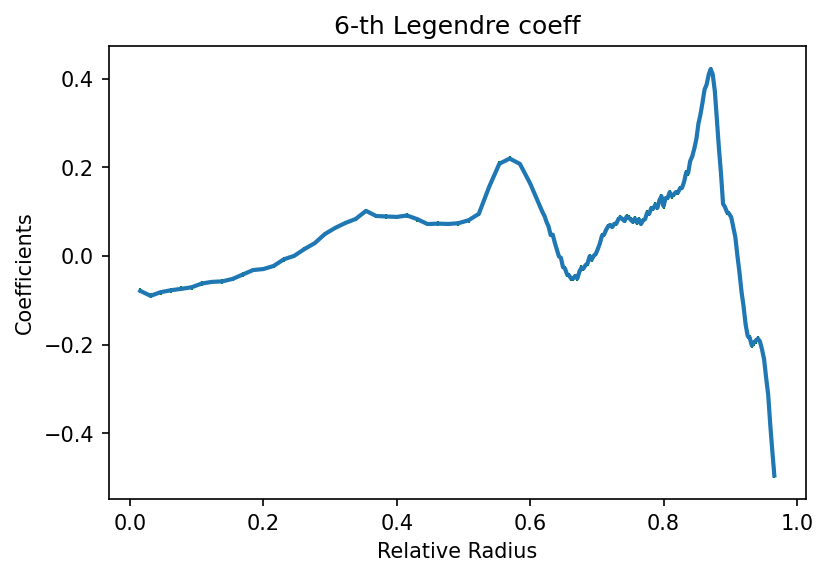

(15, 154)
(15, 154)


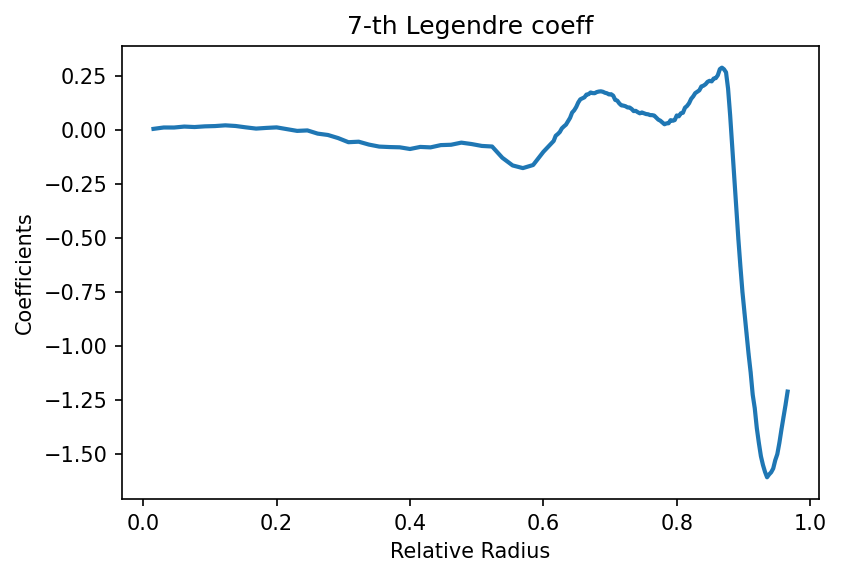

(15, 154)
(15, 154)


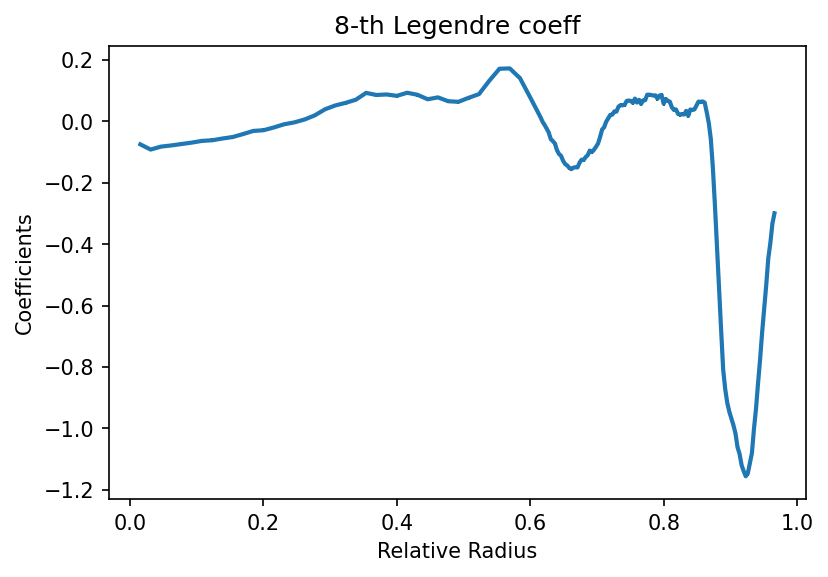

(15, 154)
(15, 154)


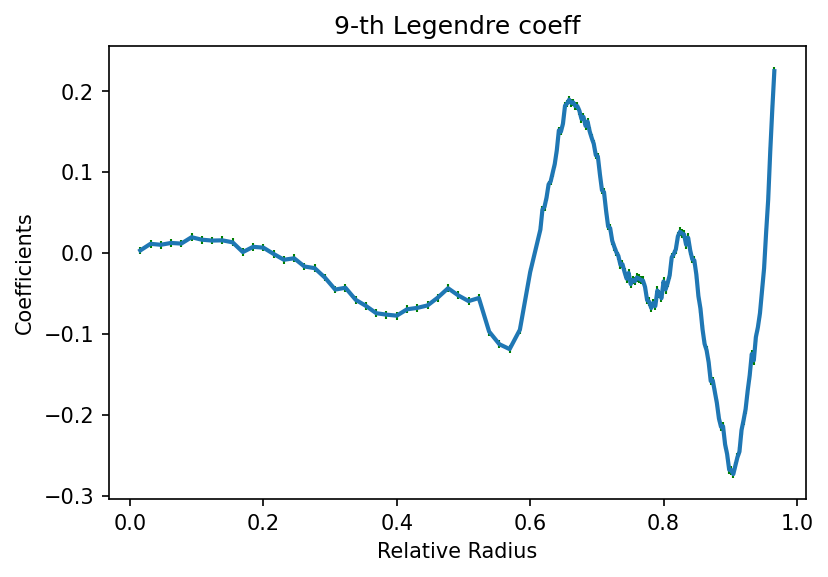

(15, 154)
(15, 154)


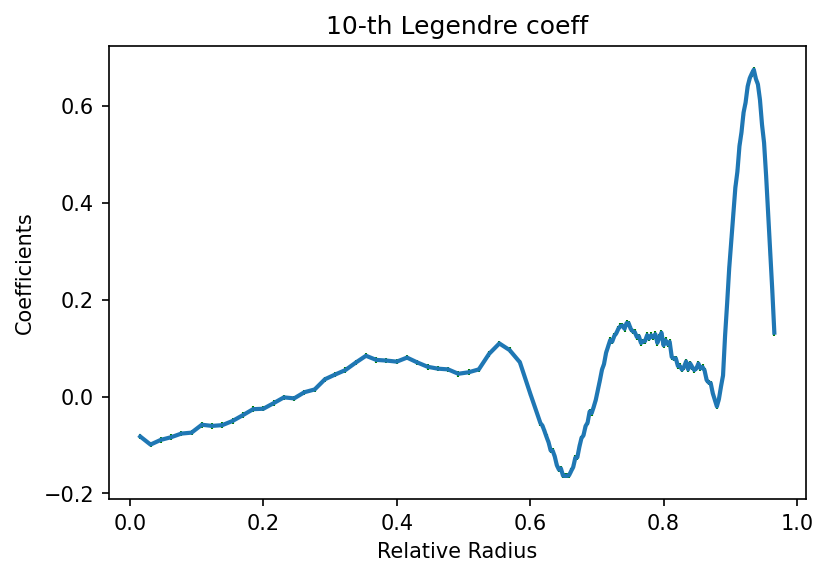

(15, 154)
(15, 154)


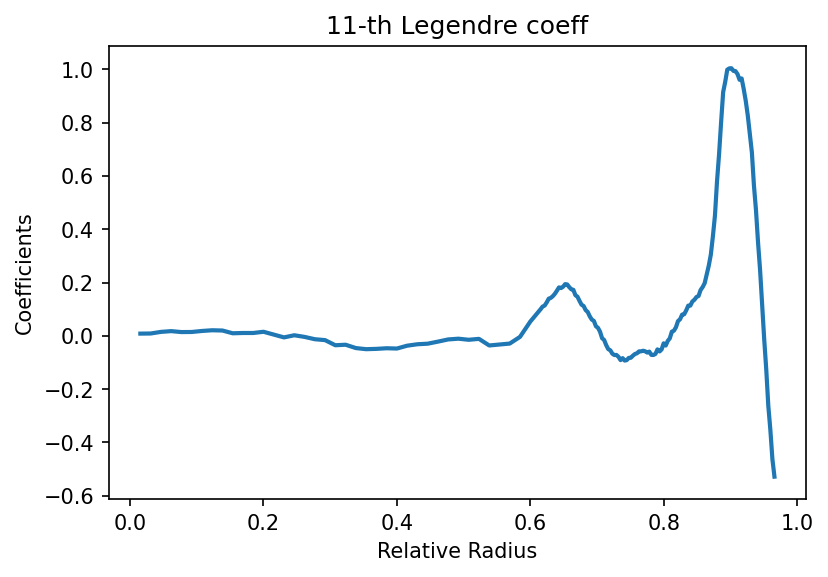

(15, 154)
(15, 154)


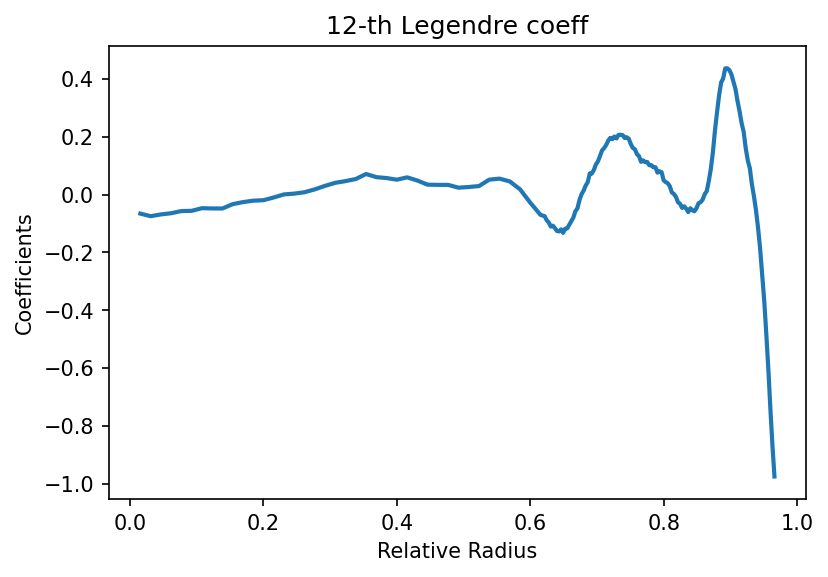

(15, 154)
(15, 154)


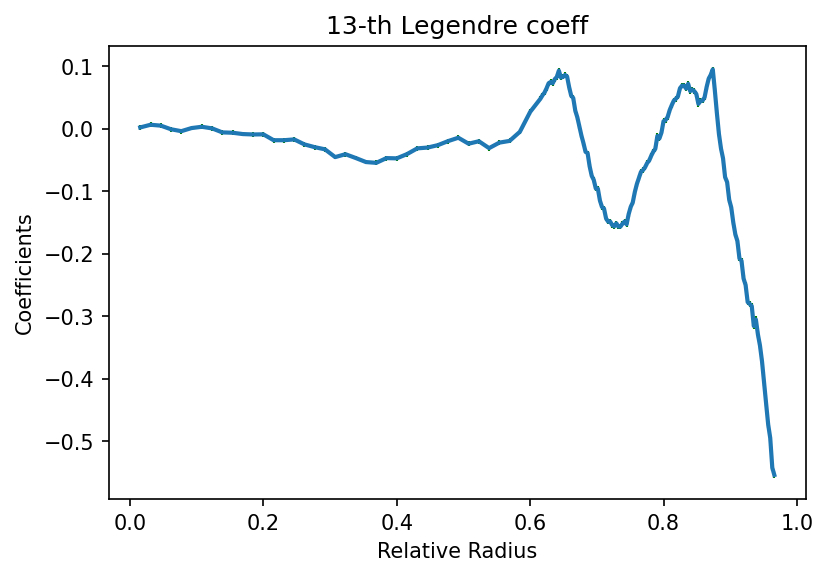

(15, 154)
(15, 154)


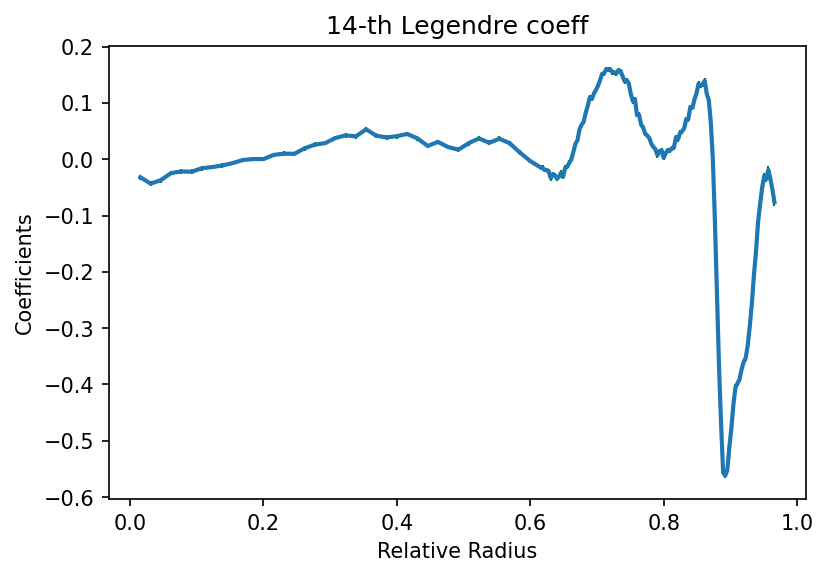

In [3]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els7/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
#ra = np.arange(0.01, 0.65, 0.05)
order = 15
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff, H = LoadDataPE(path, str_radius, order)
        rd.append(np.array(radius))
        Hessian.append(H)
        coeff_pe = np.hstack((coeff_pe, coeff))
        err = np.hstack((err, np.sqrt(np.diag(np.linalg.pinv(H)))))
    except:
        print('error: %.3f' % radius)


coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
err = np.reshape(err,(-1,np.size(rd)),order='F')
print(coeff_pe[:,0].shape)

for index, i in enumerate(np.arange(np.size(coeff_pe[:,0]))):
    plt.figure(dpi=150)
    print(coeff_pe.shape)
    print(err.shape)
    data = np.nan_to_num(coeff_pe[i,:])
    errorbar = np.nan_to_num(err[i,:])
    x = np.array(rd)/0.65
    #plt.plot(x, data,'.')
    plt.errorbar(x, data, errorbar,ecolor='g', mfc='red', mec='green', elinewidth=1, linewidth=2)
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

In [5]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_dns_Lasso_els6/file_0.500.h5')
print(h.root.coeff15[:])
print(np.sqrt(1/np.diag(h.root.hess15[:])))
import h5py 
f = h5py.File('../coeff_pe_1t_2.0MeV_dns_Lasso_els6/file_0.100.h5', 'r')
kkk = f['success15']
print(kkk.shape)

[ 1.34677888e+00  9.52294608e-01  7.49231820e-01  2.46872713e-01
  1.89677811e-01  1.50788862e-01  4.34554558e-03  5.54653773e-02
  5.20695580e-05 -8.97499453e-03  1.89974572e-02 -3.73115127e-02
  3.04001744e-02 -4.35536262e-02 -2.16983197e-04]
[0.6218783  0.86696775 1.09133692 1.35236168 1.69589784 1.93826439
 2.34881649 2.96971173 3.05976562 2.73072666 2.35703957 2.42562377
 2.45323179 2.59583263 2.87062984]
()


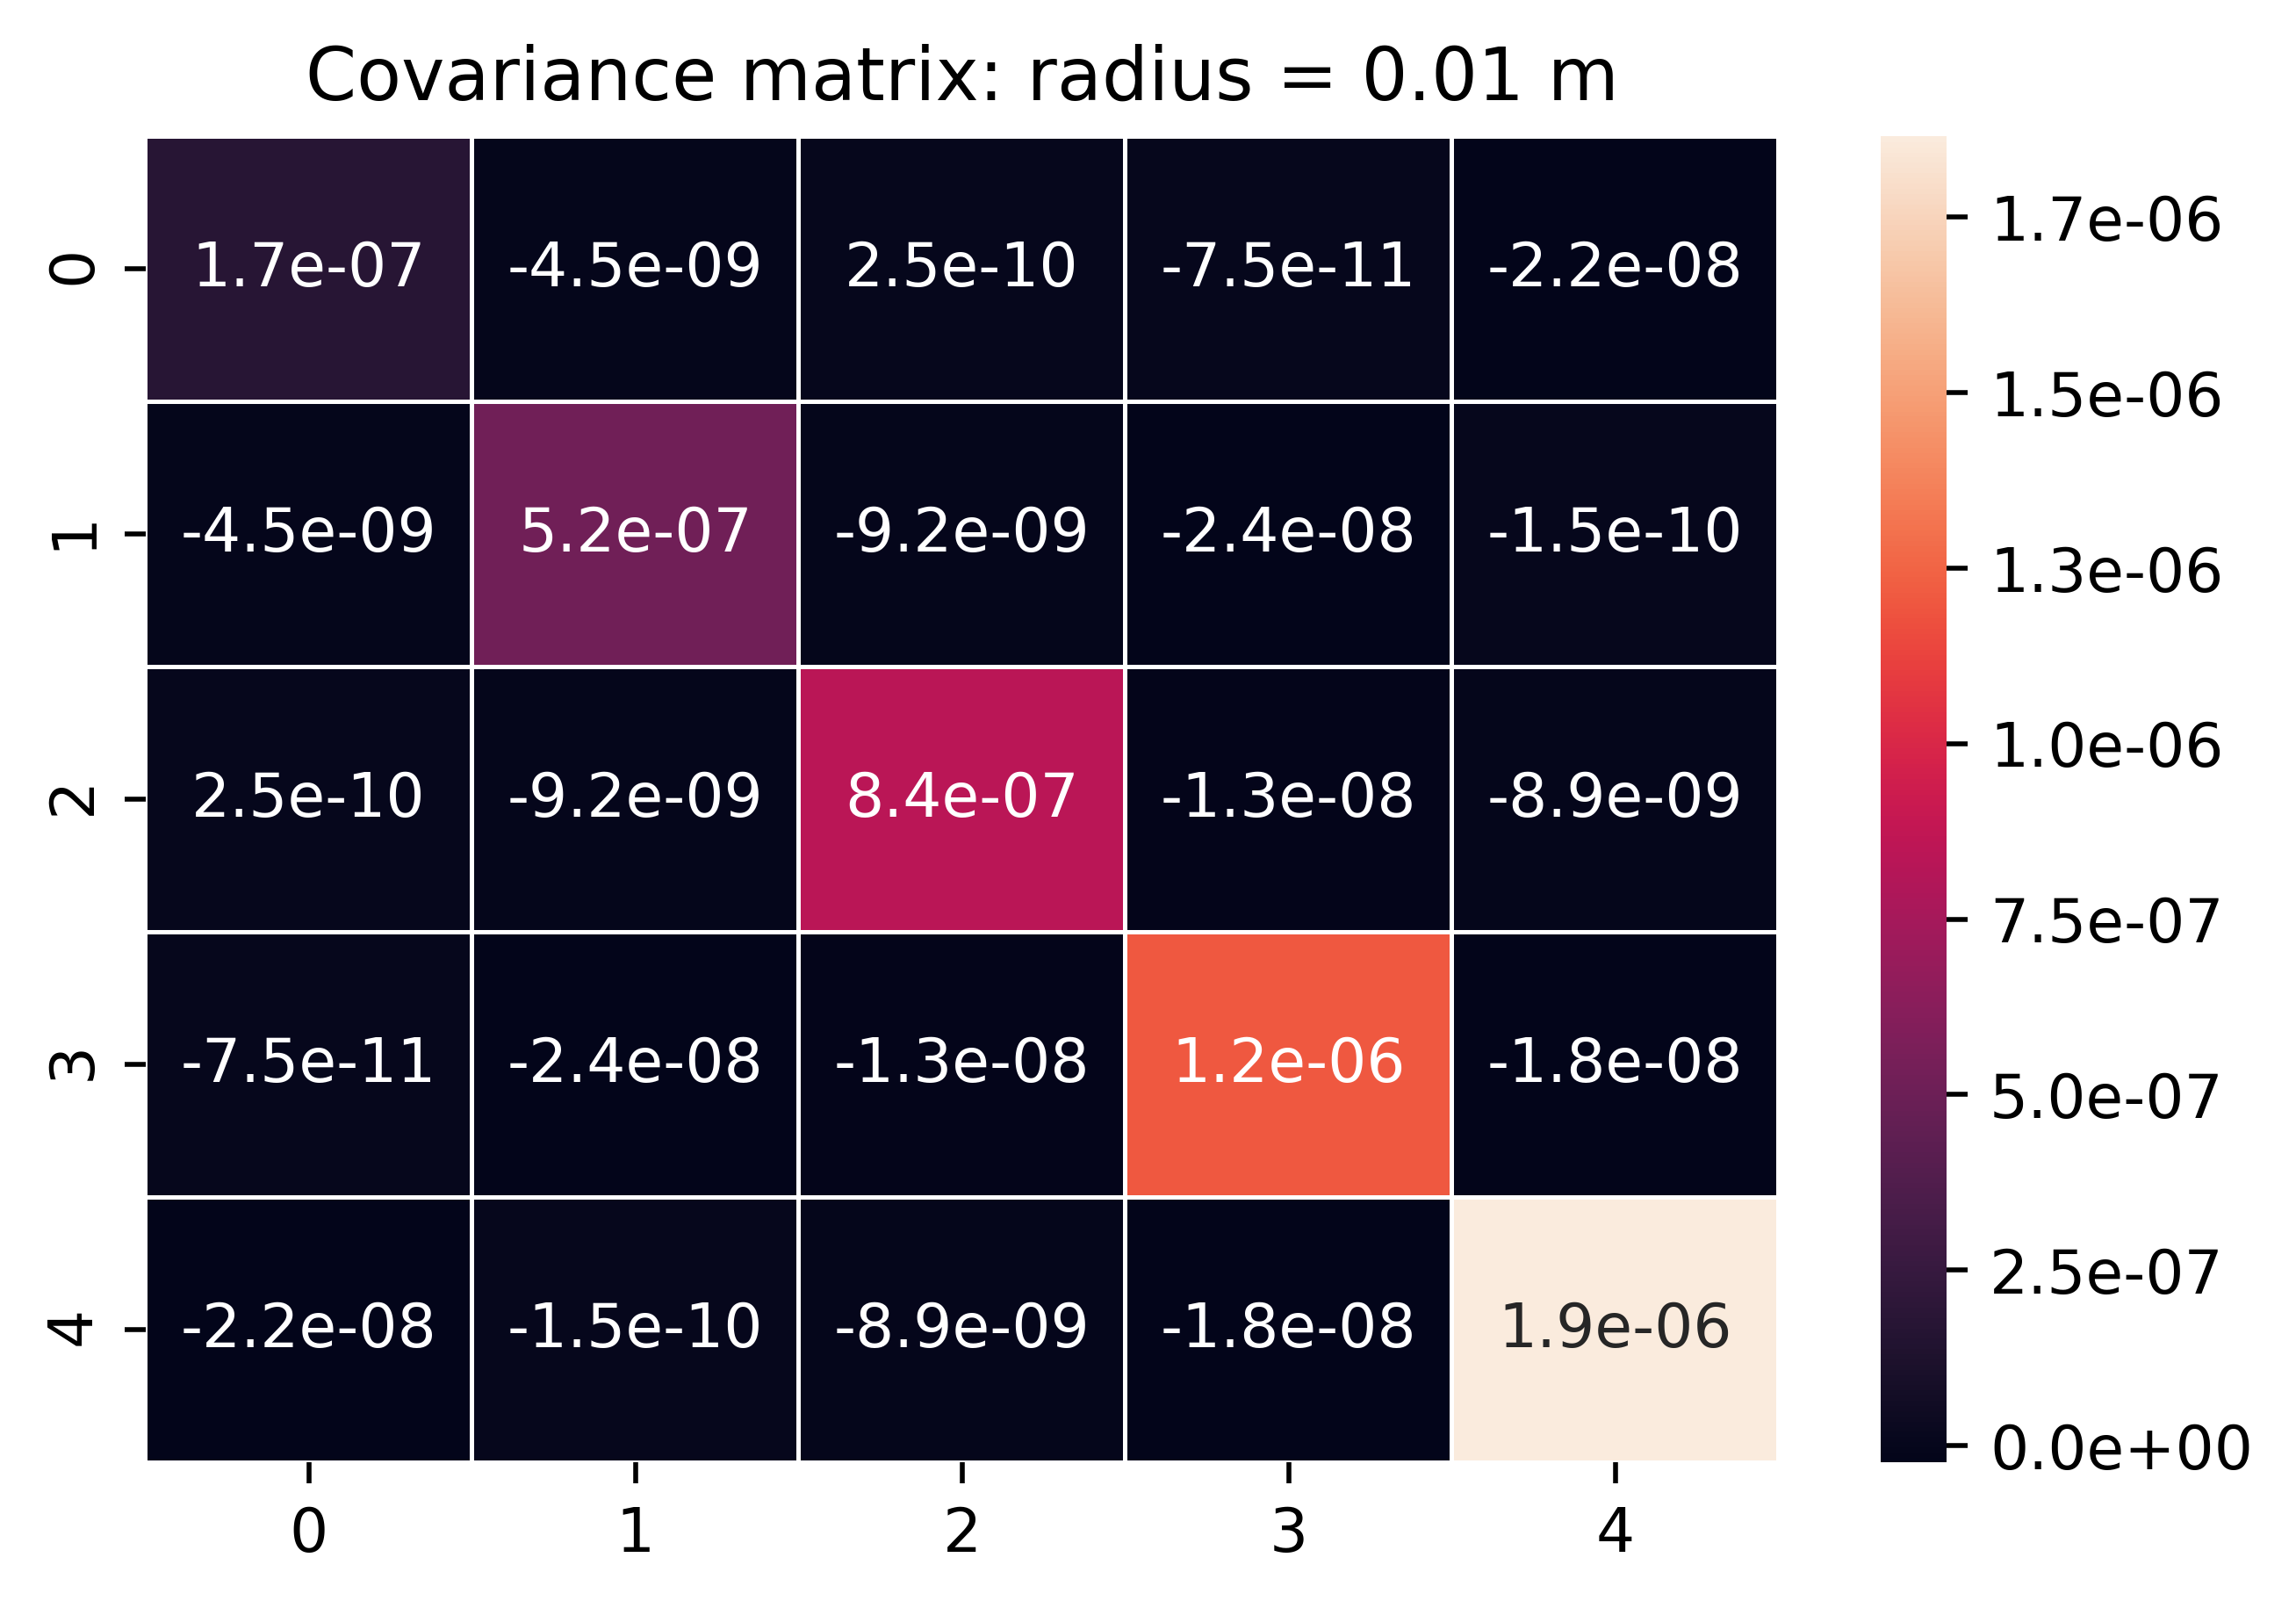

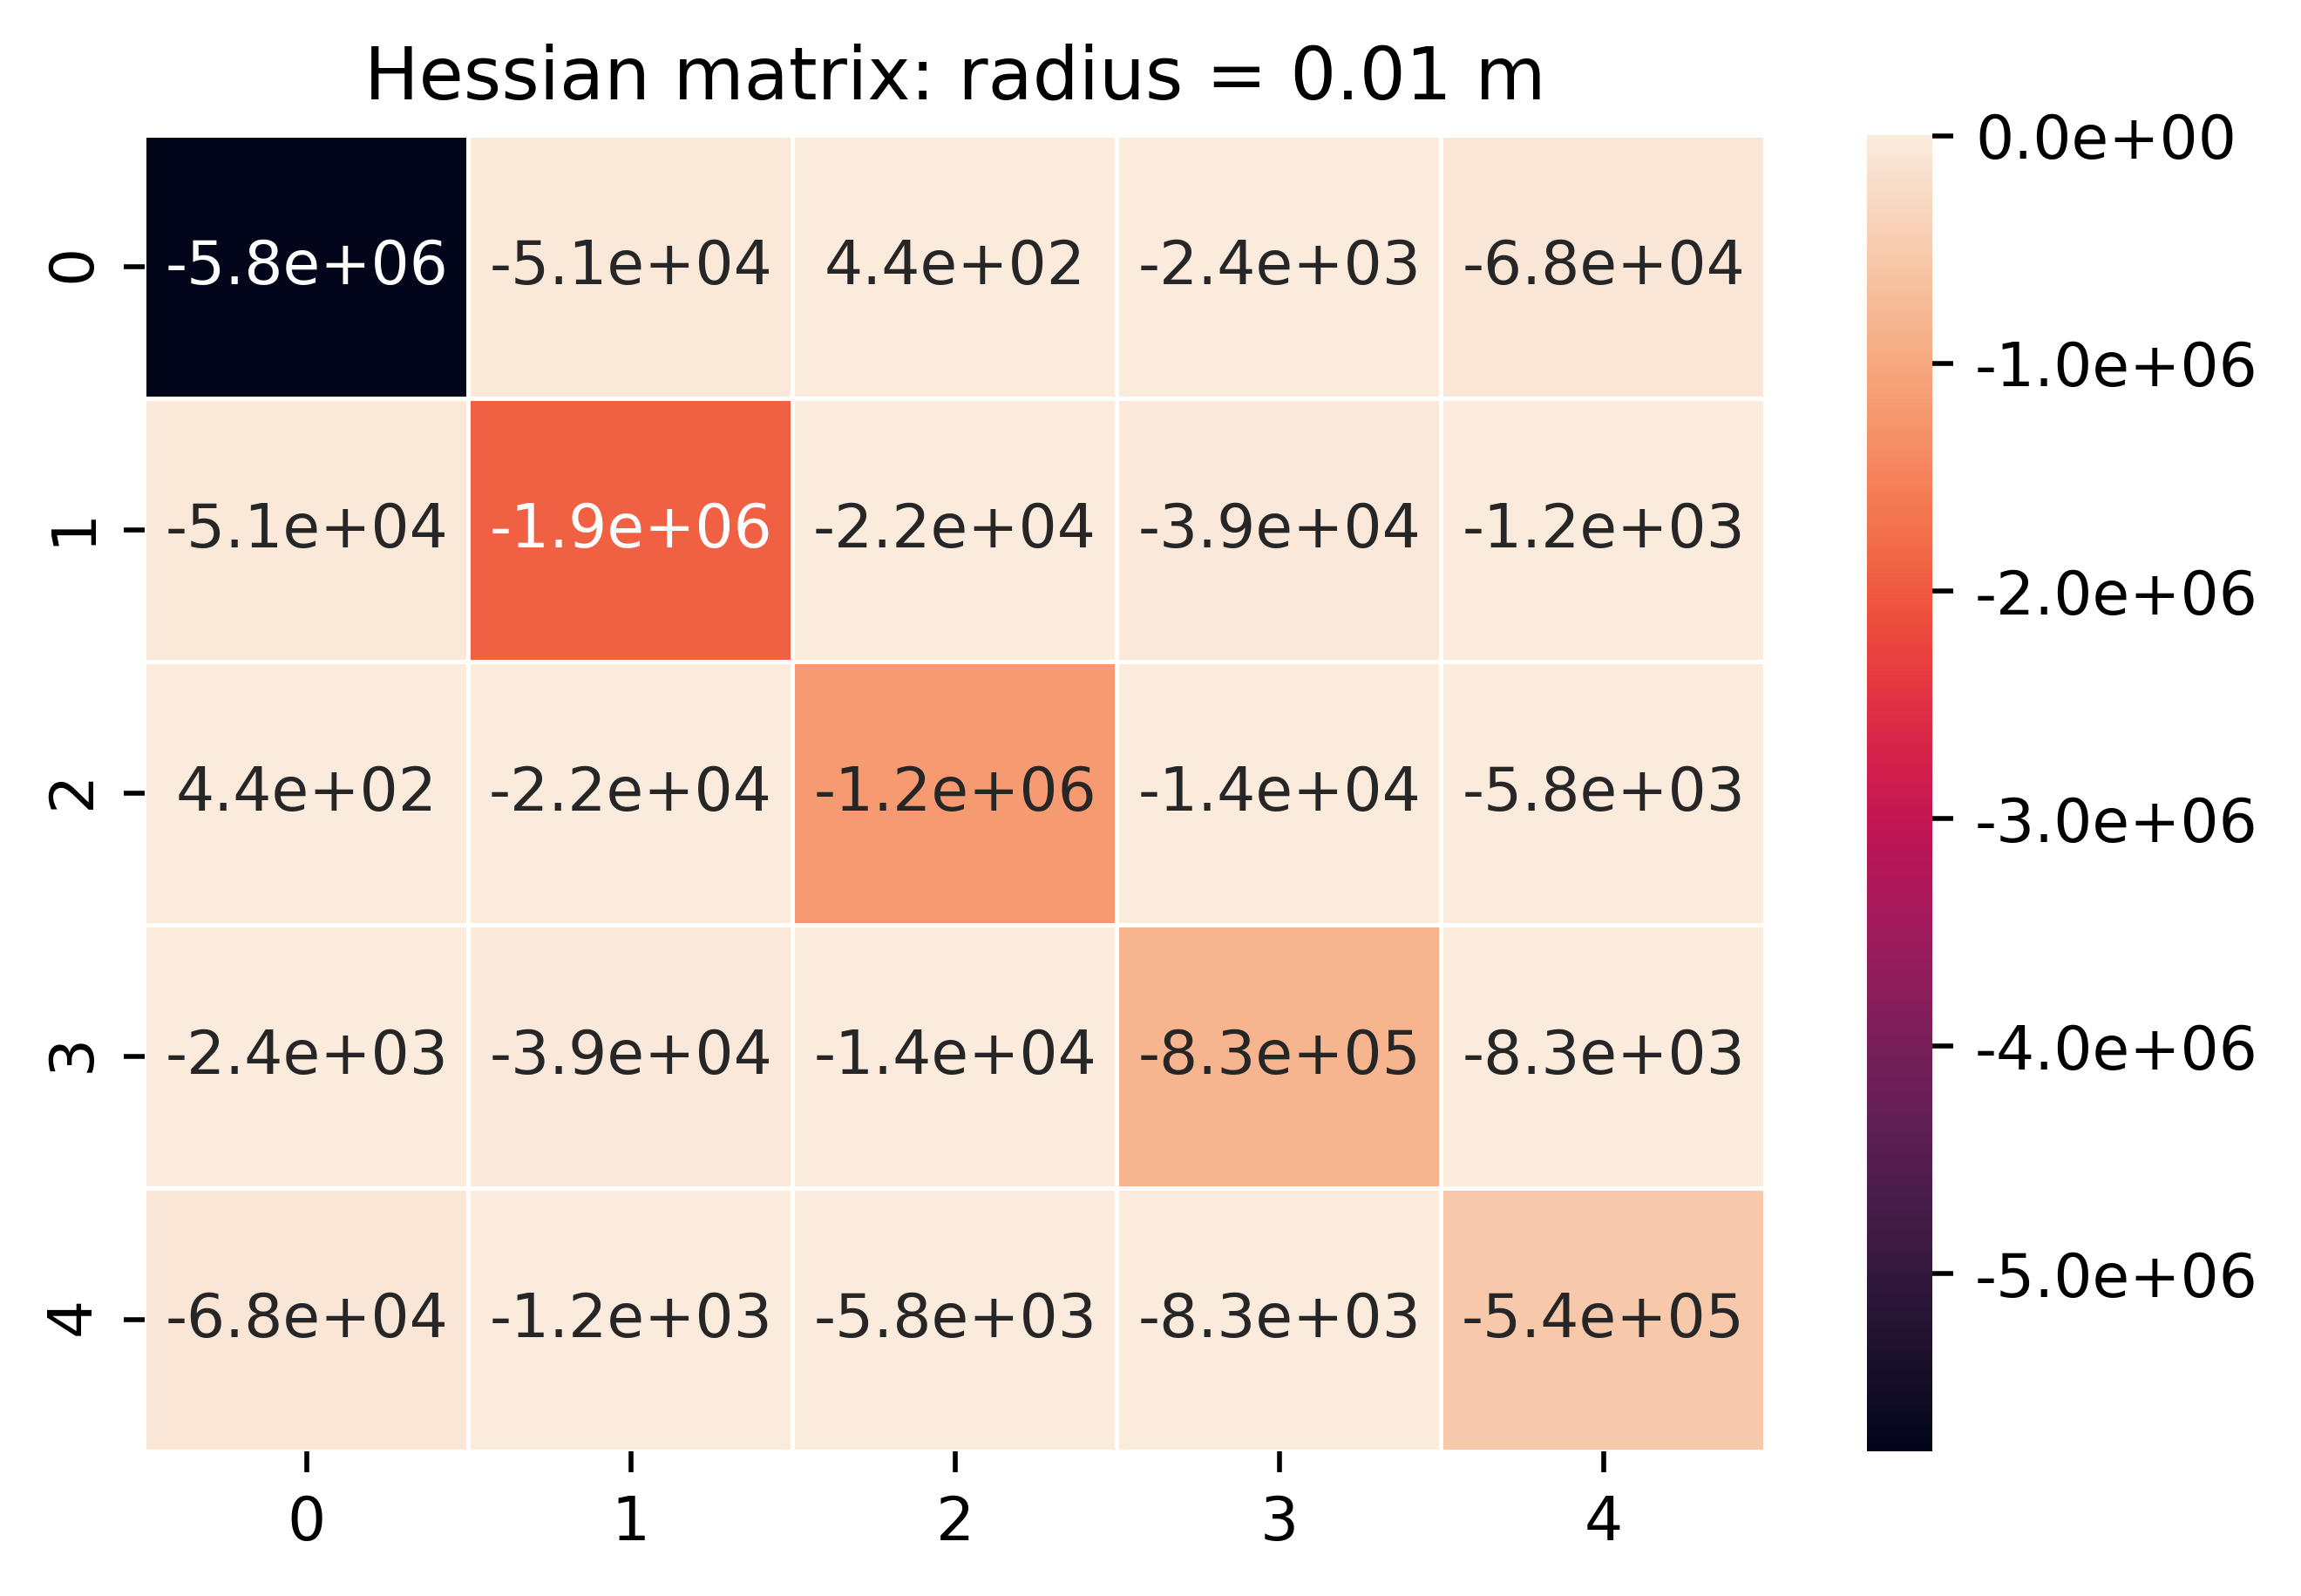

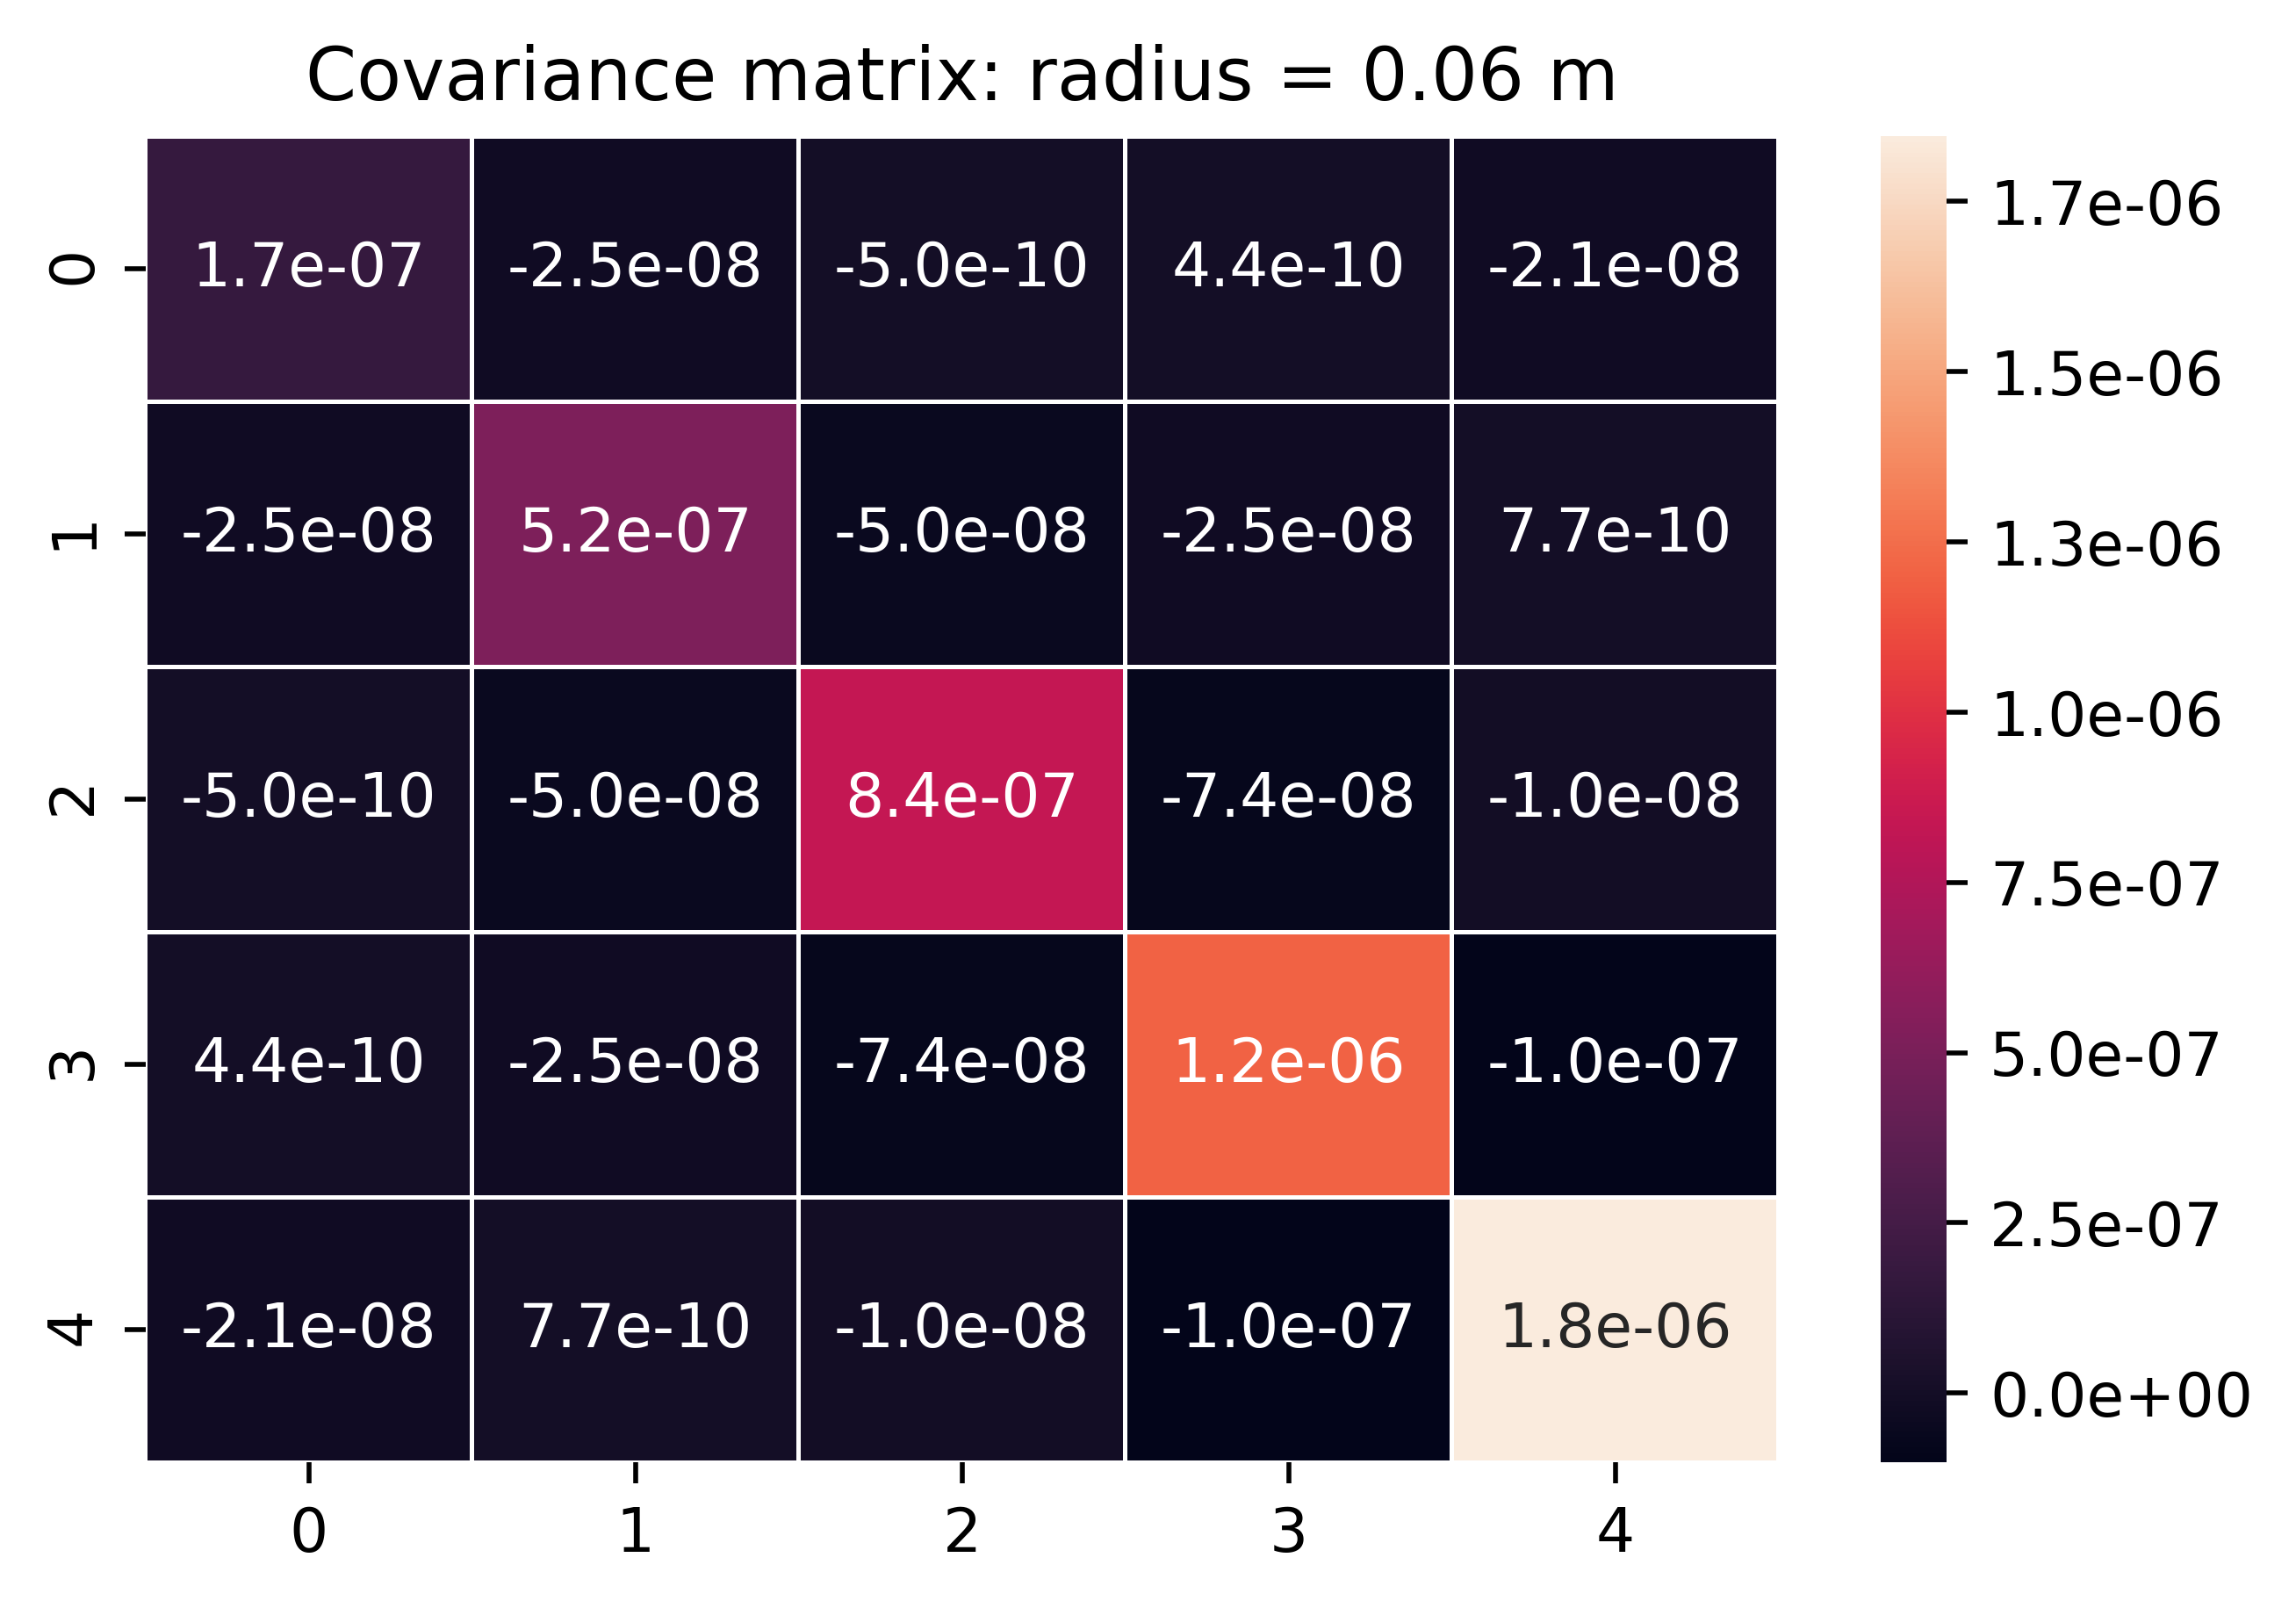

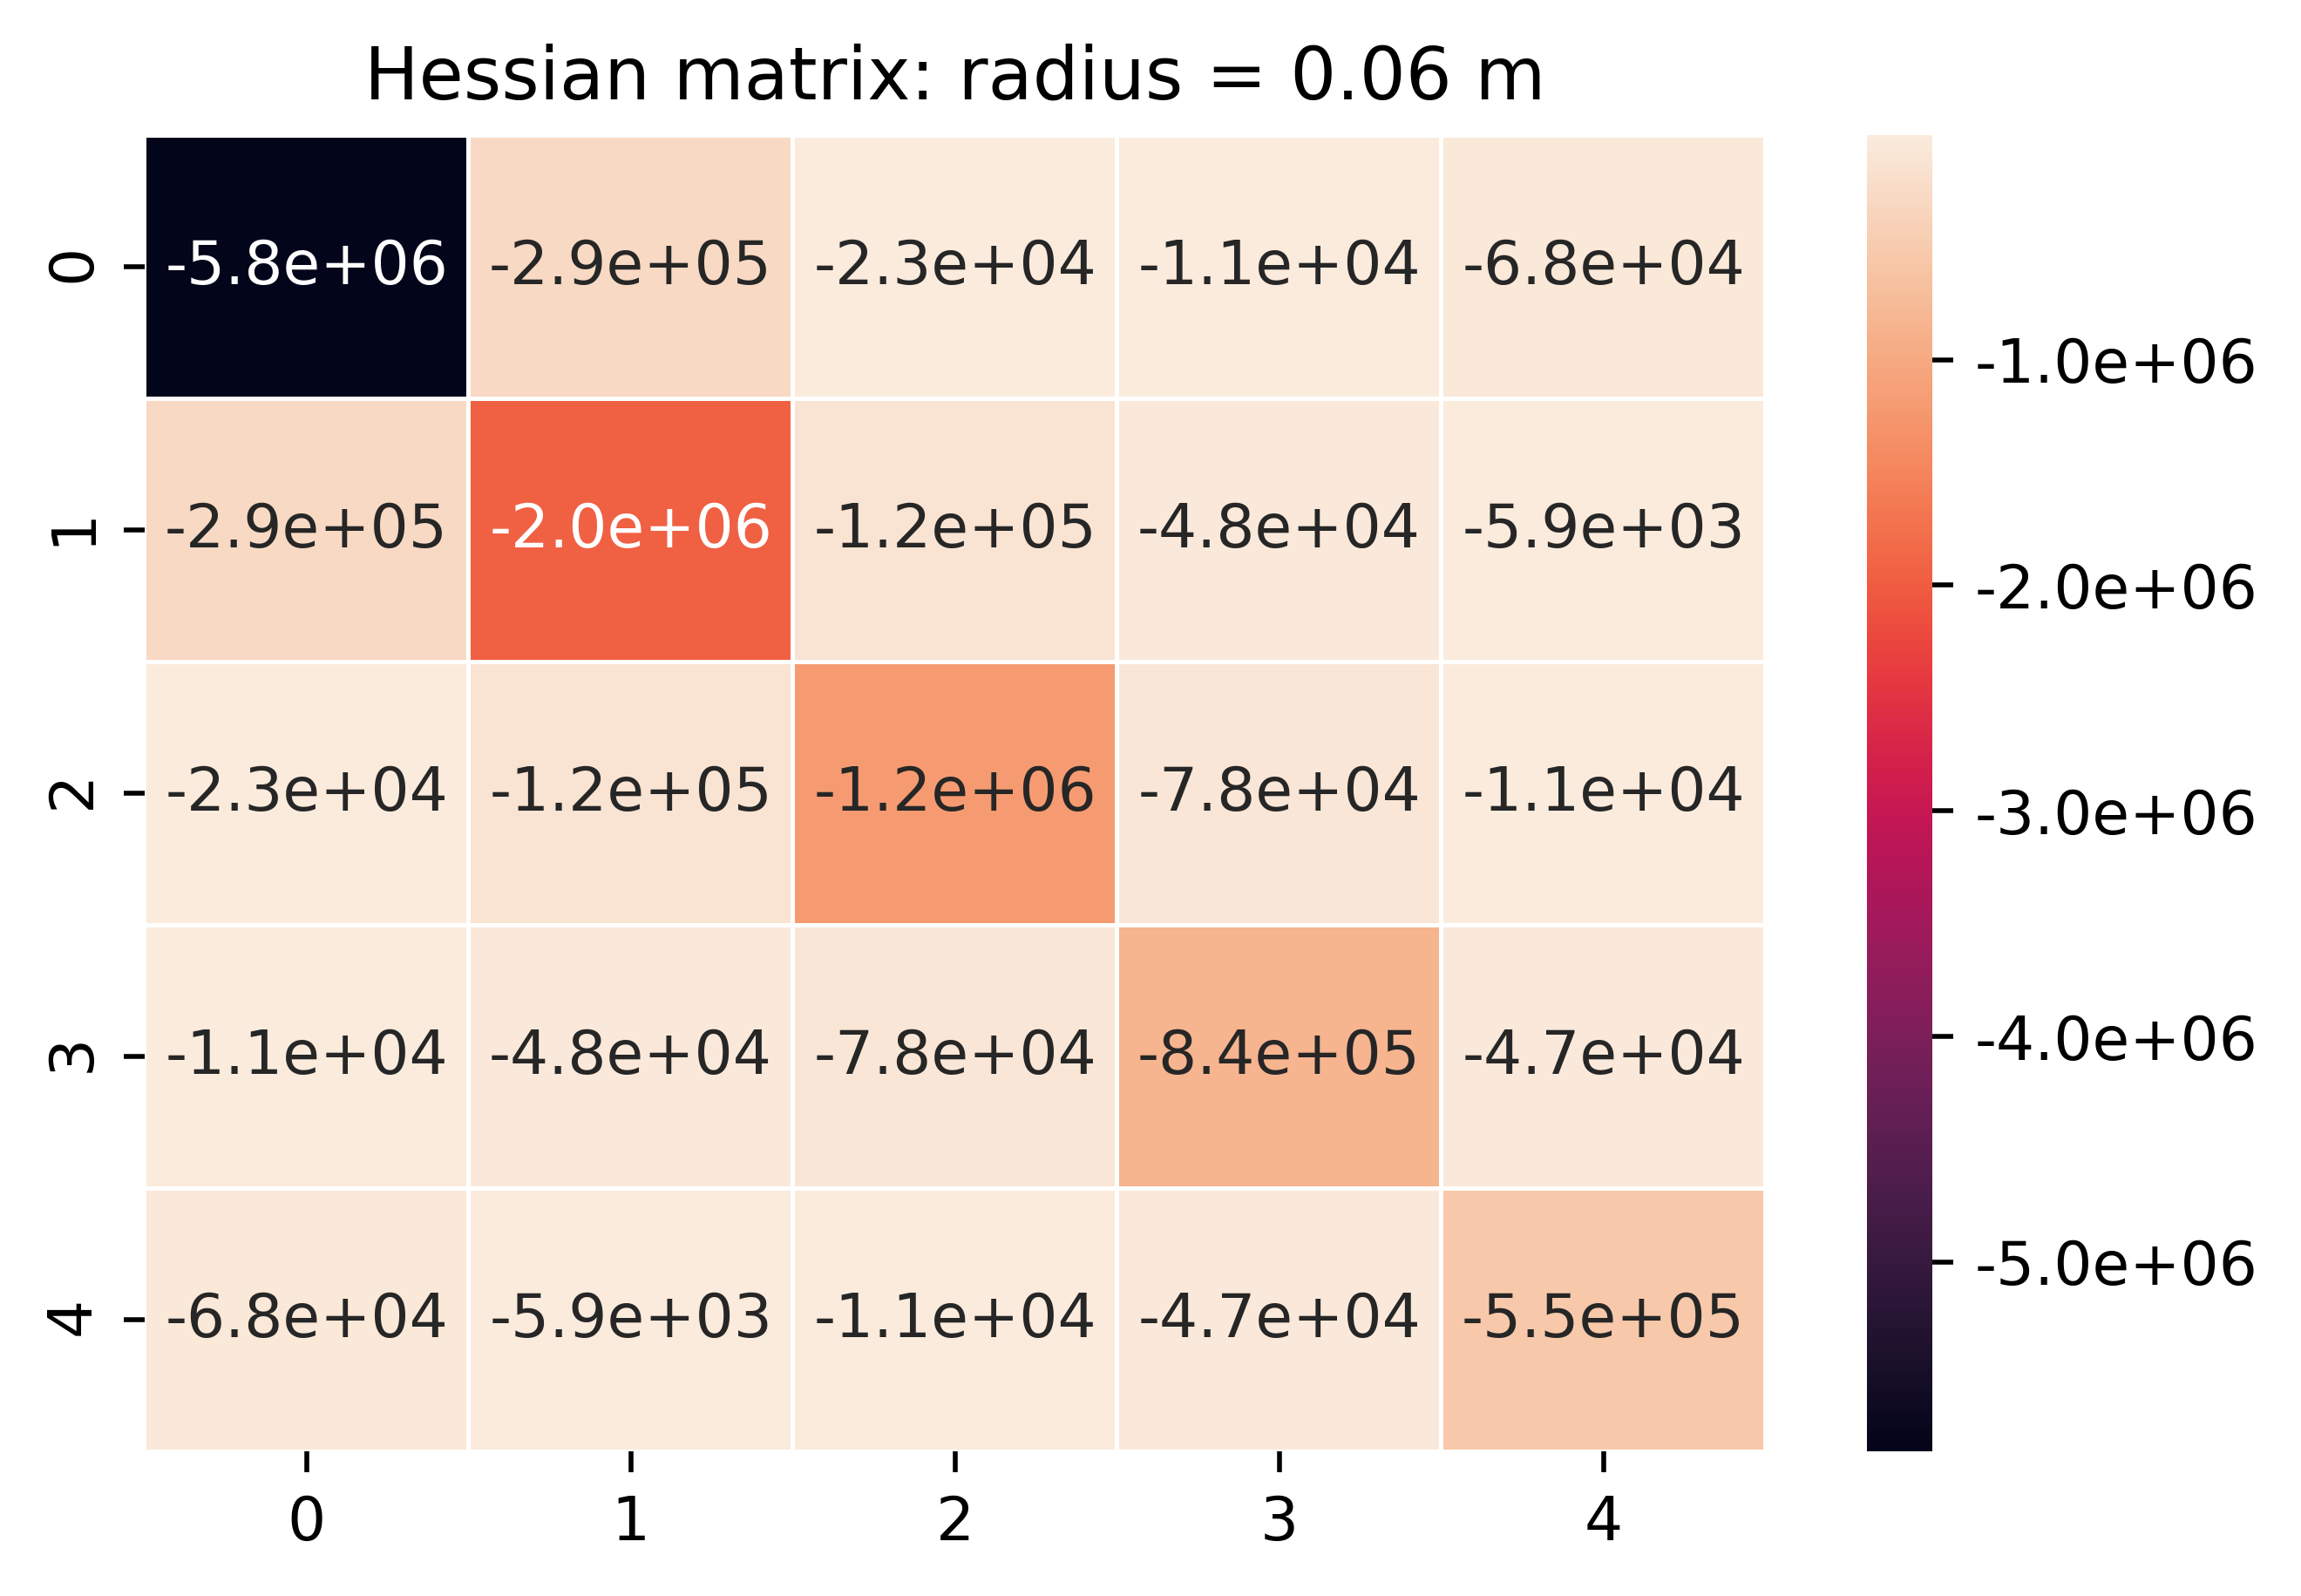

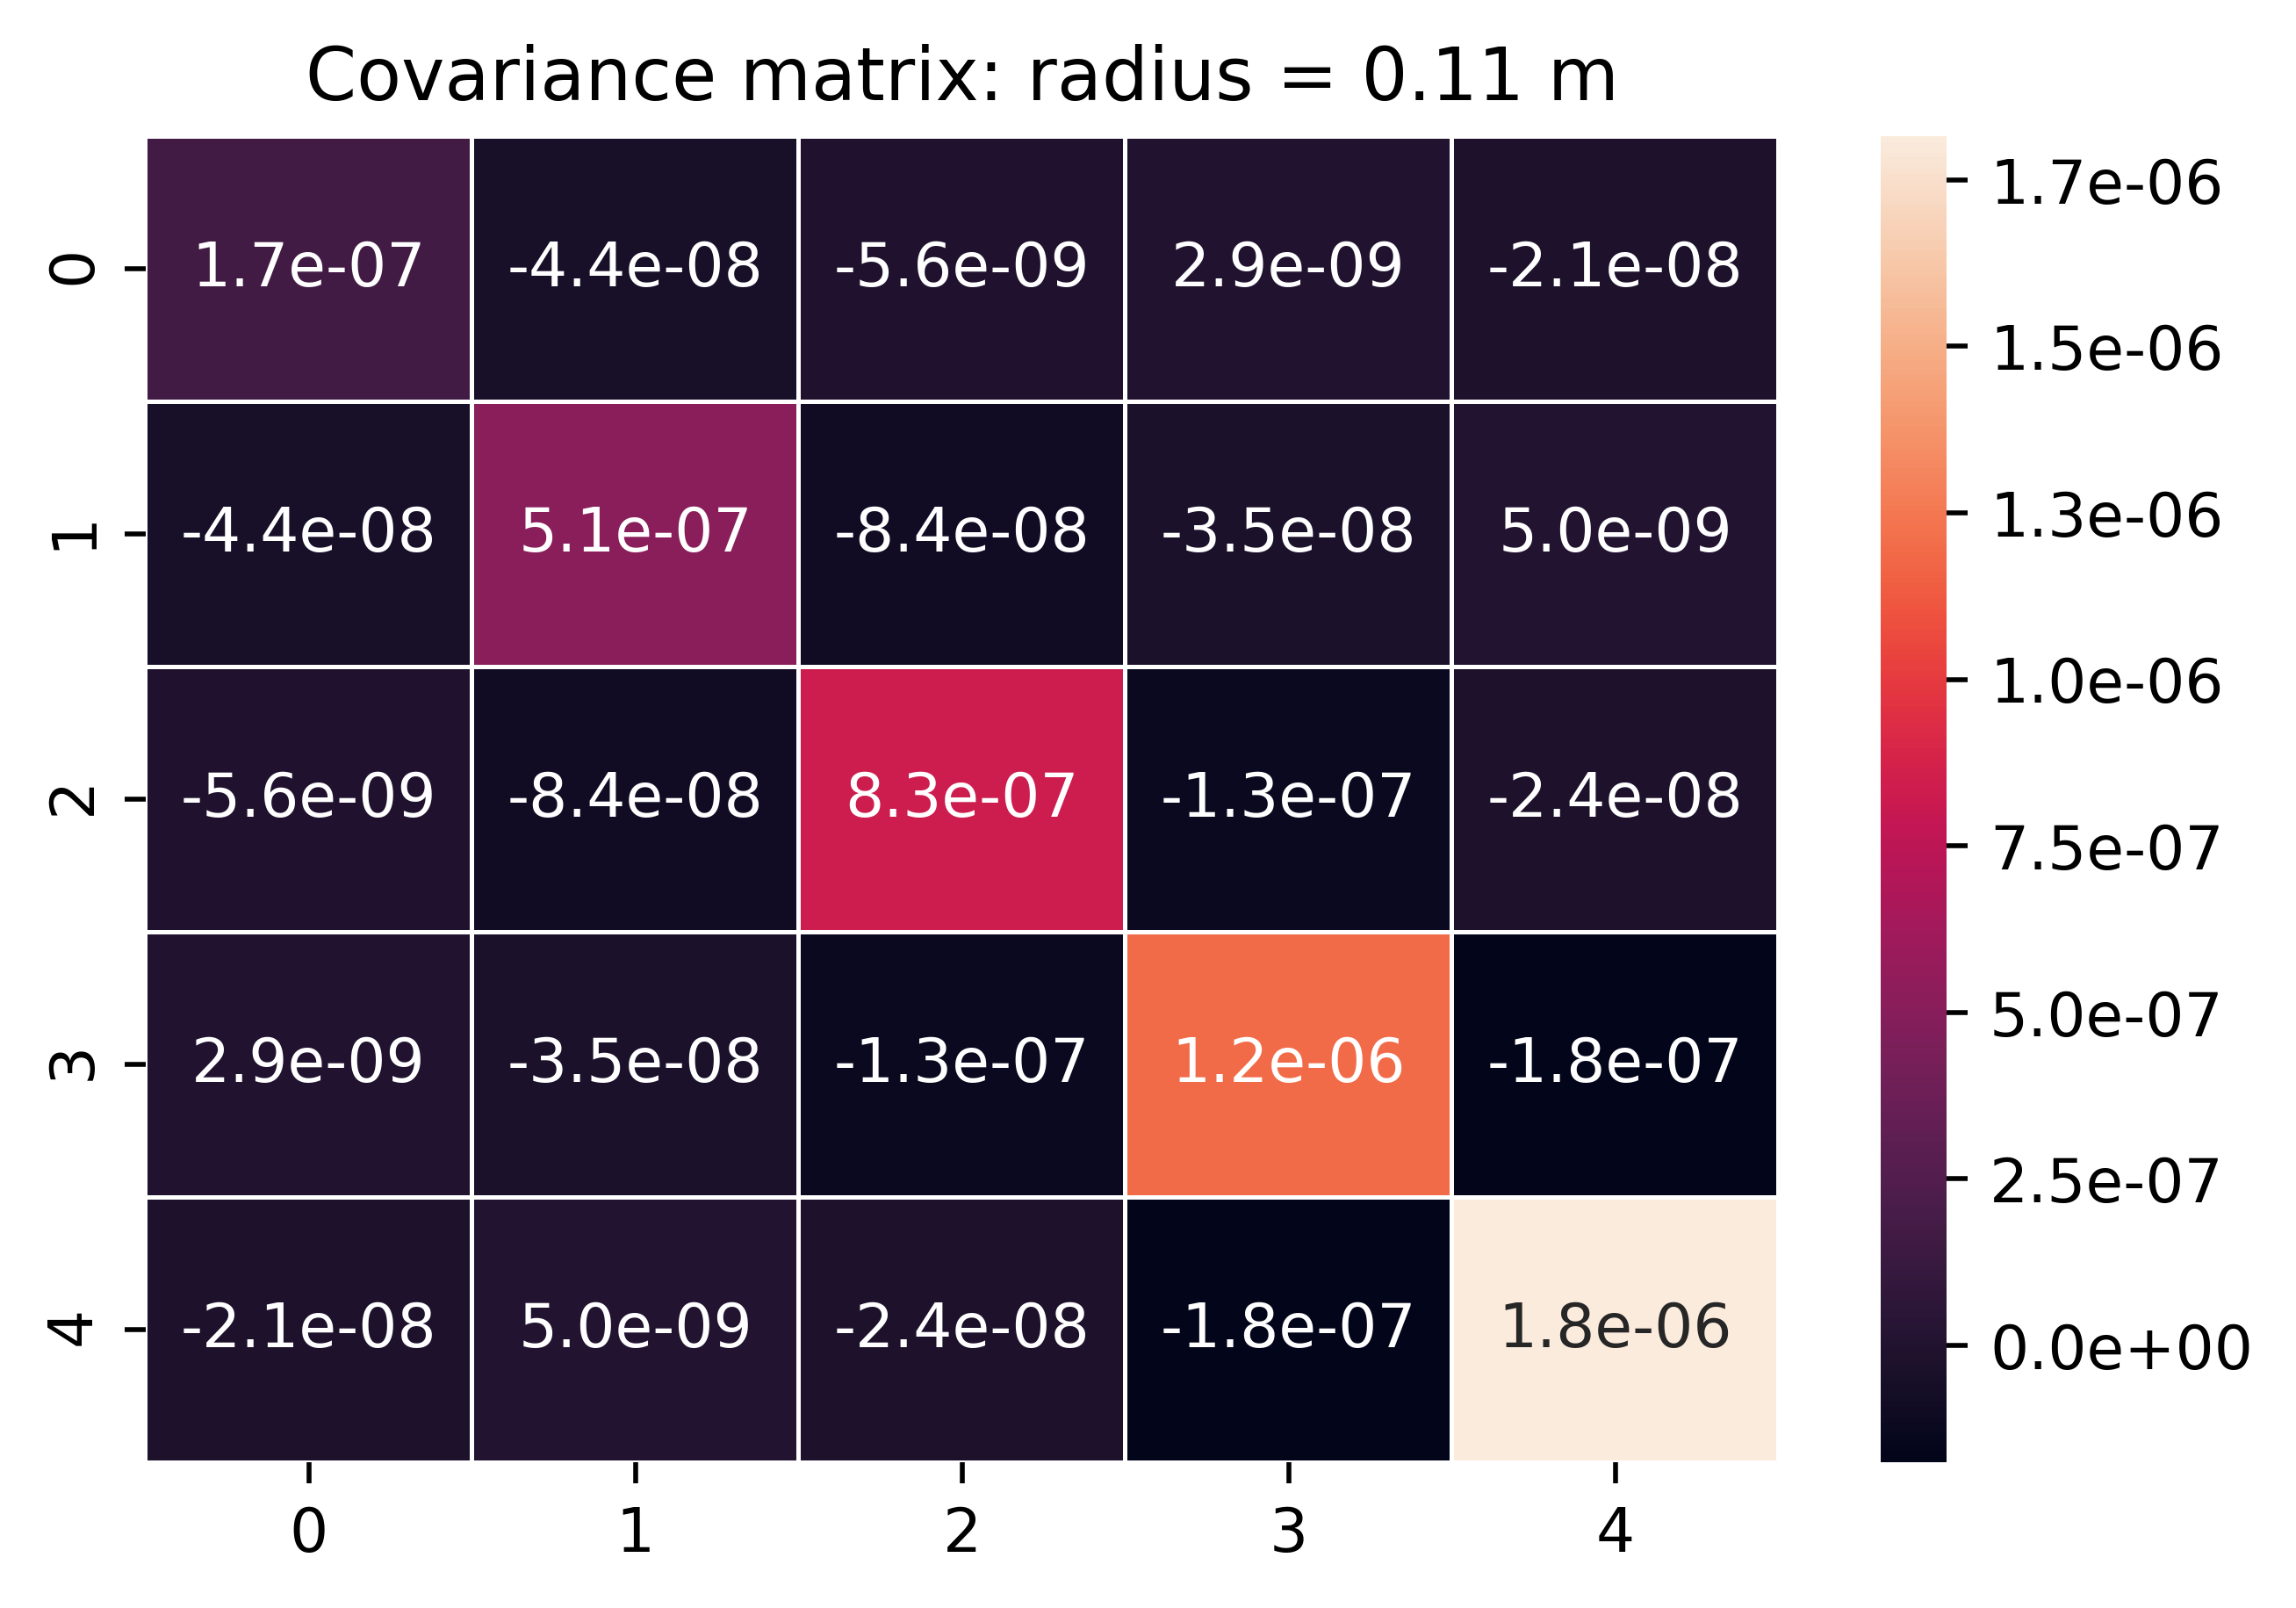

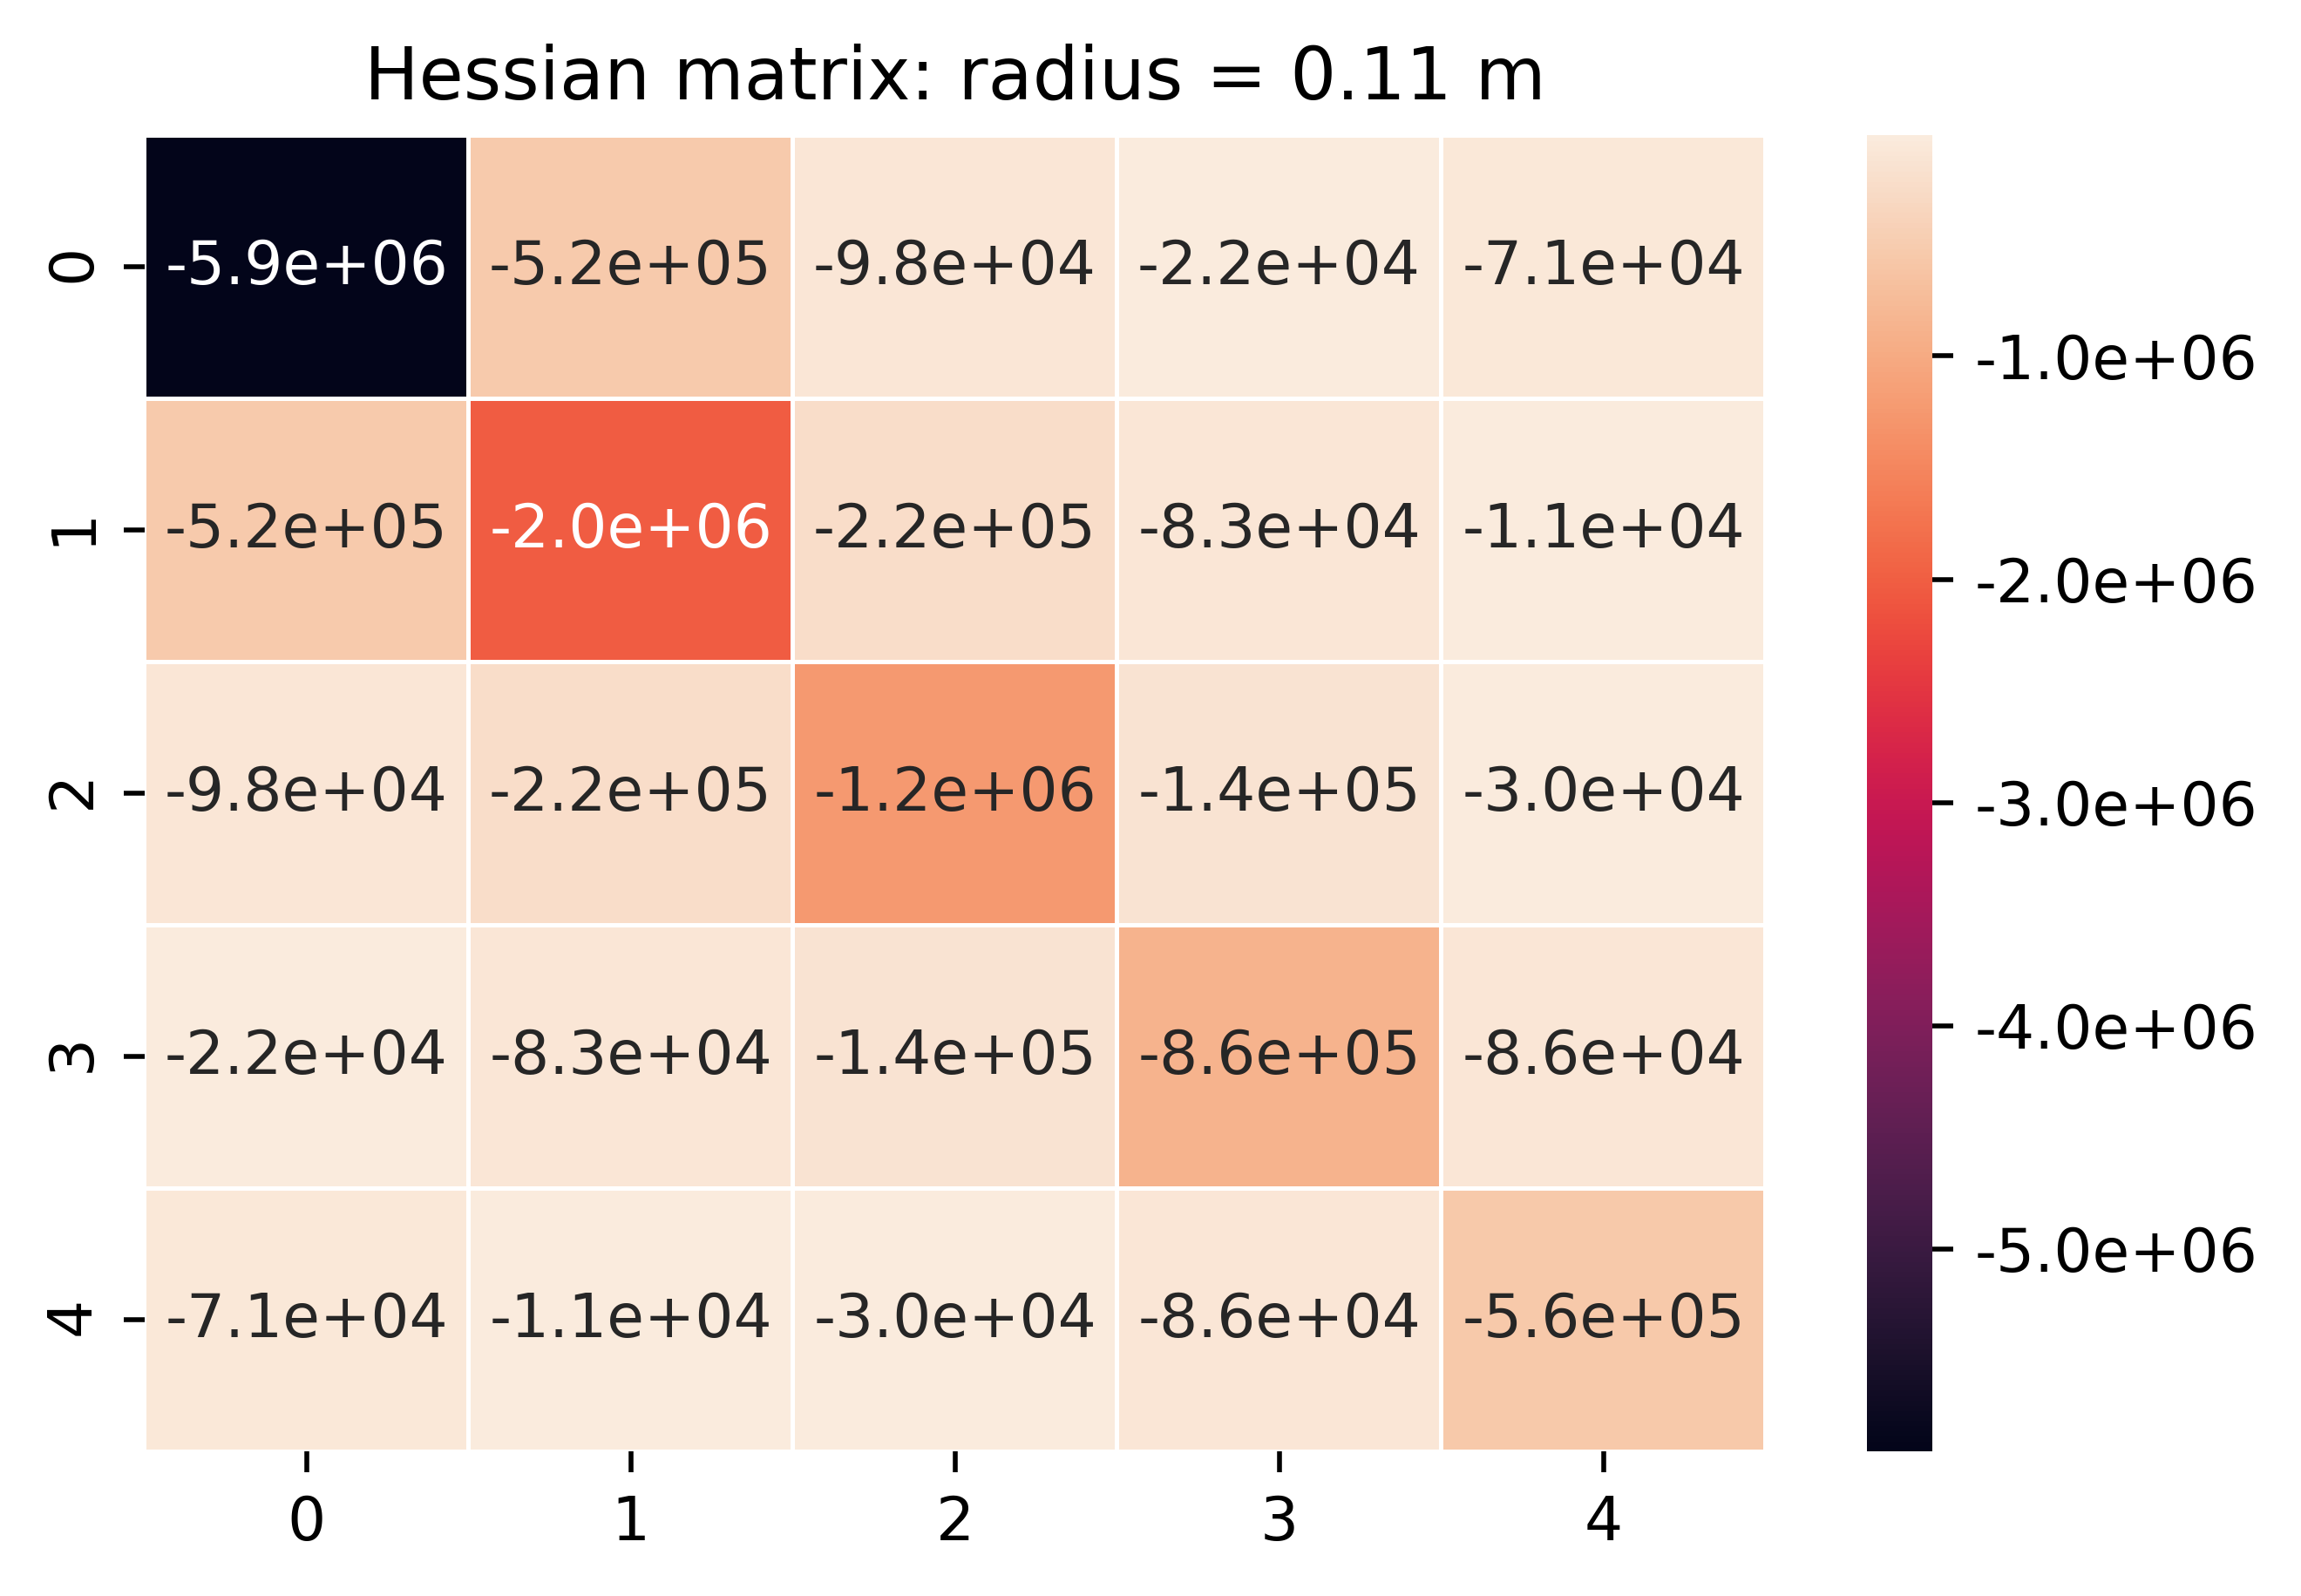

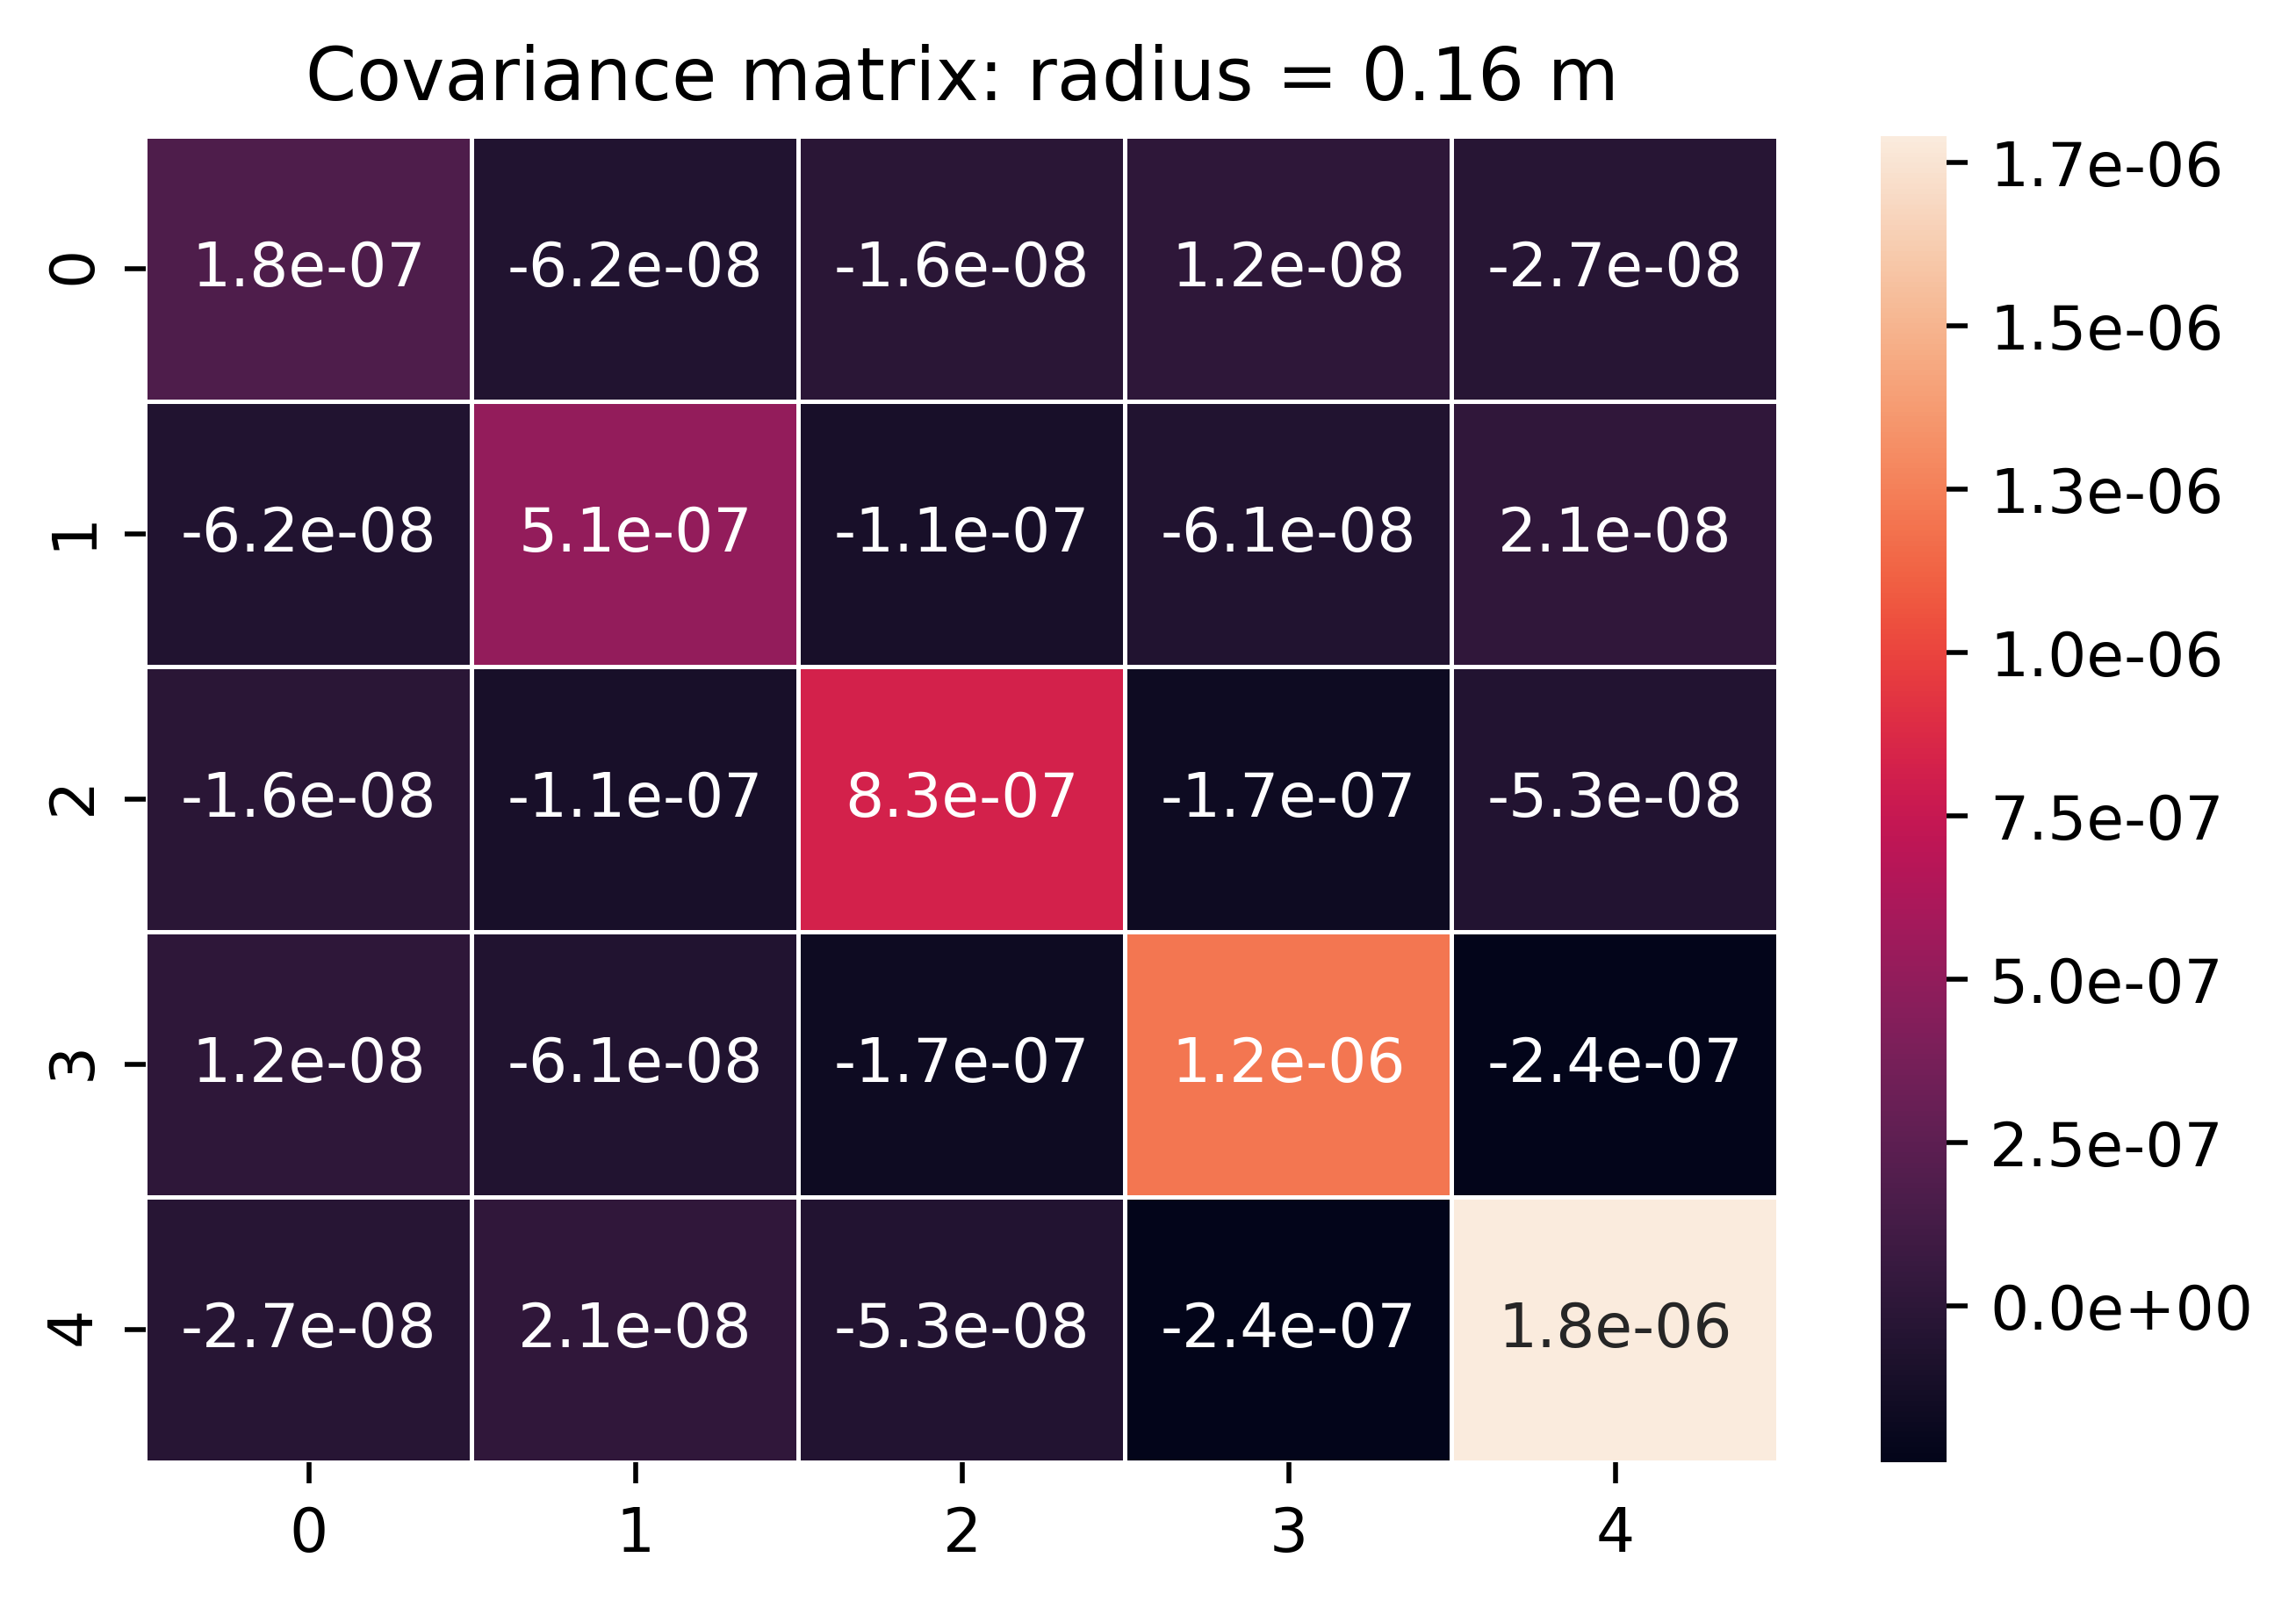

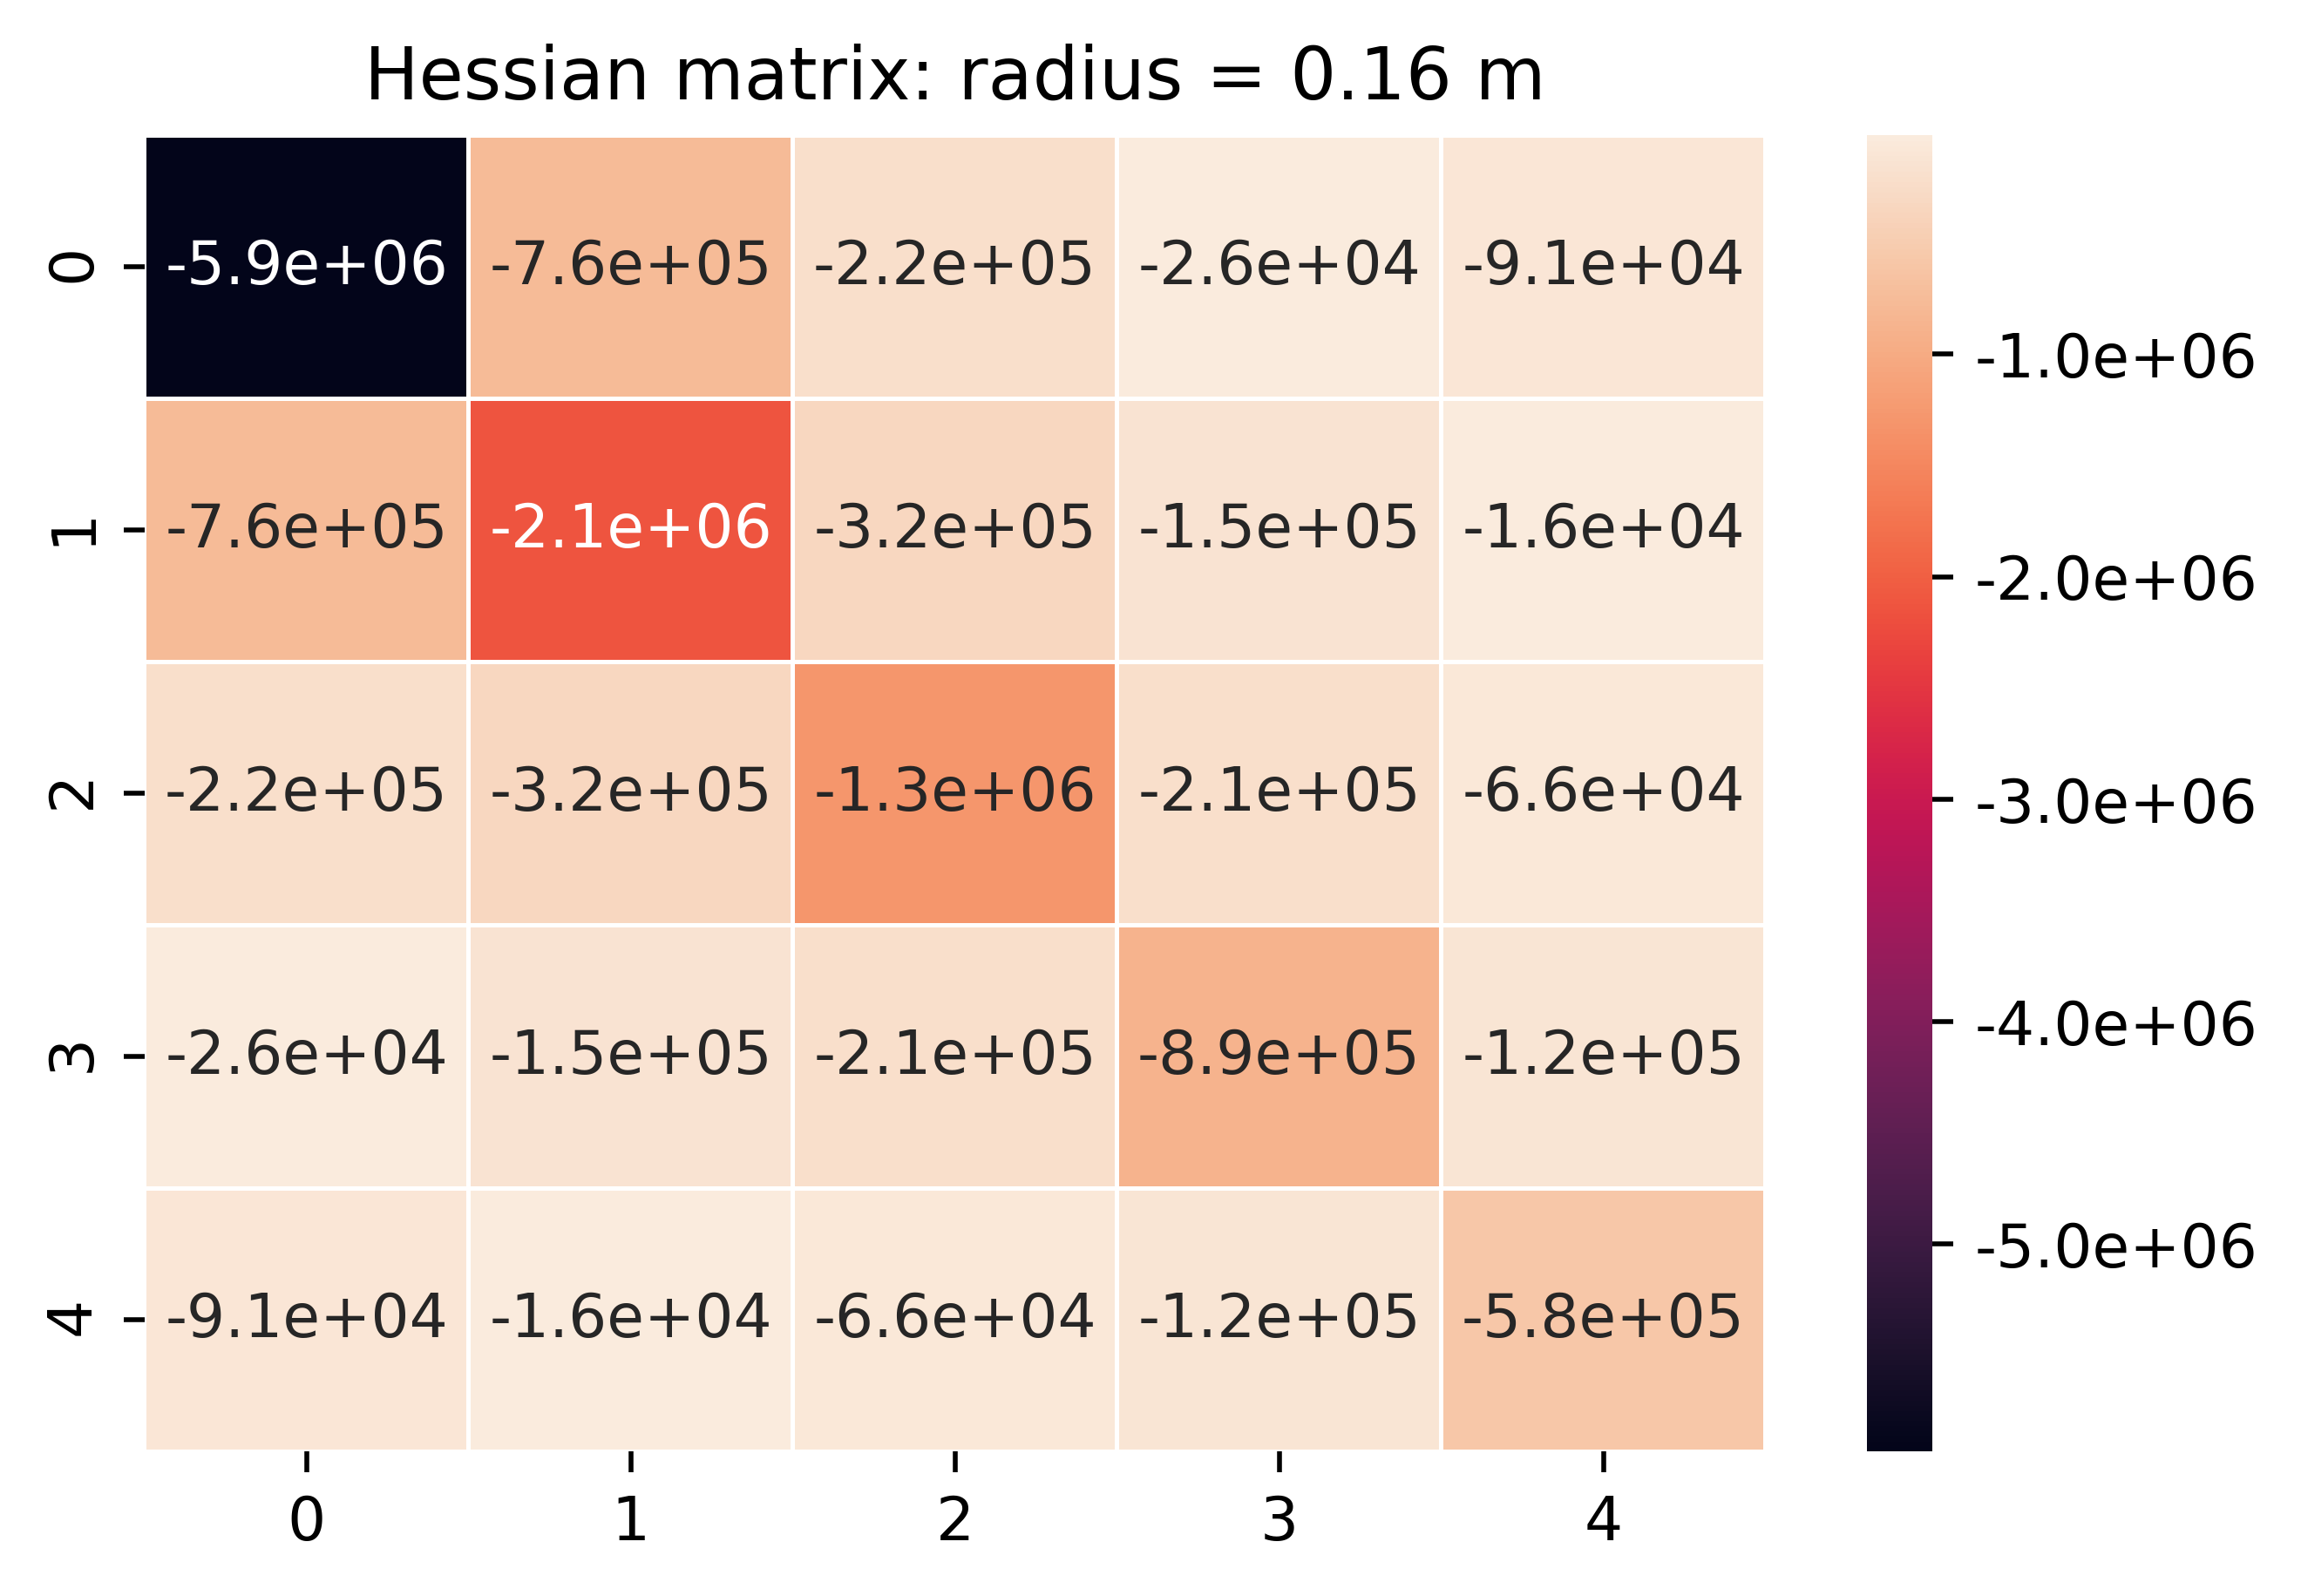

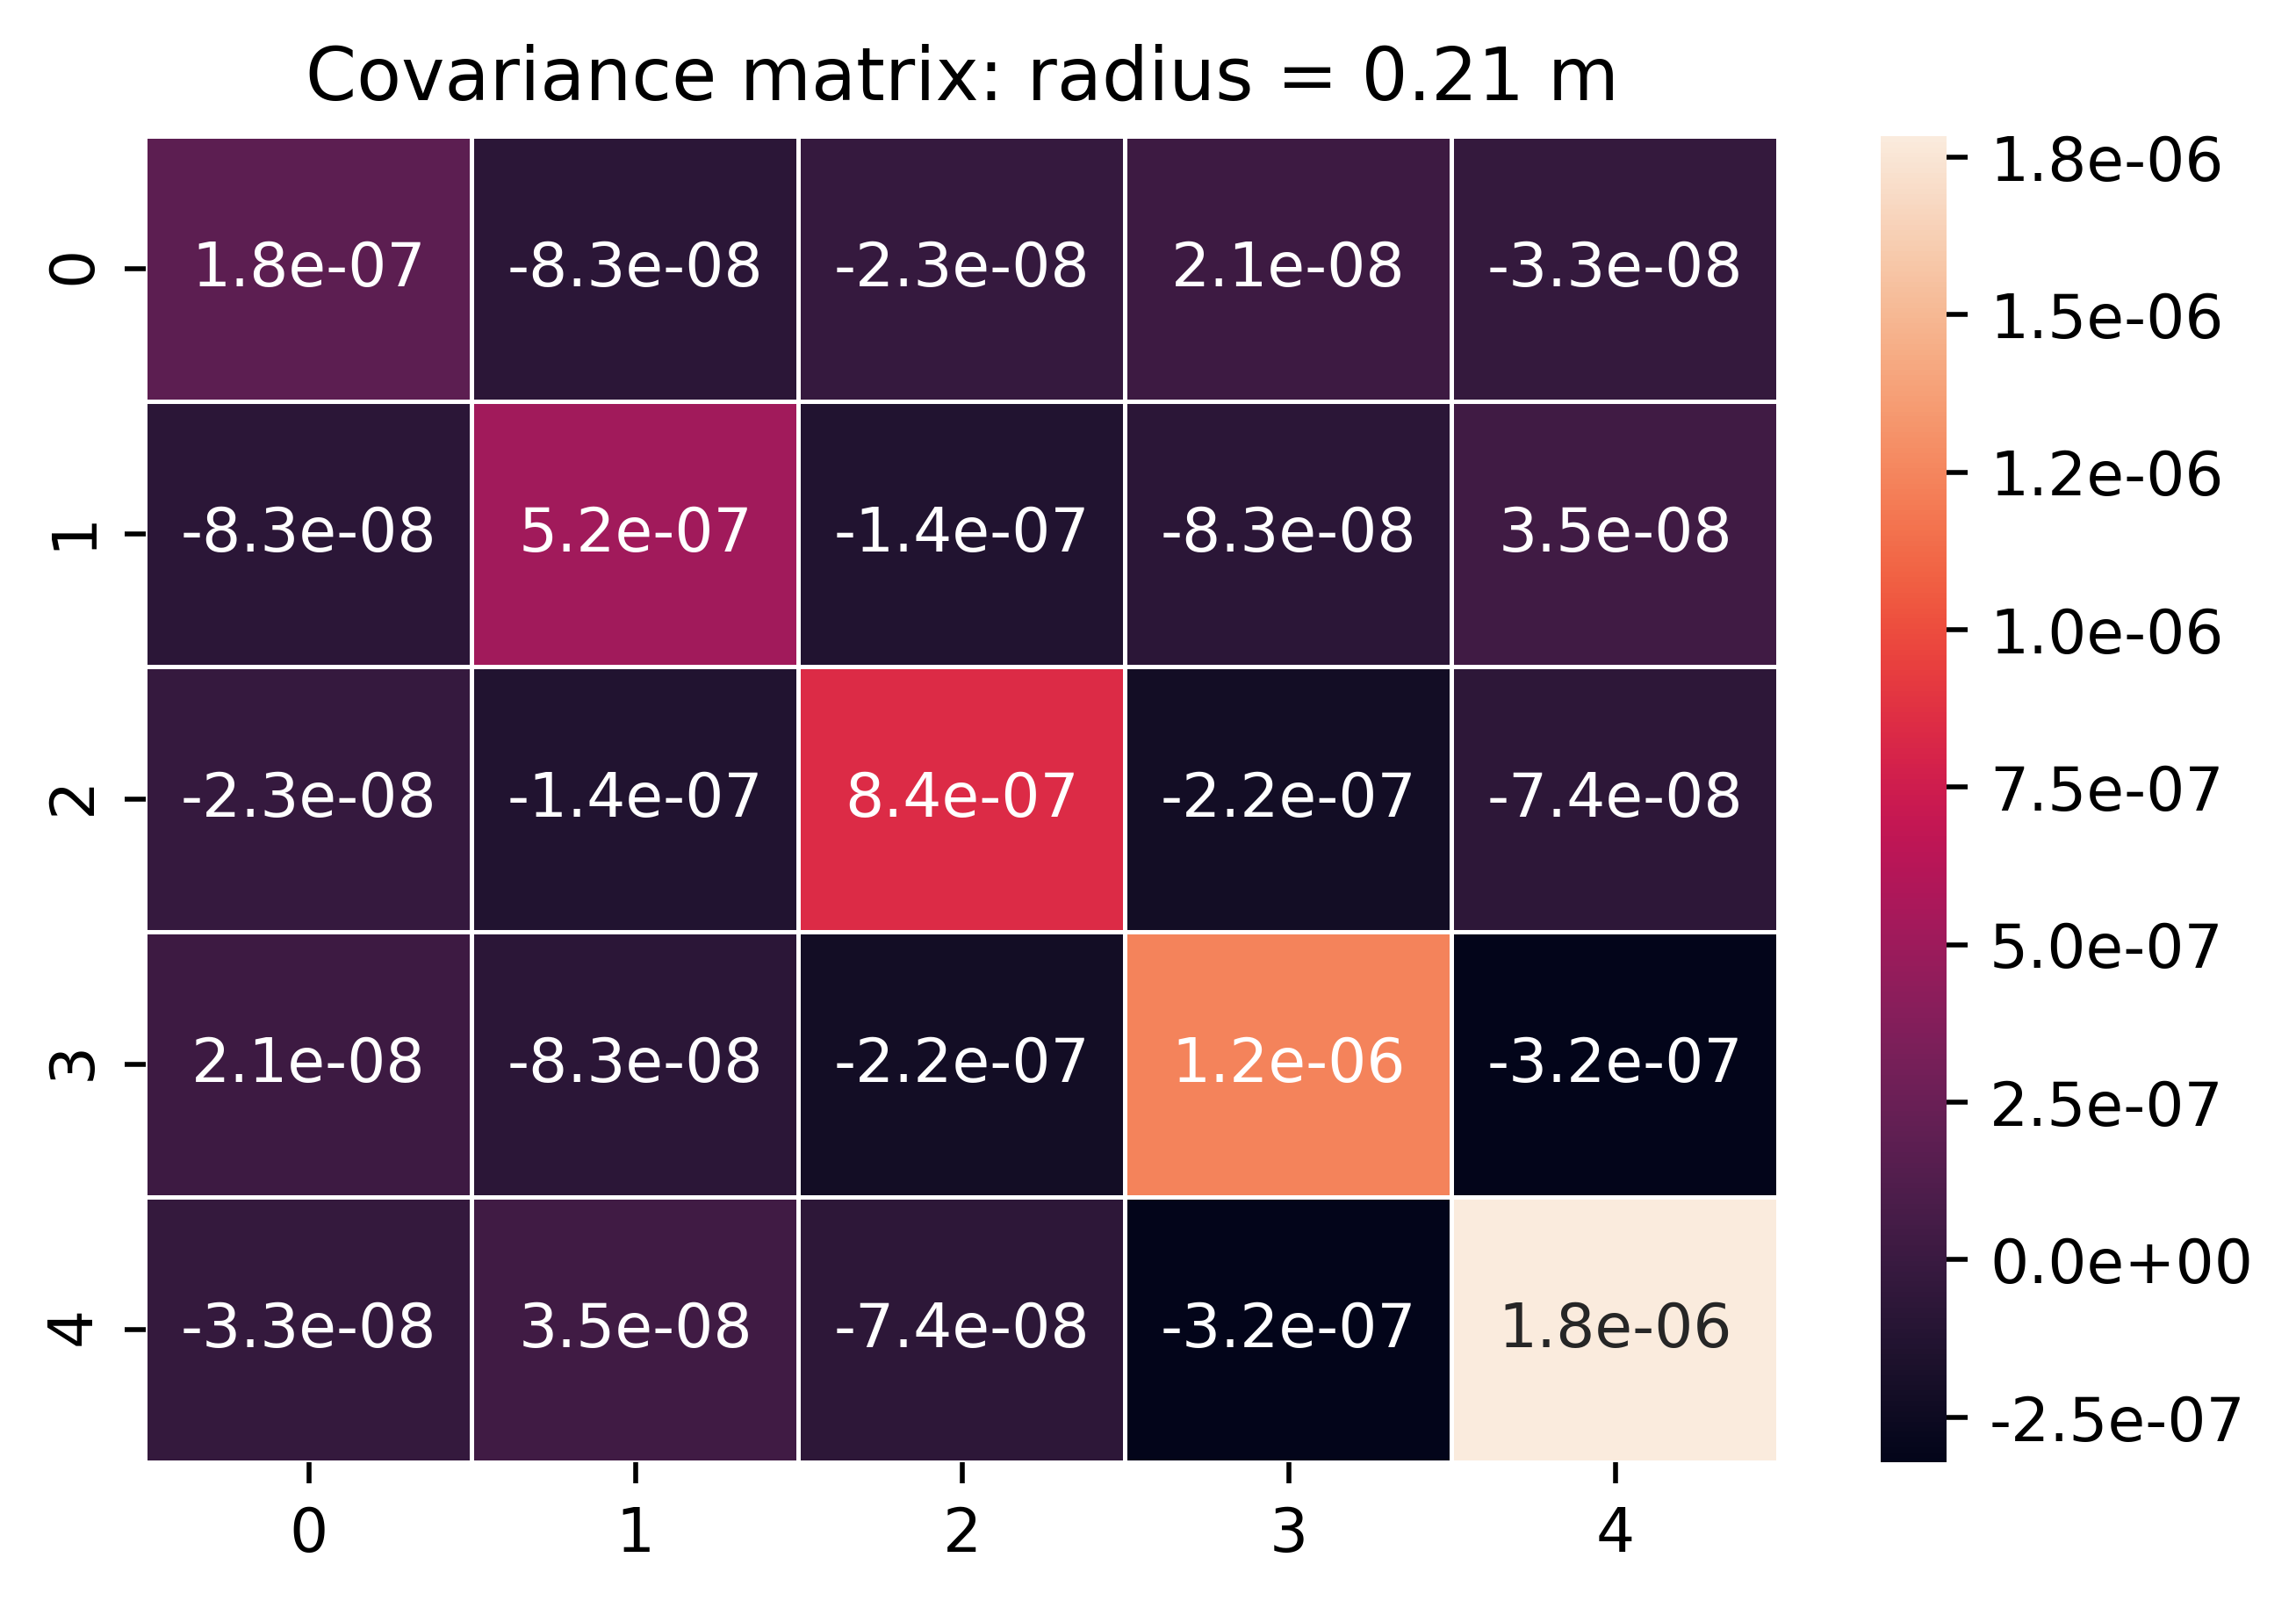

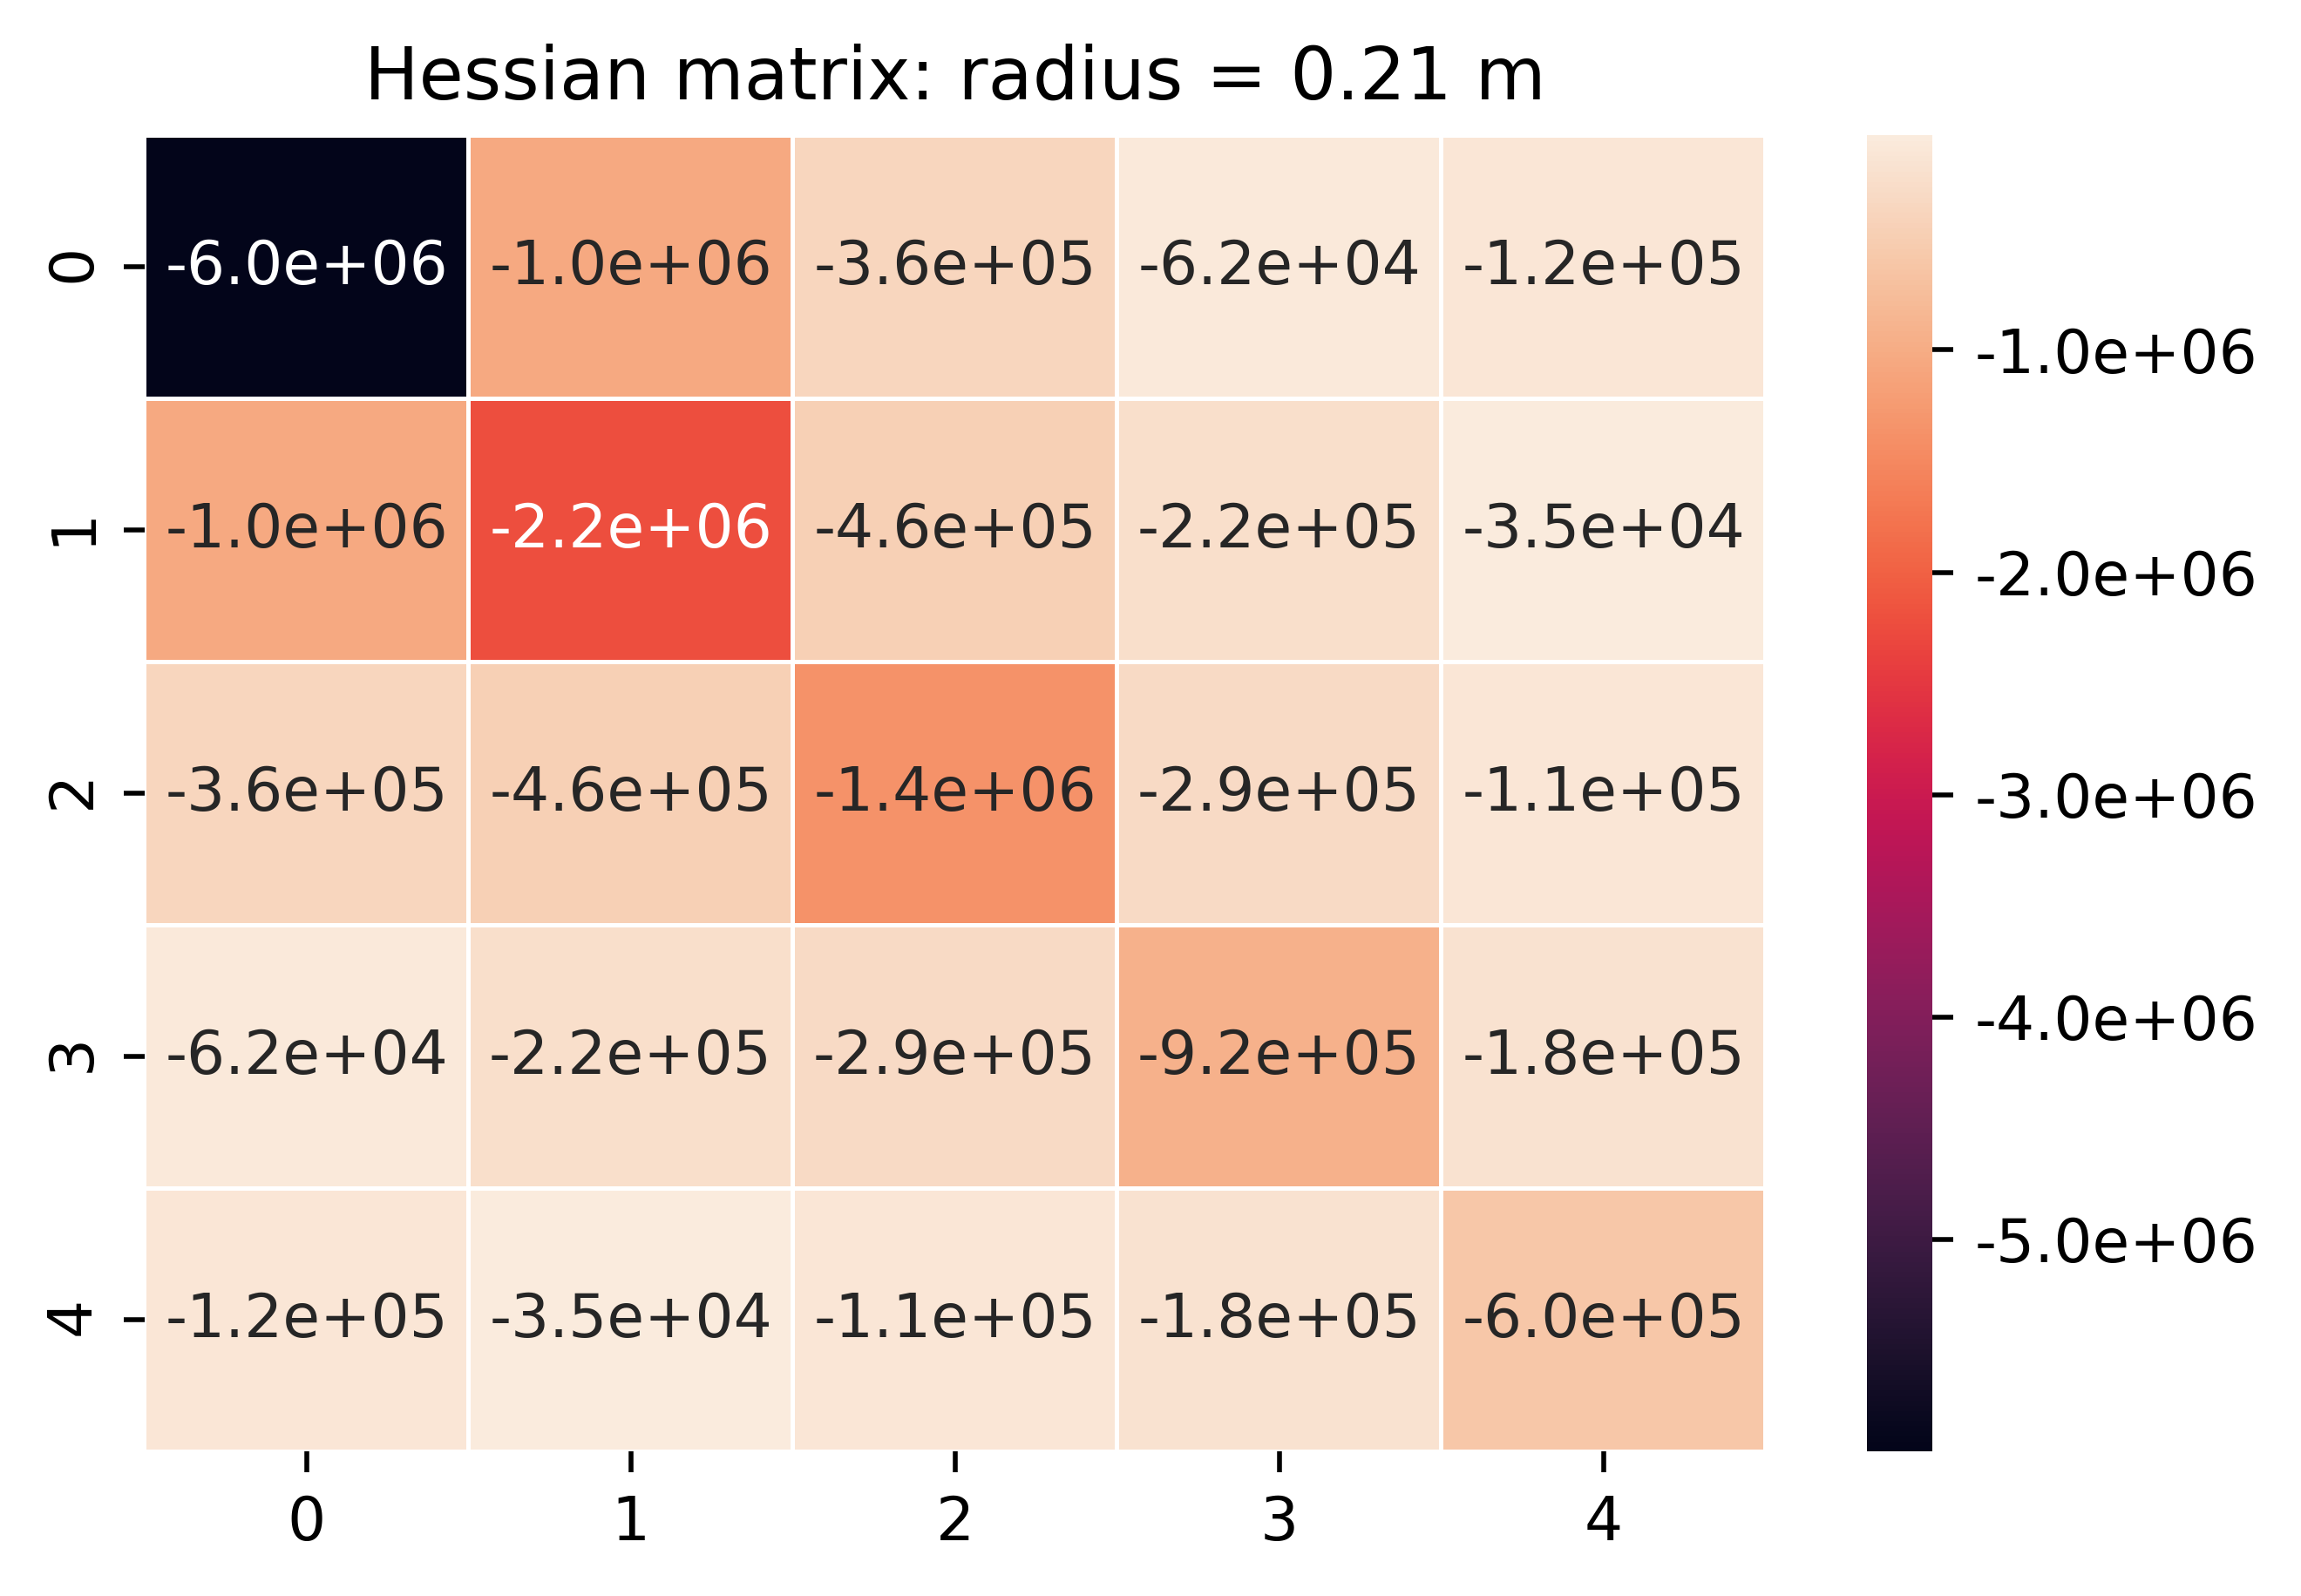

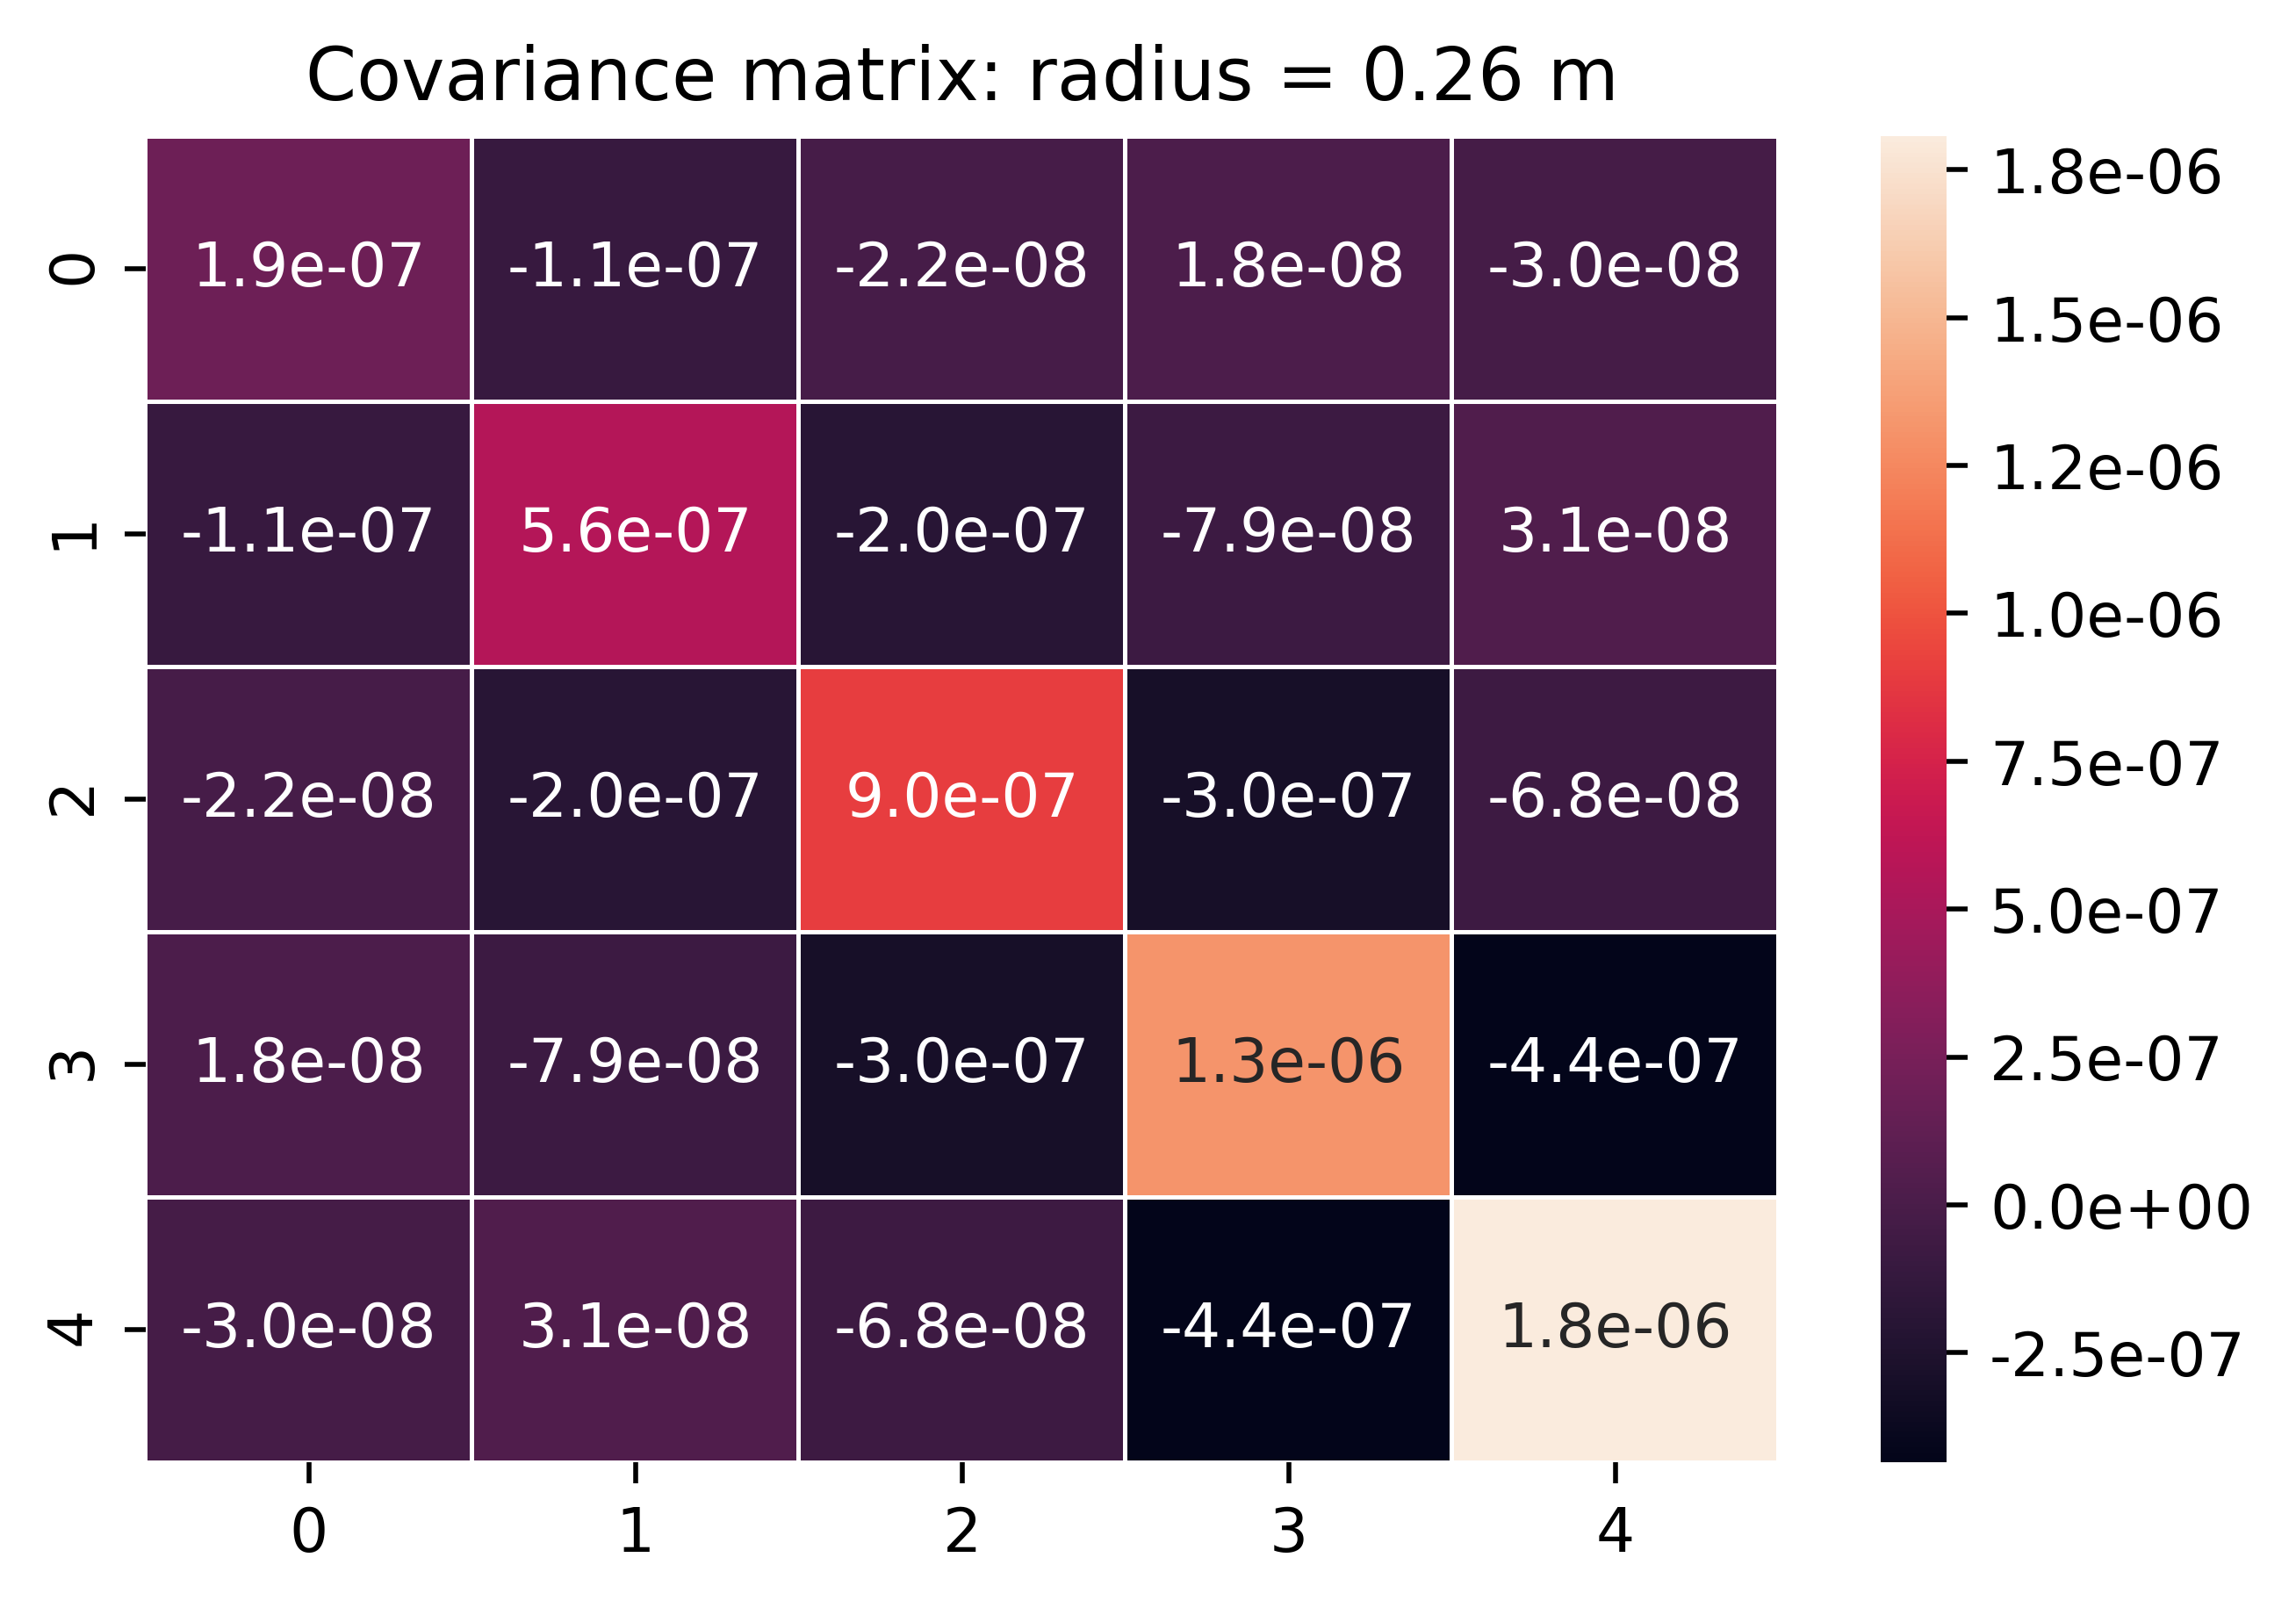

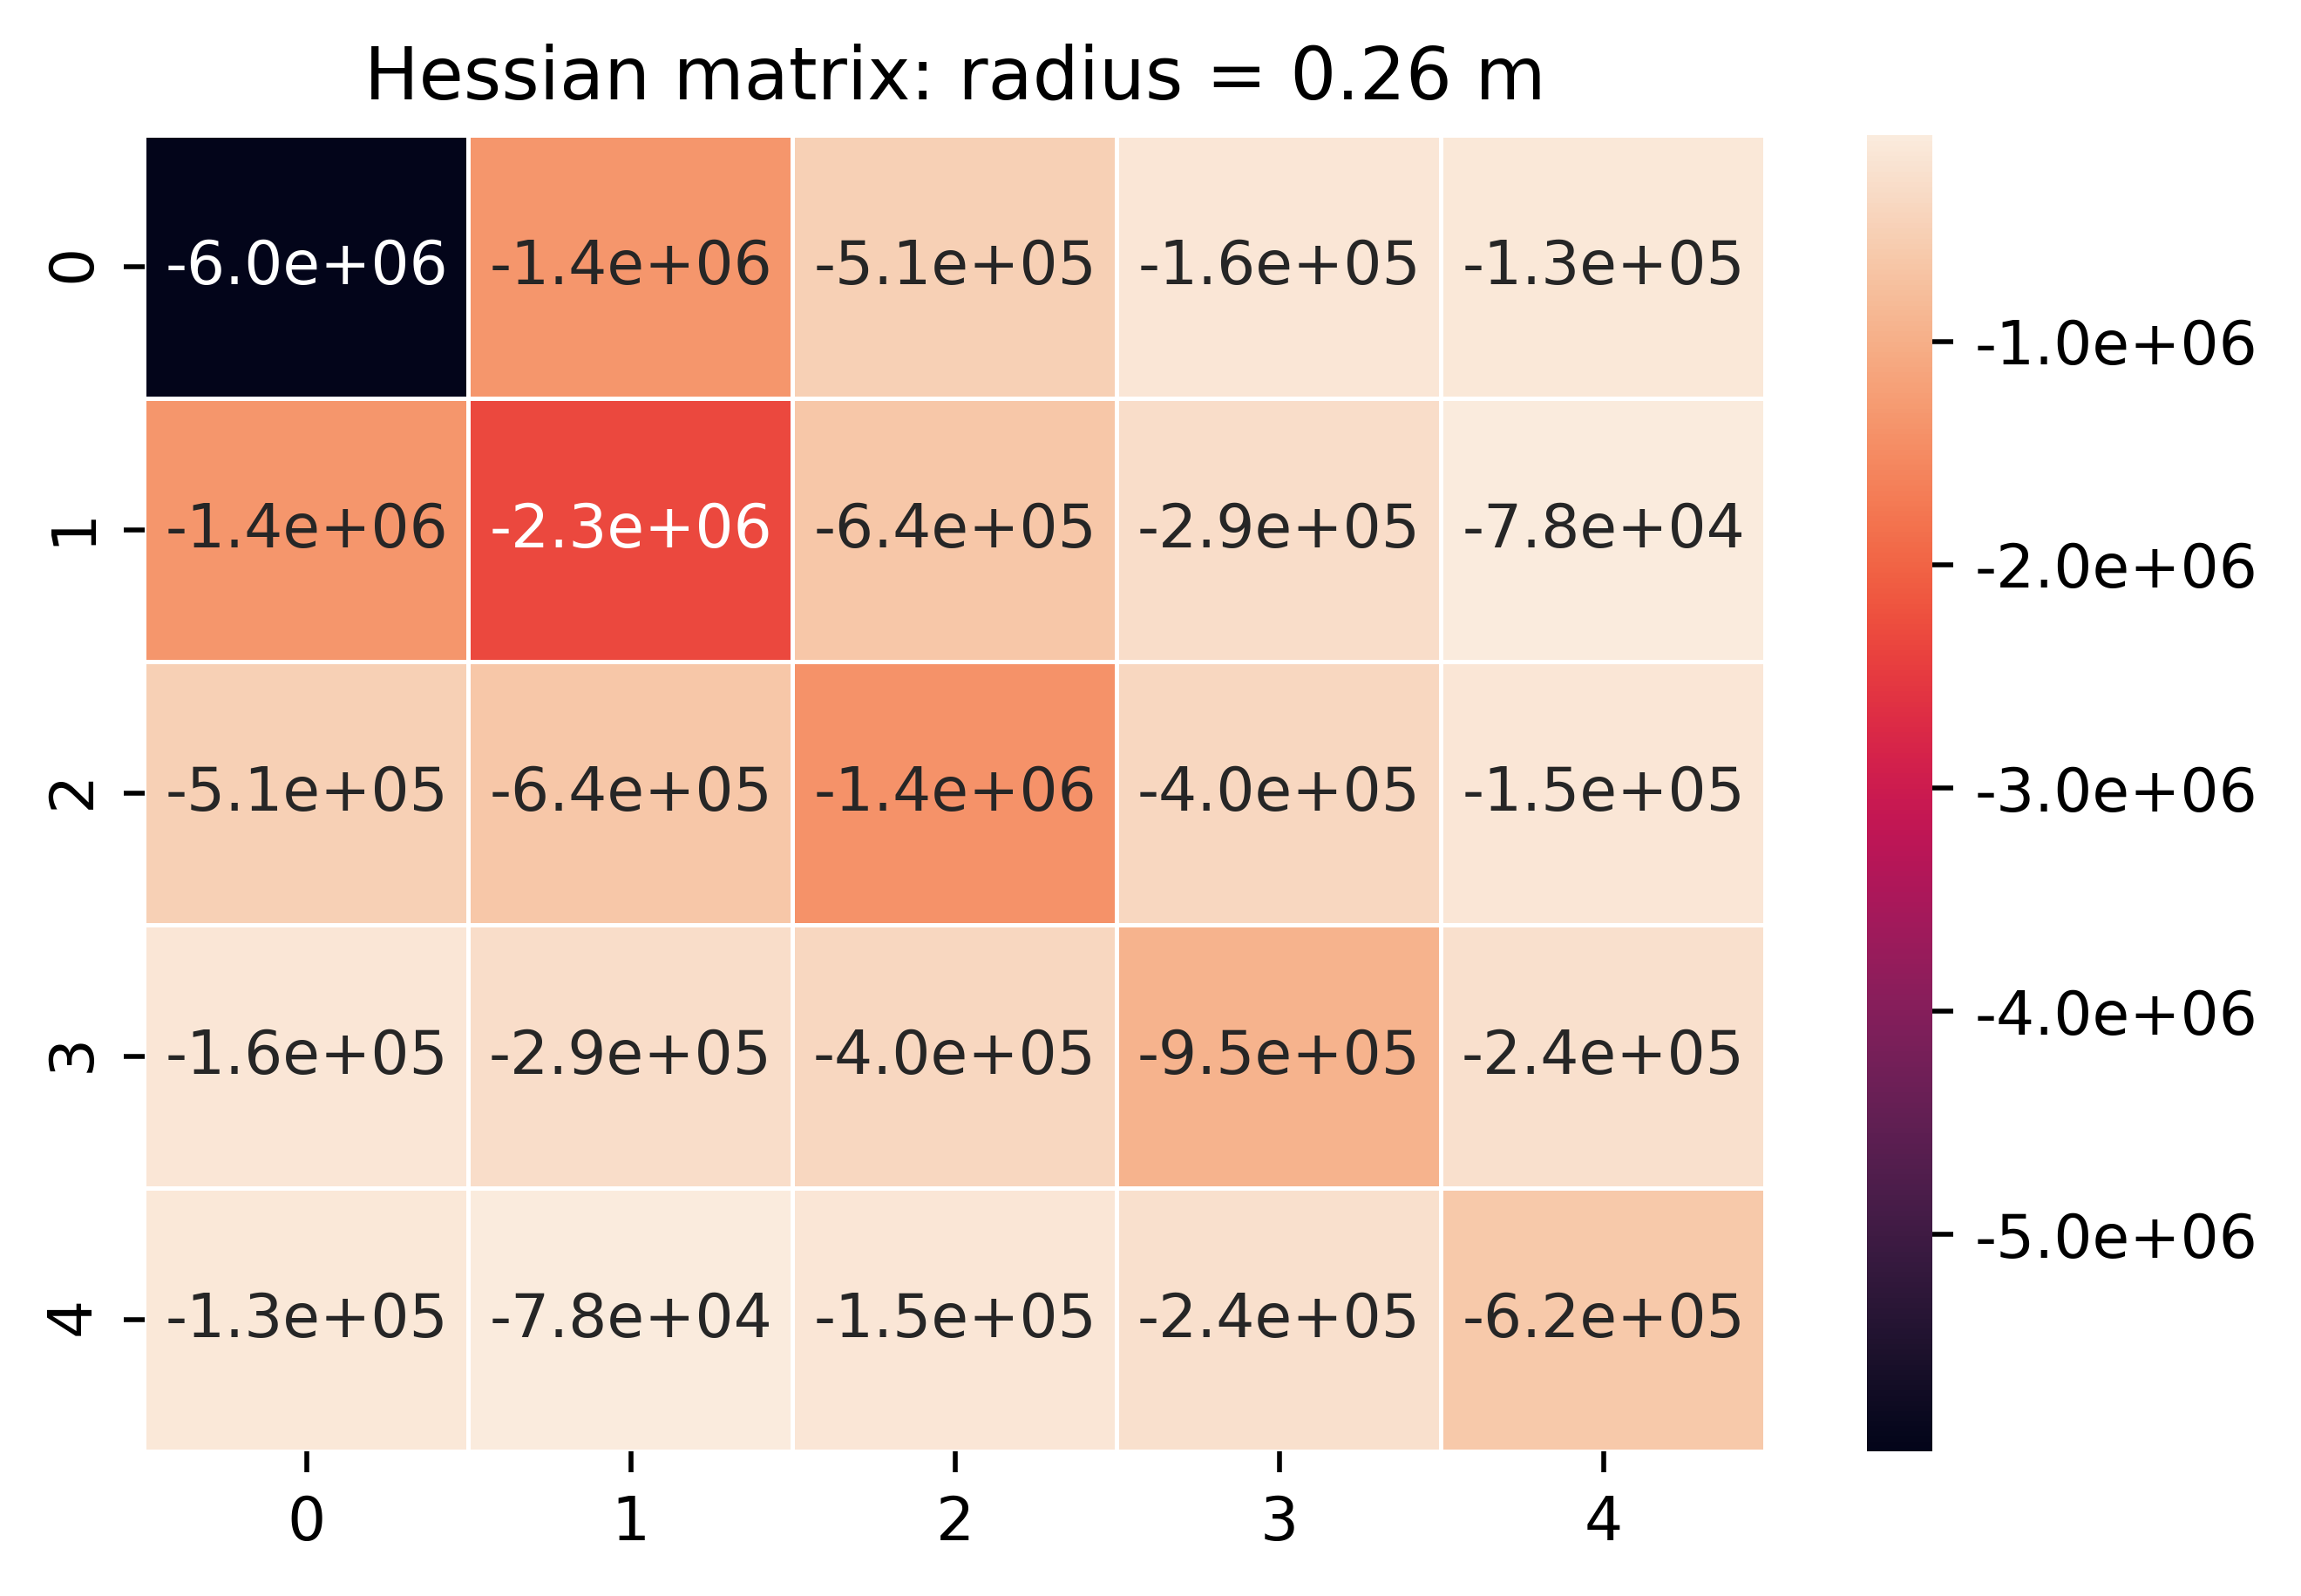

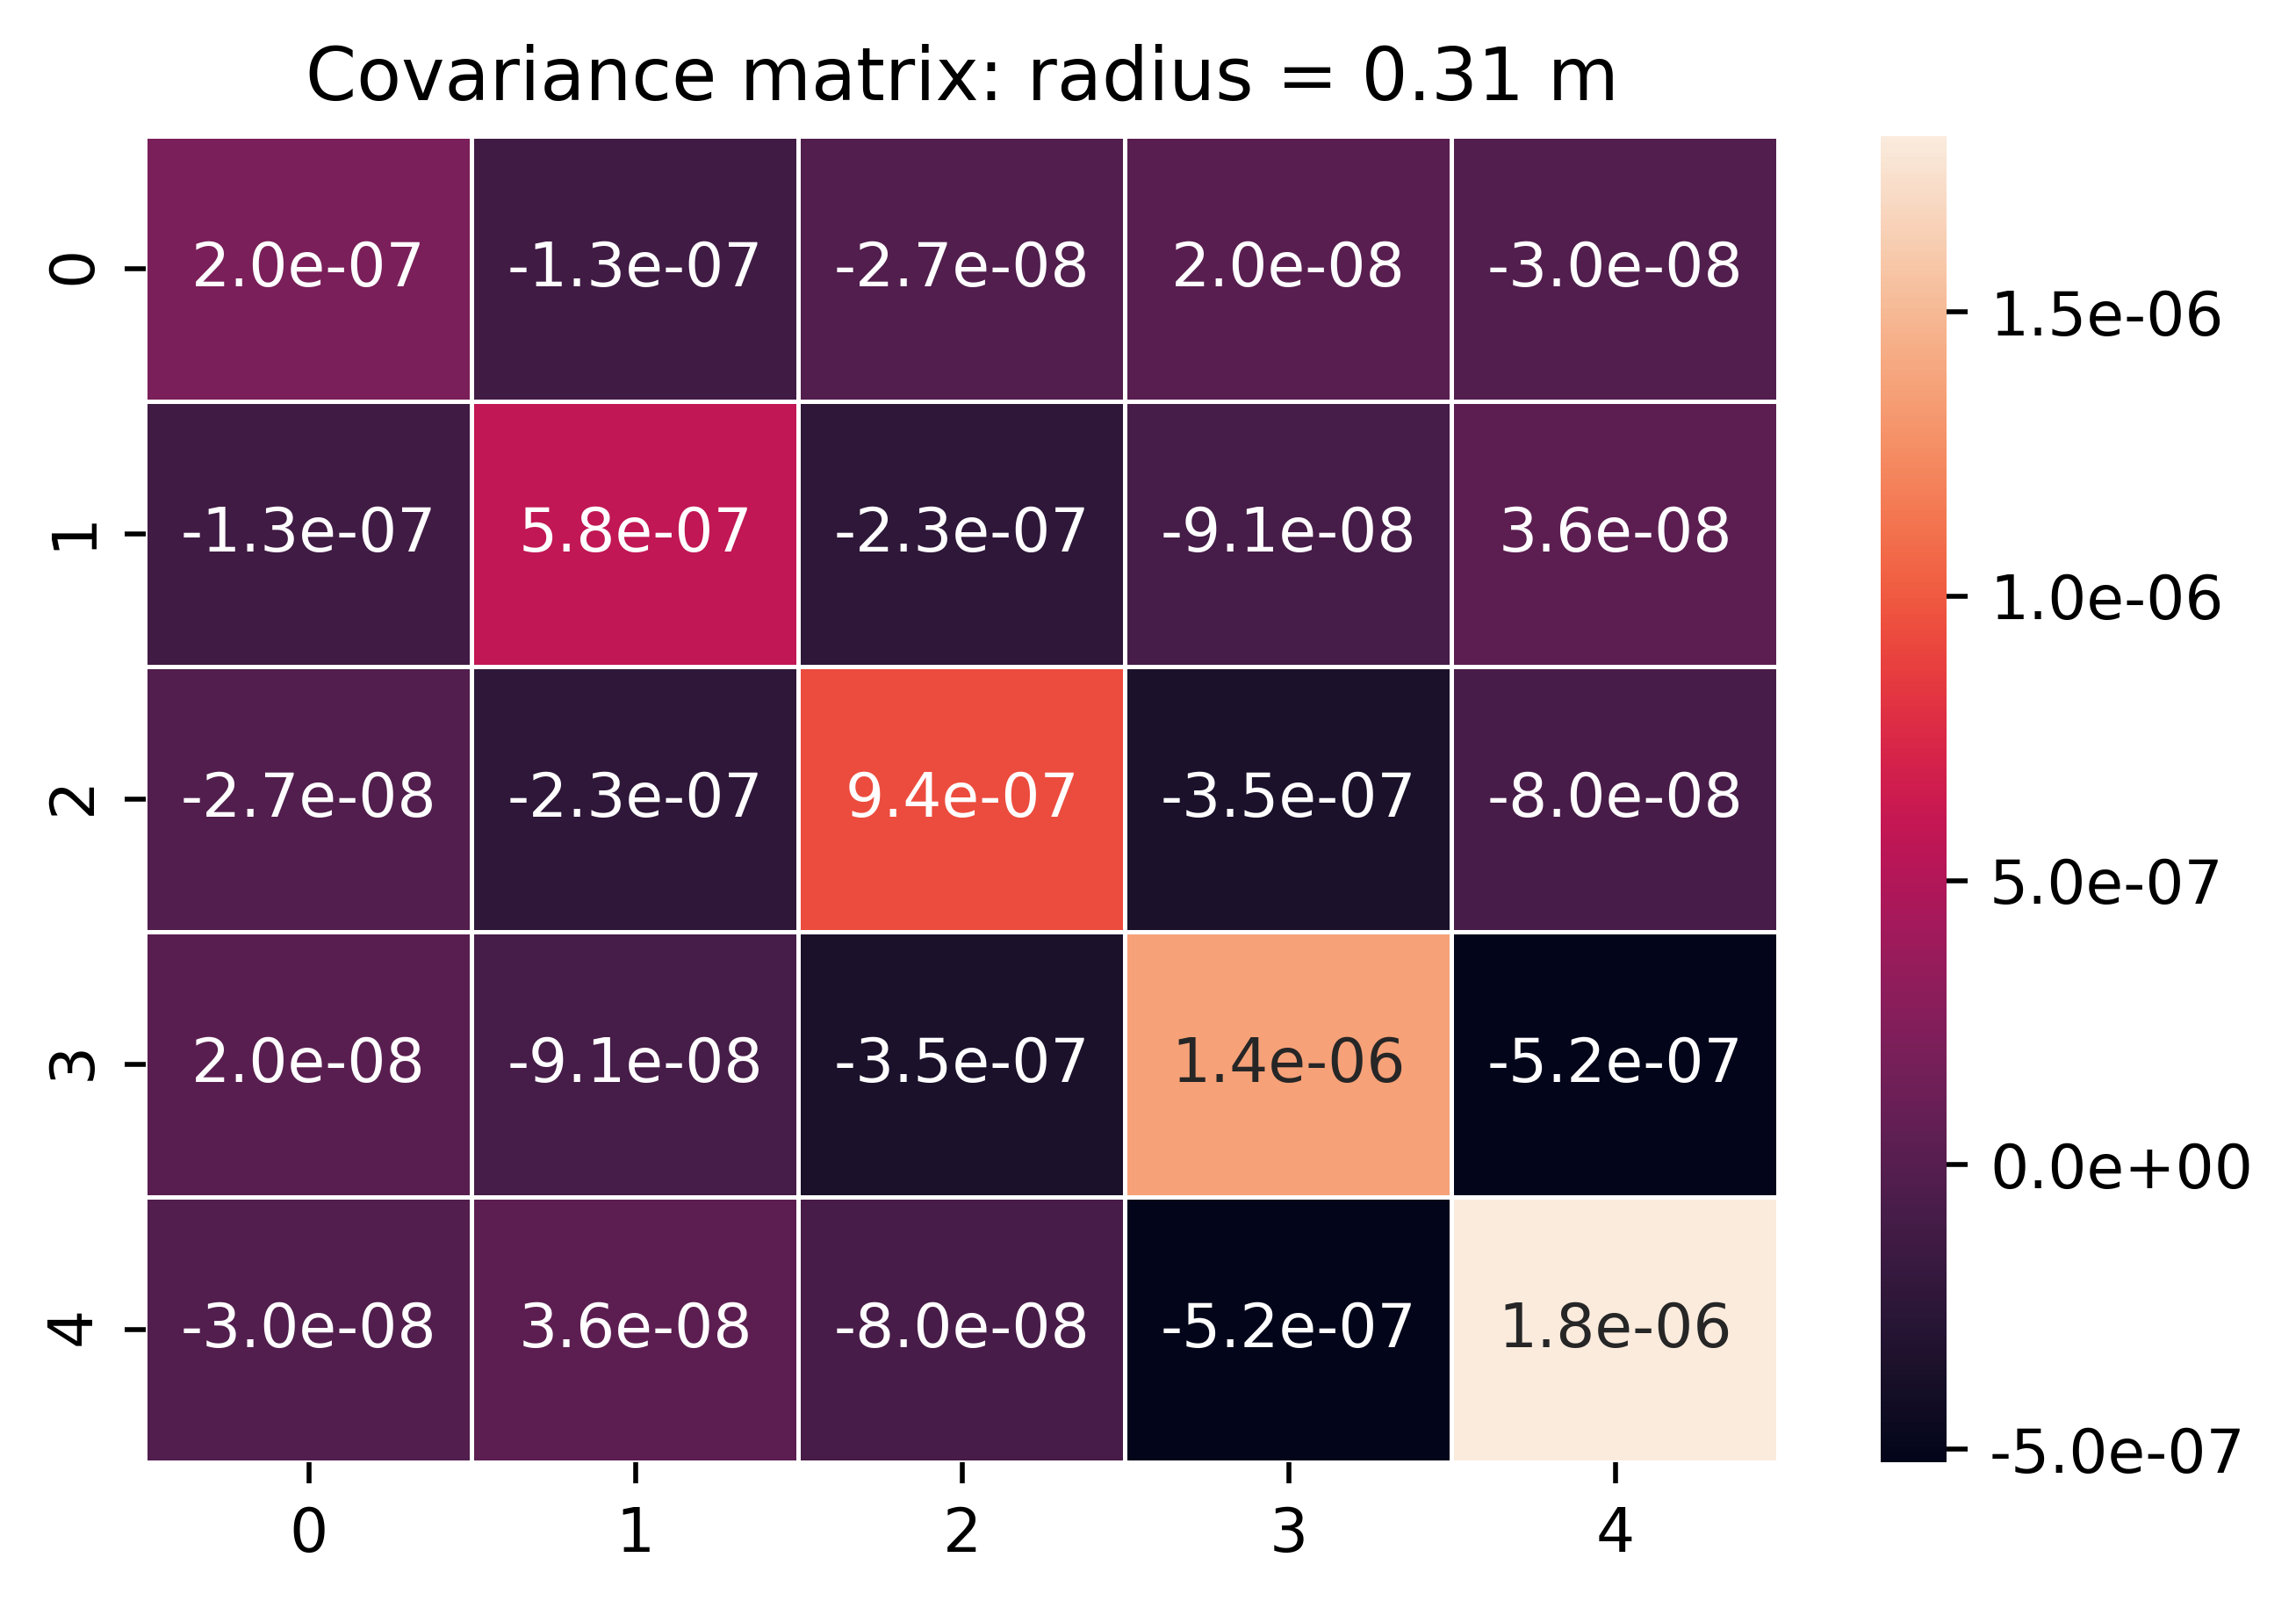

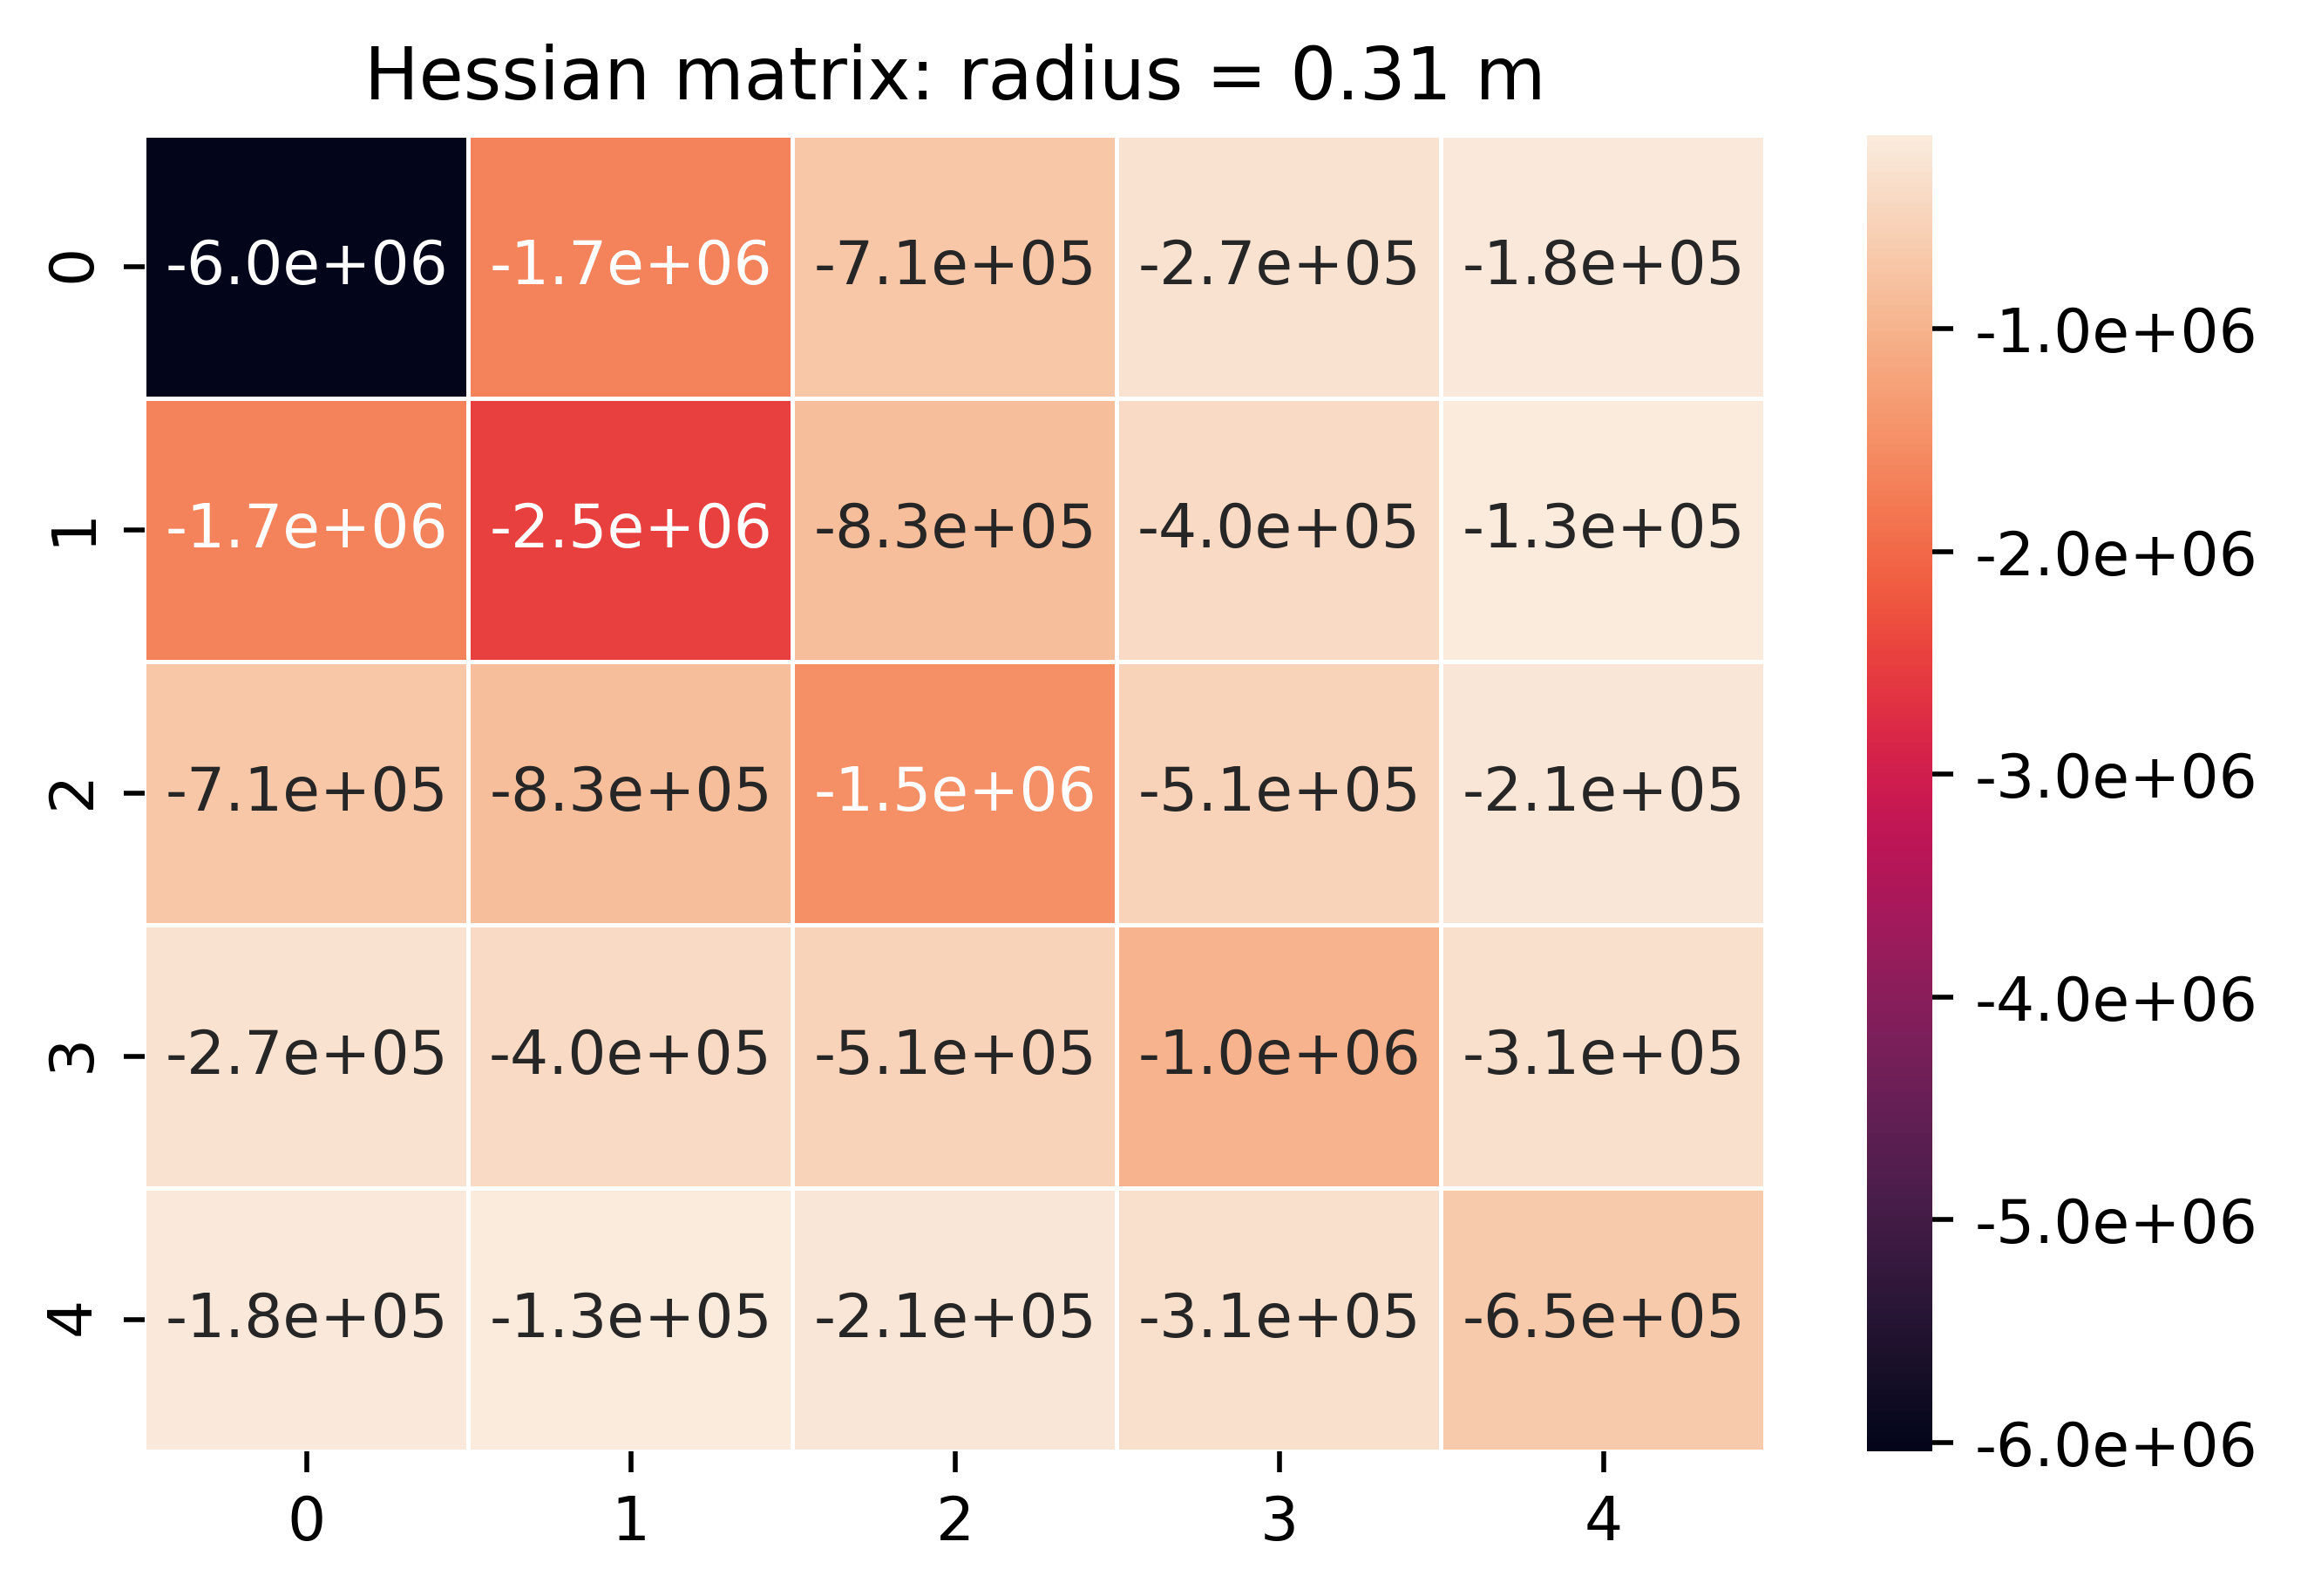

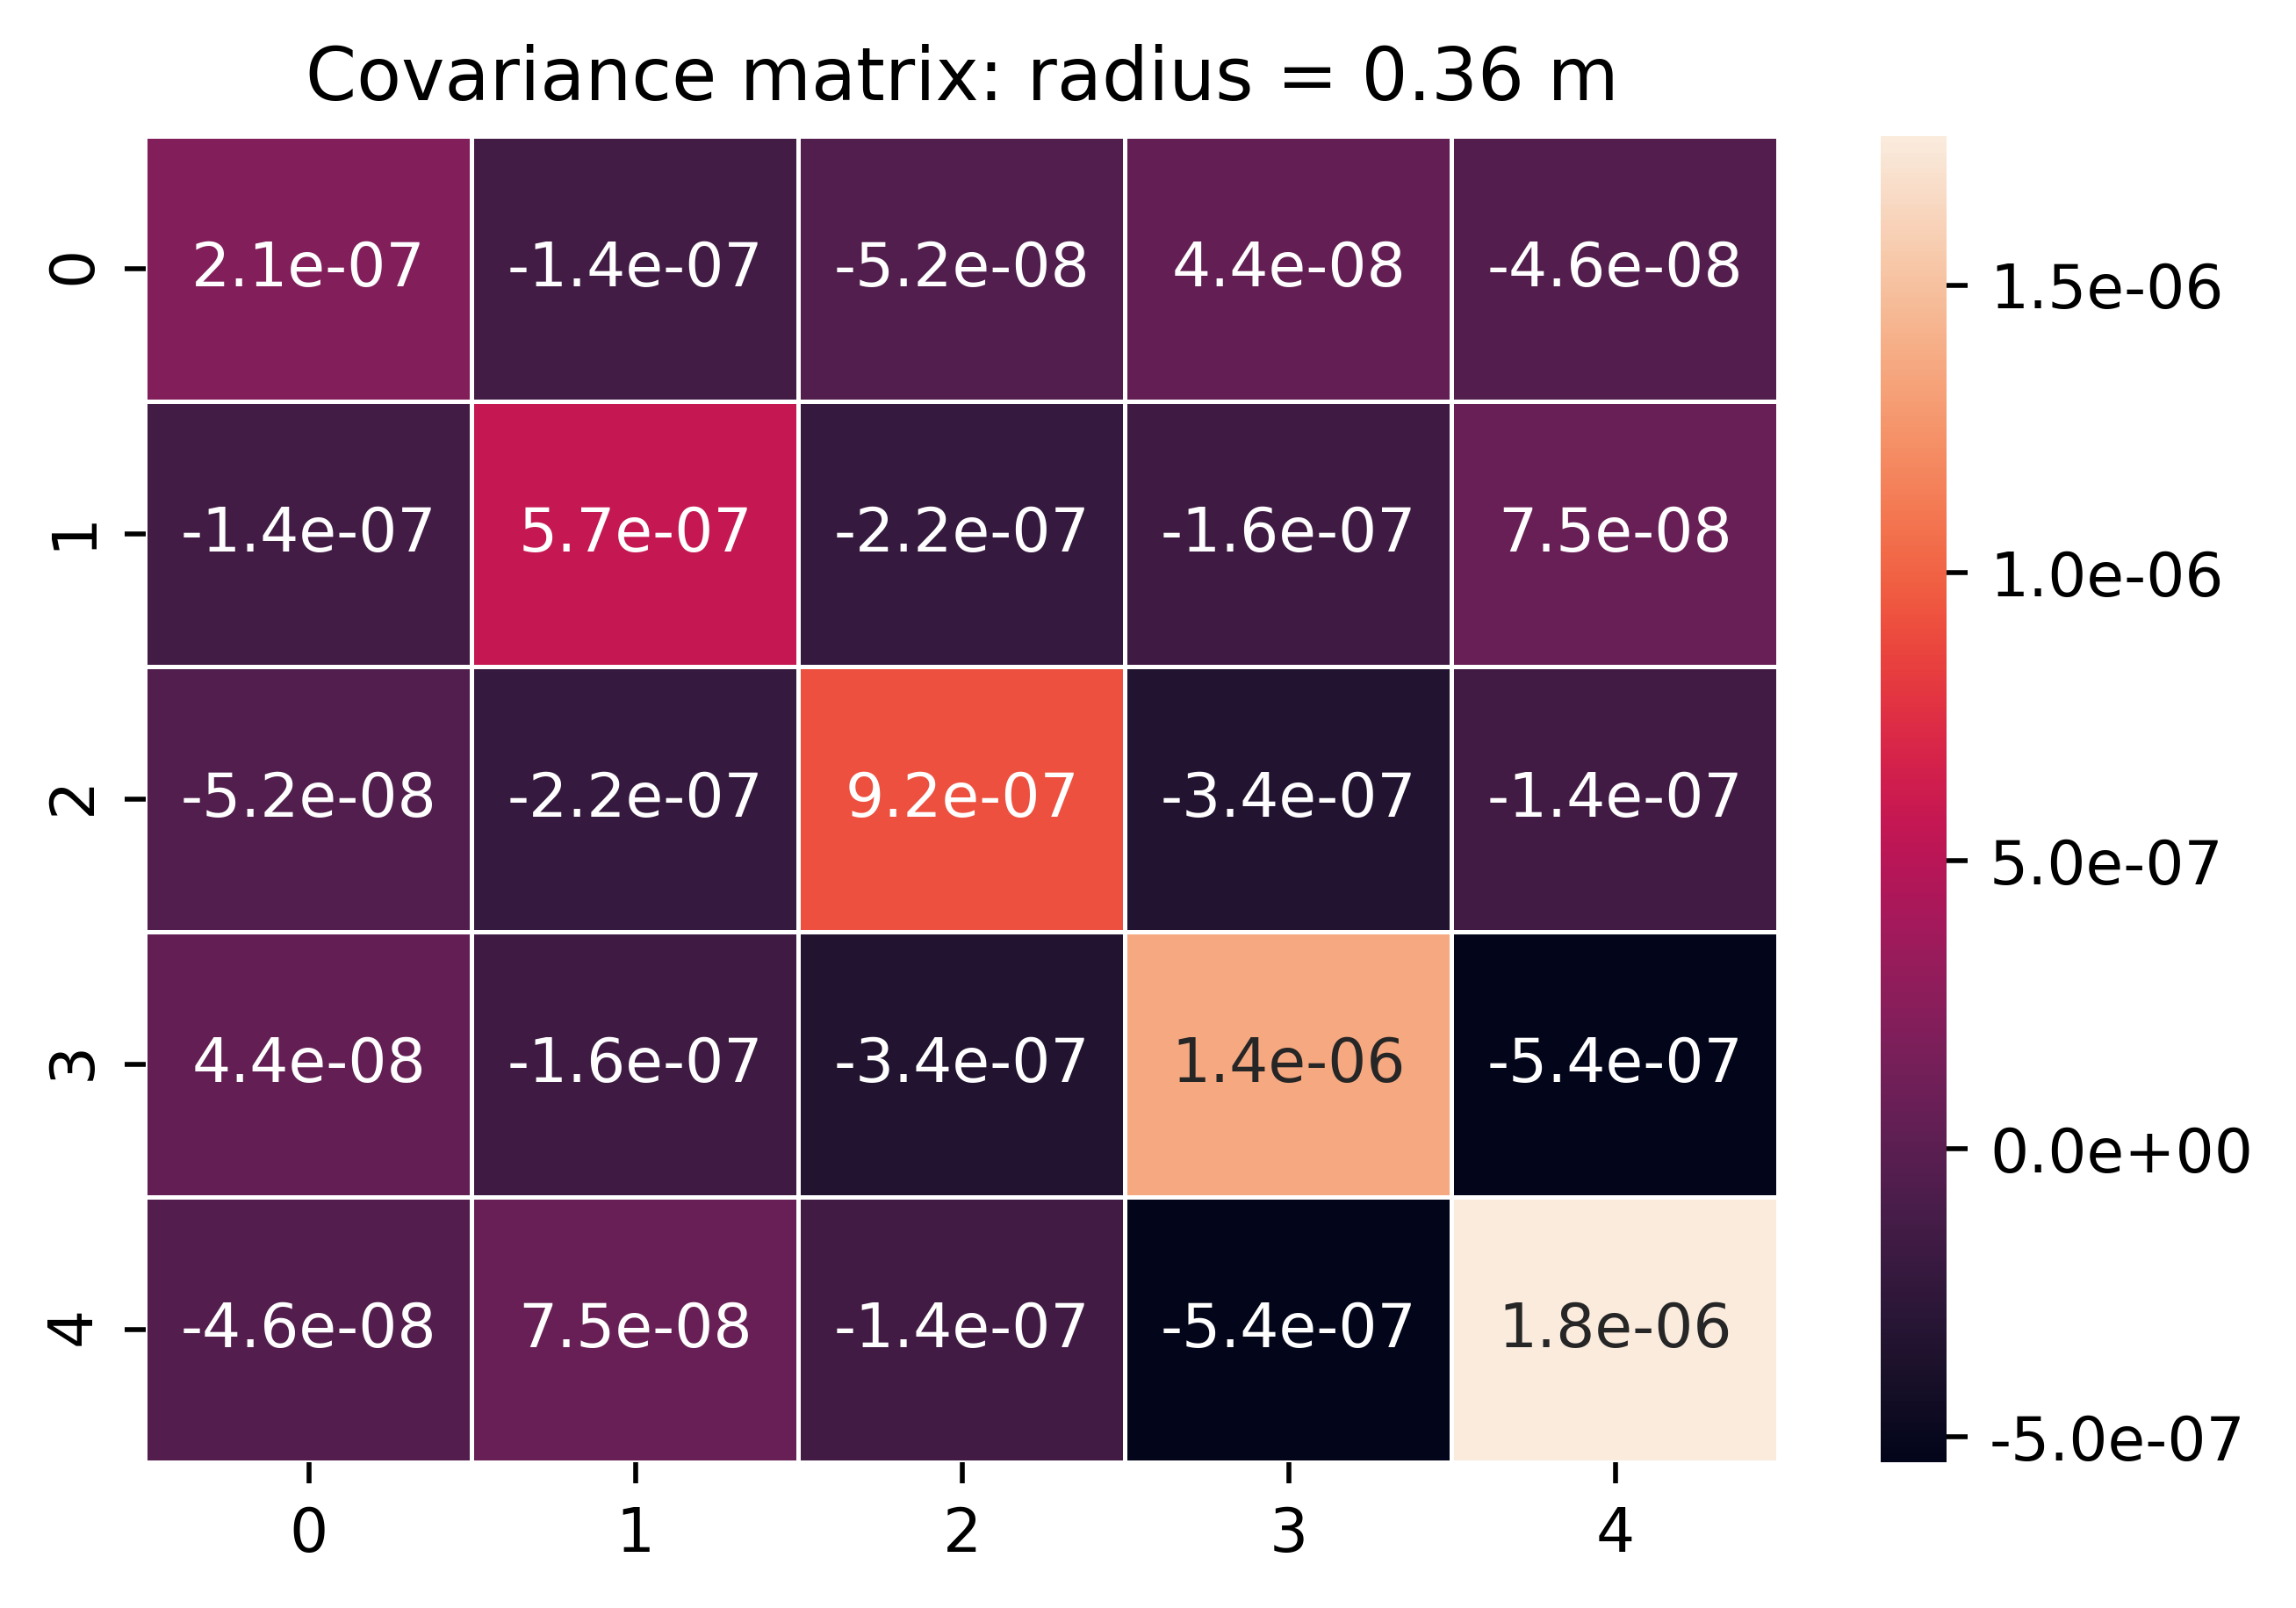

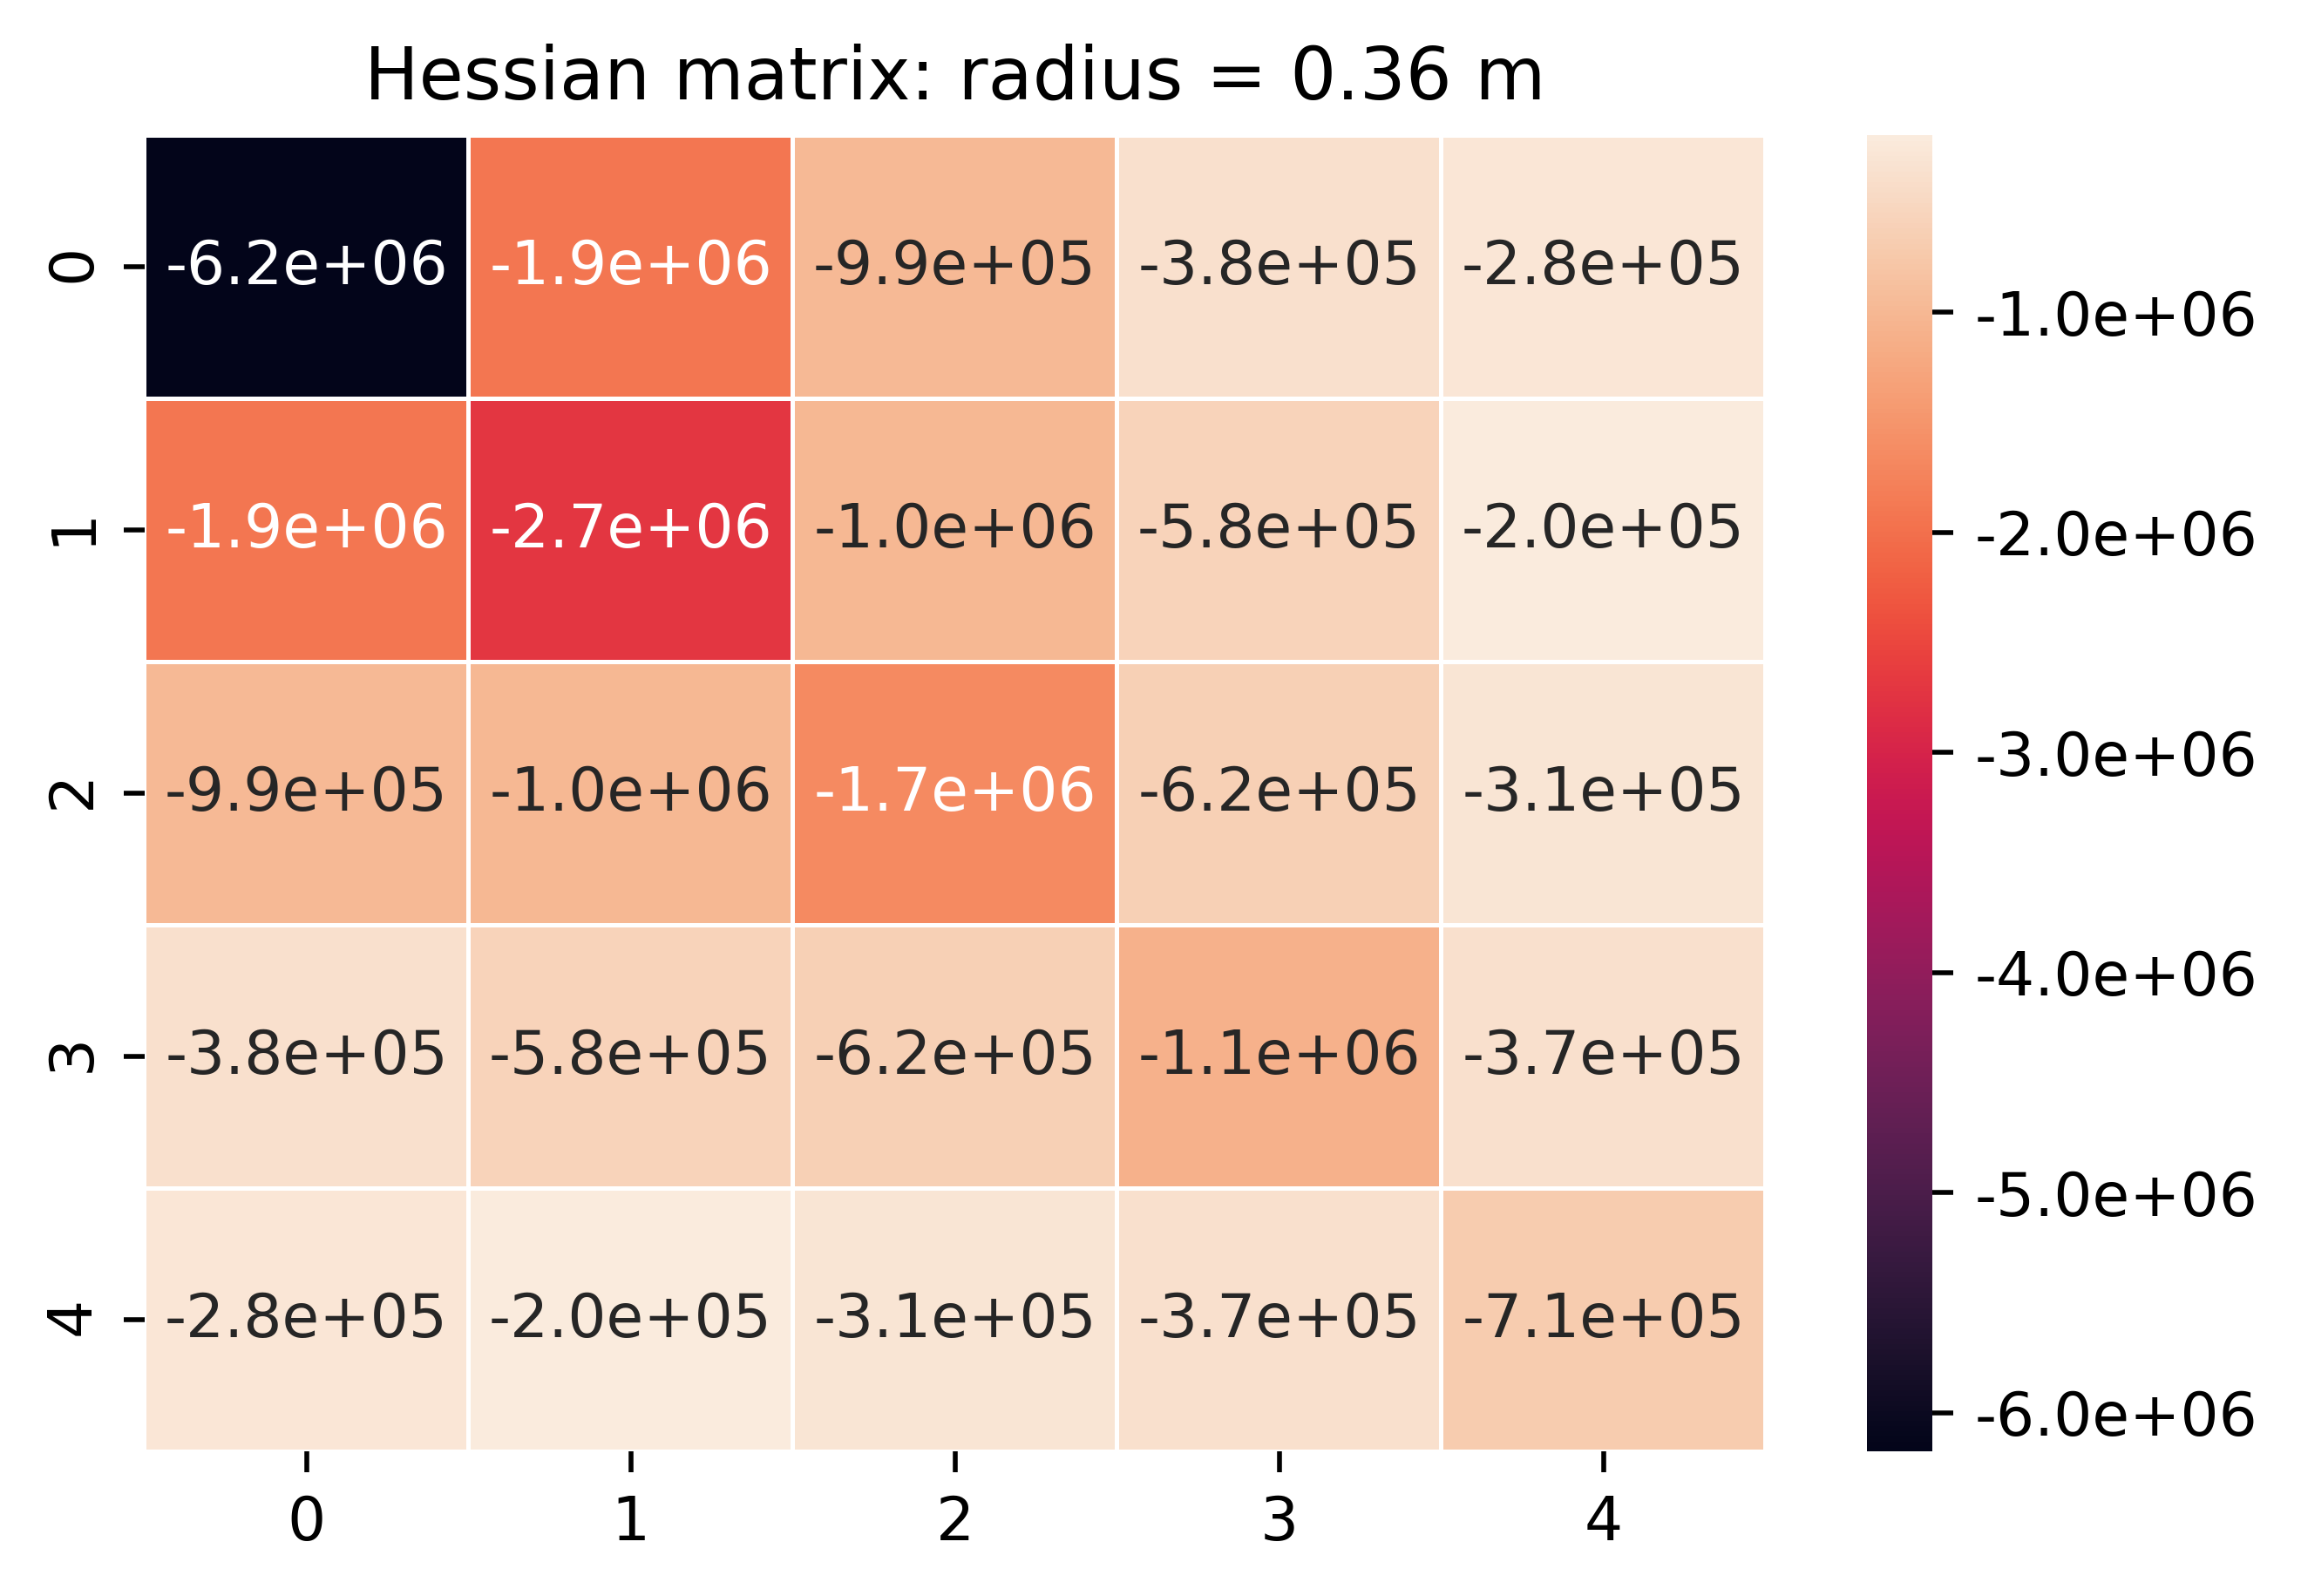

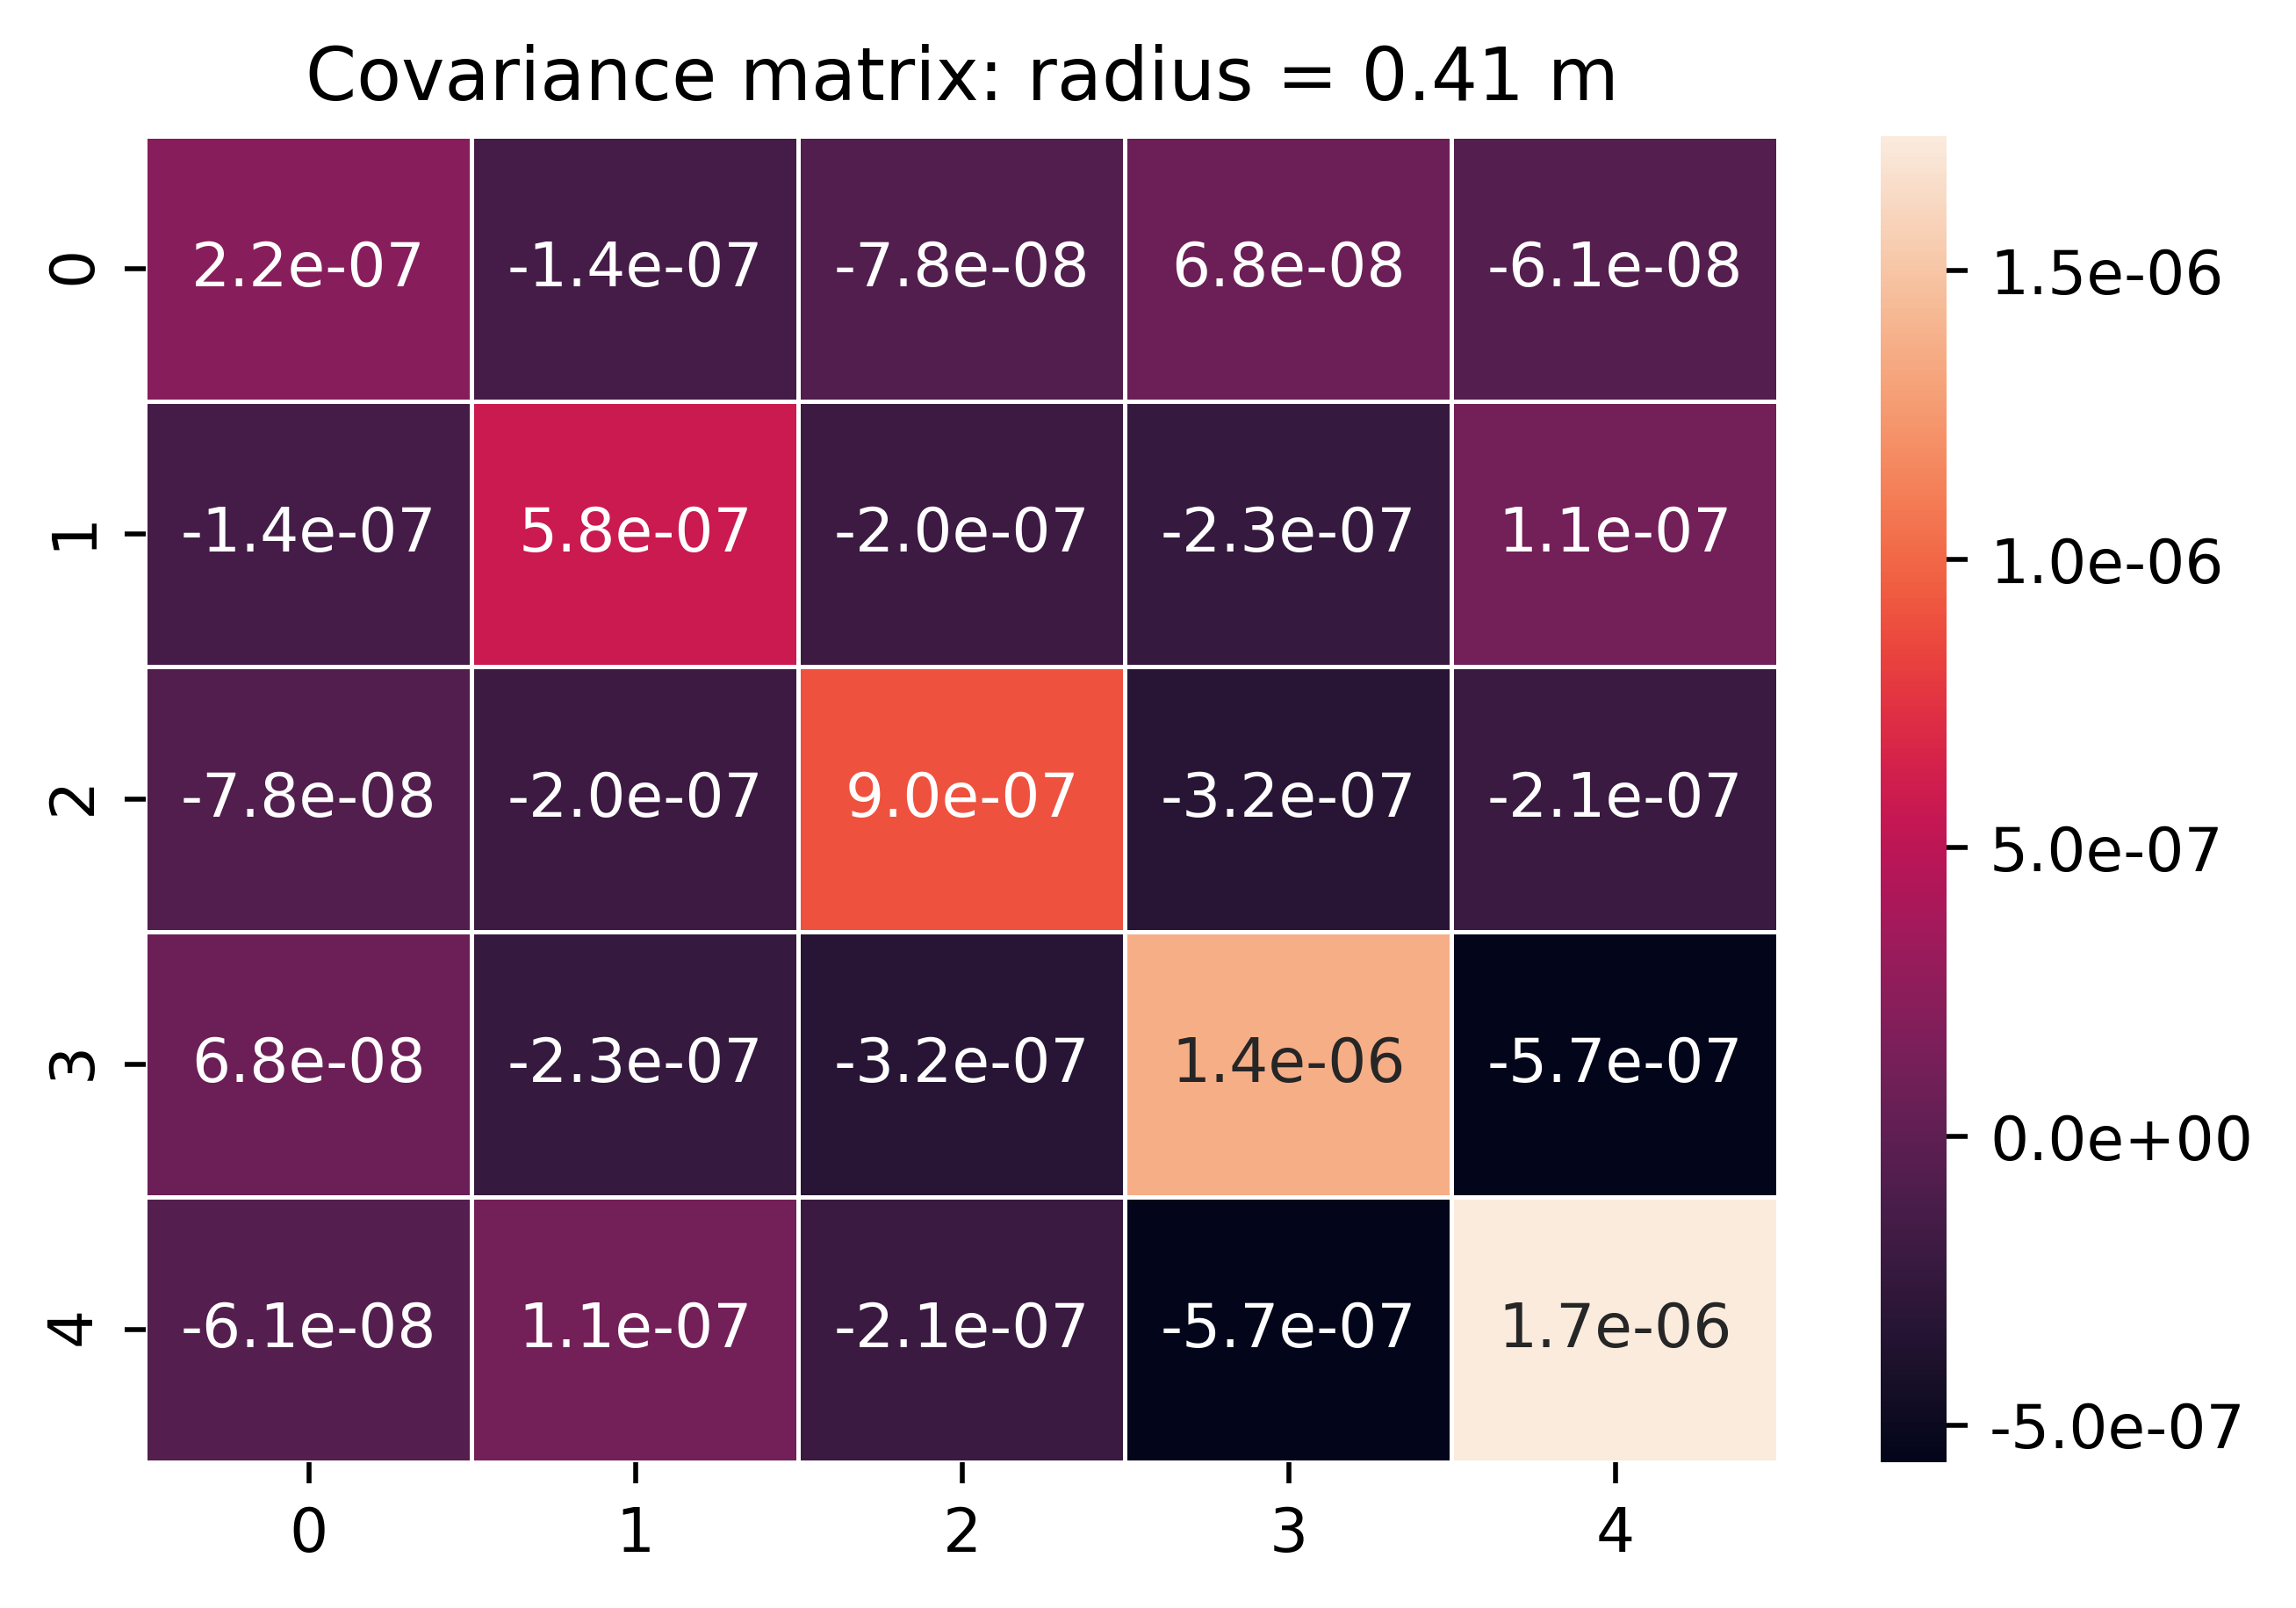

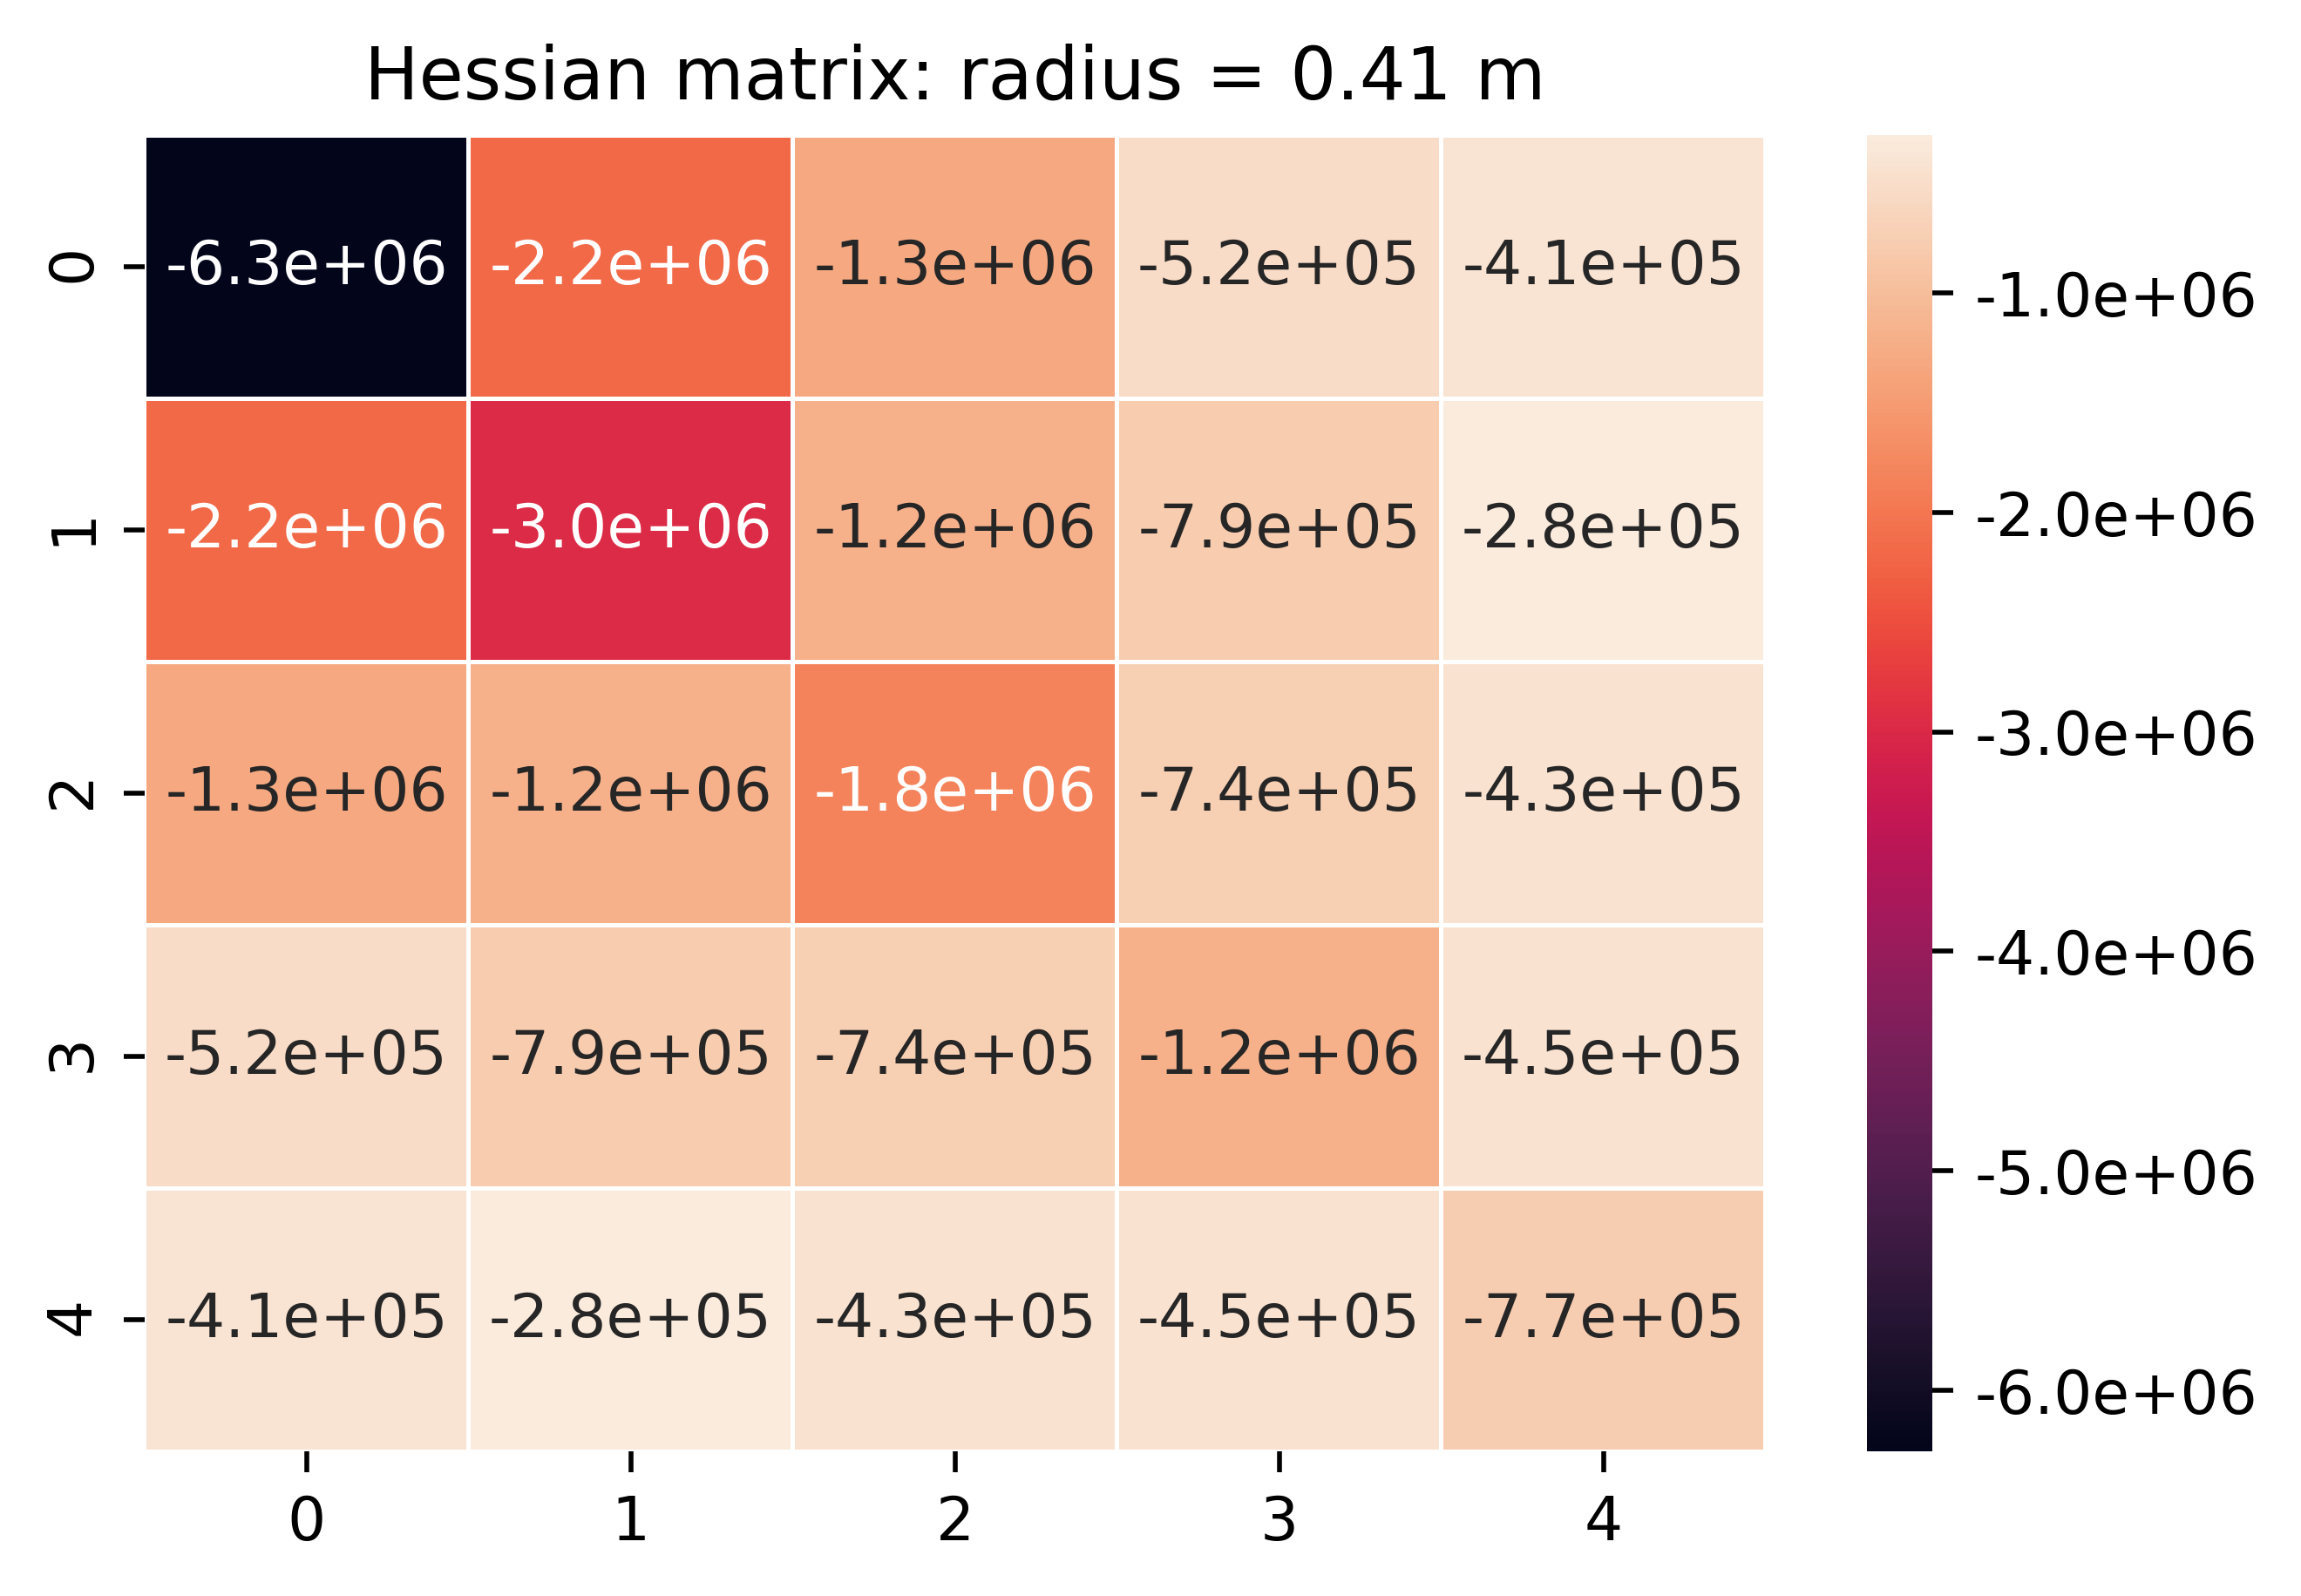

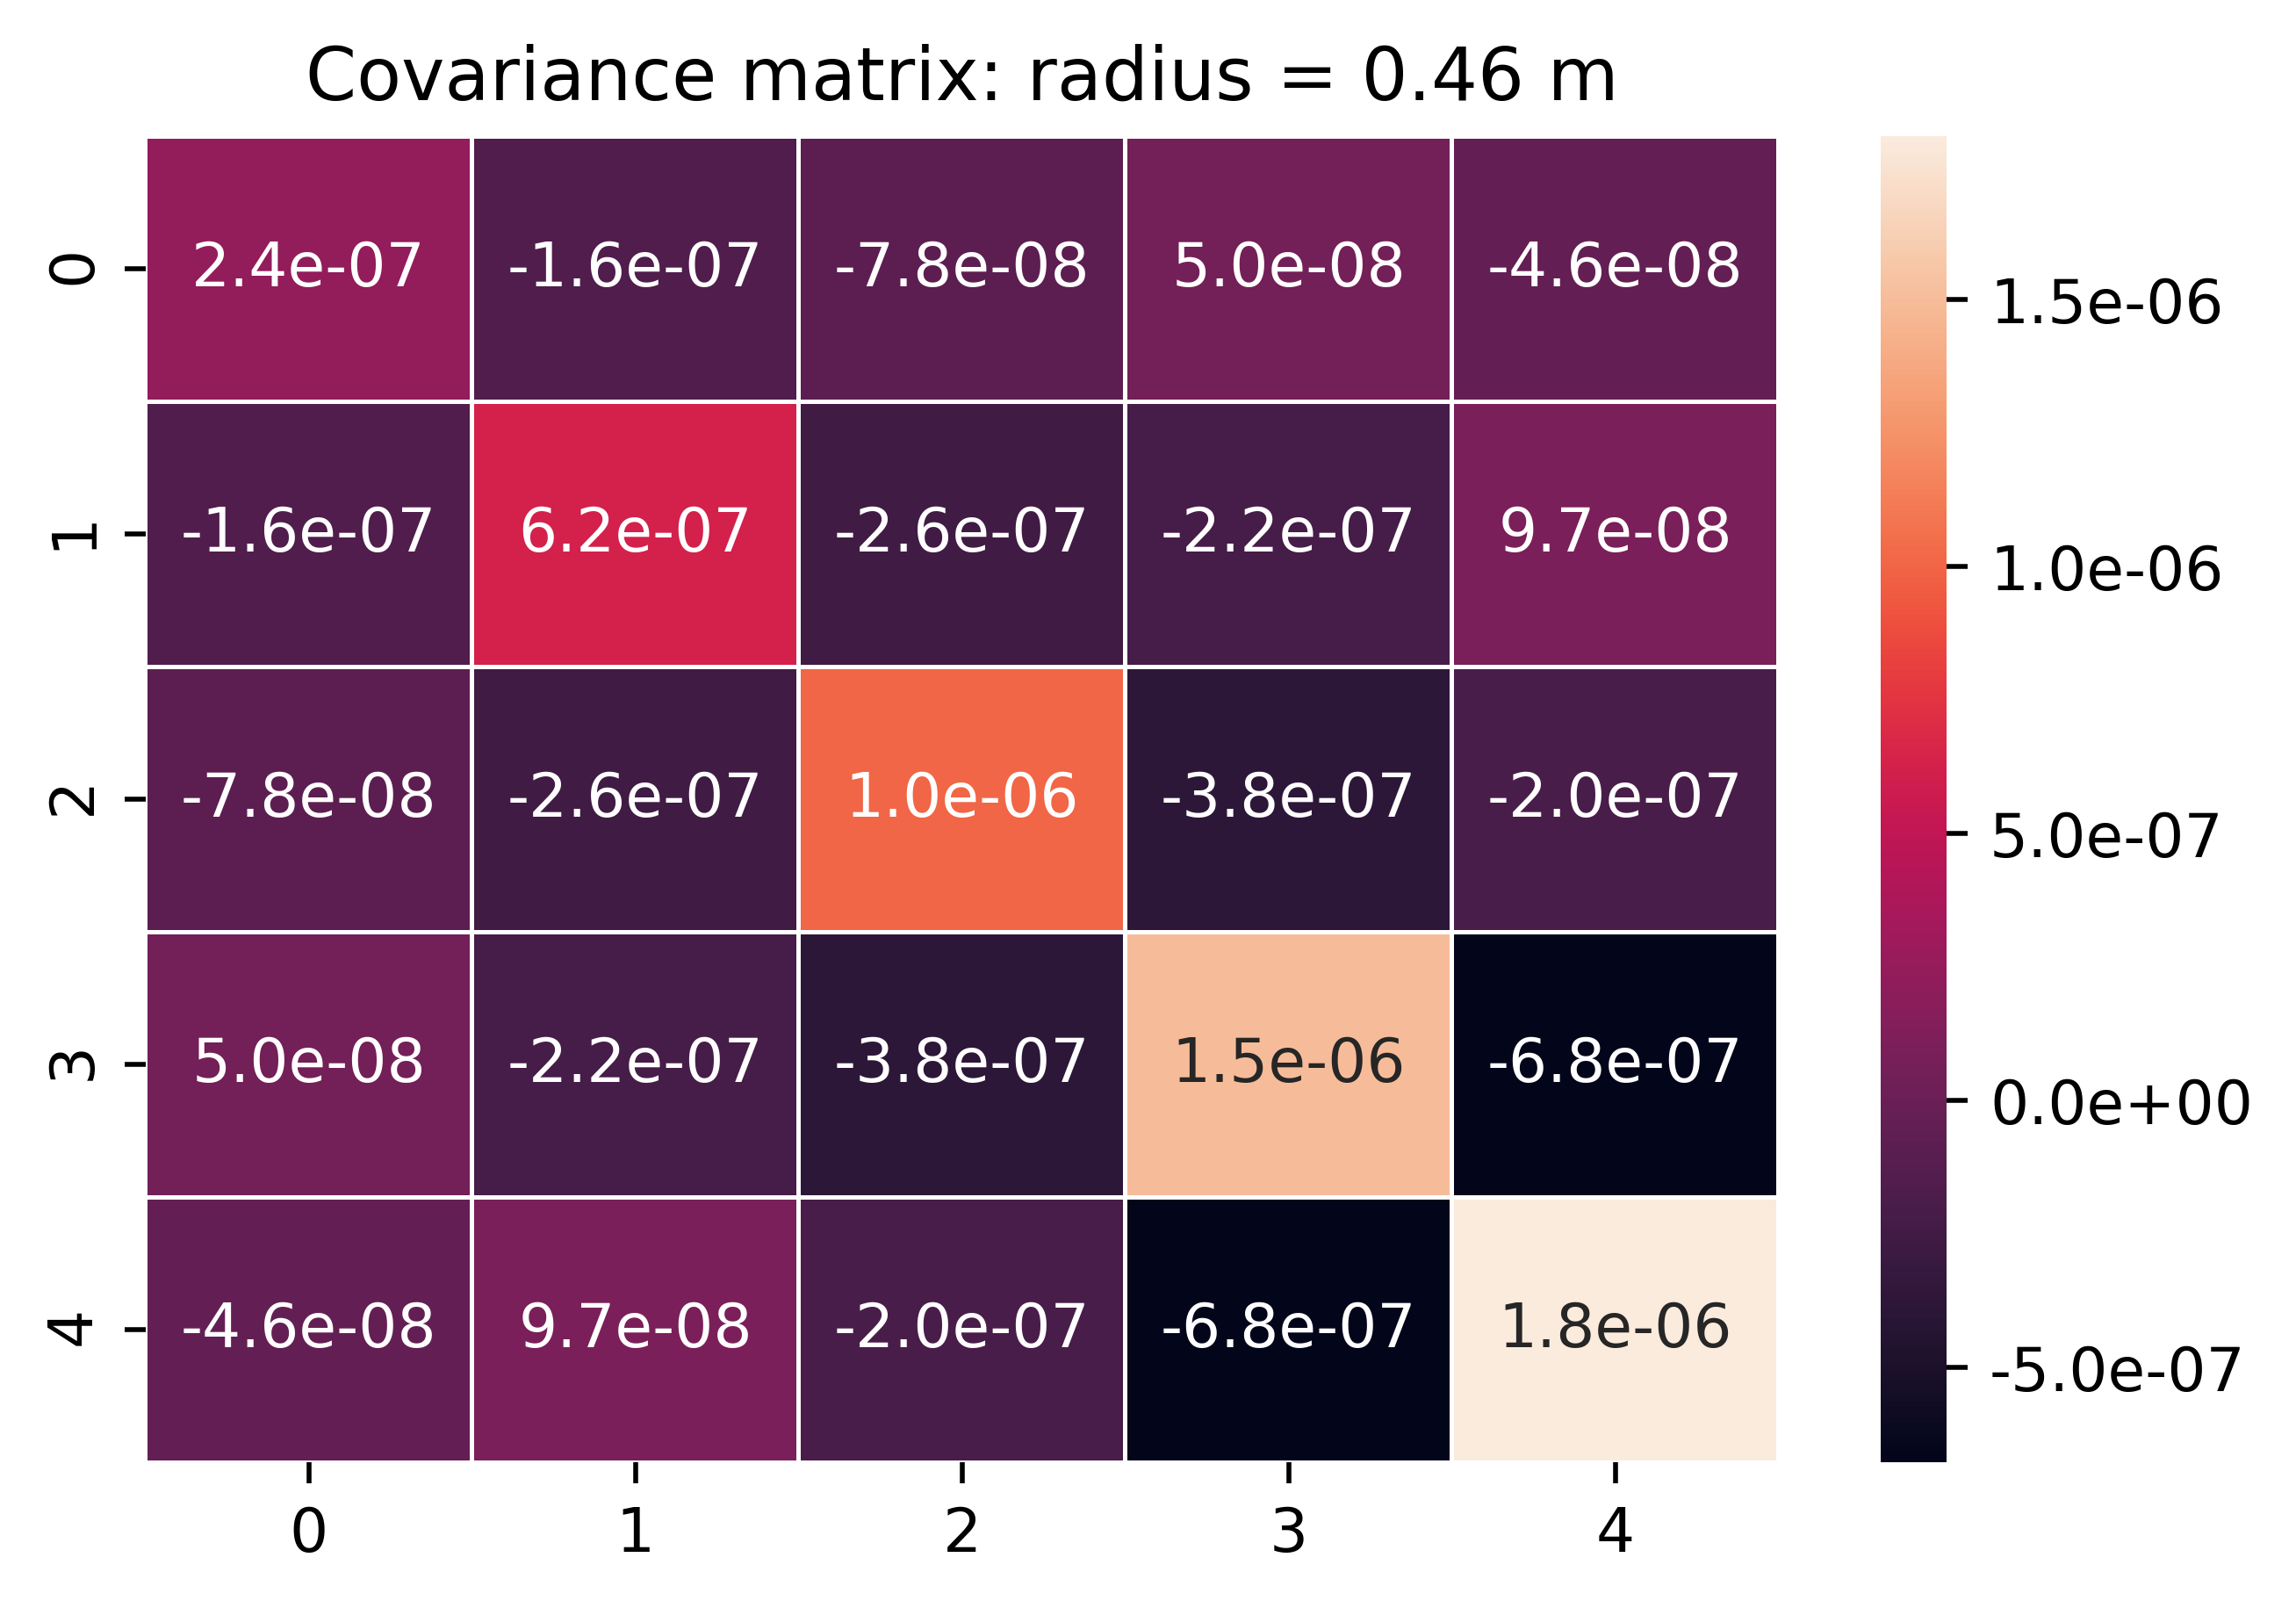

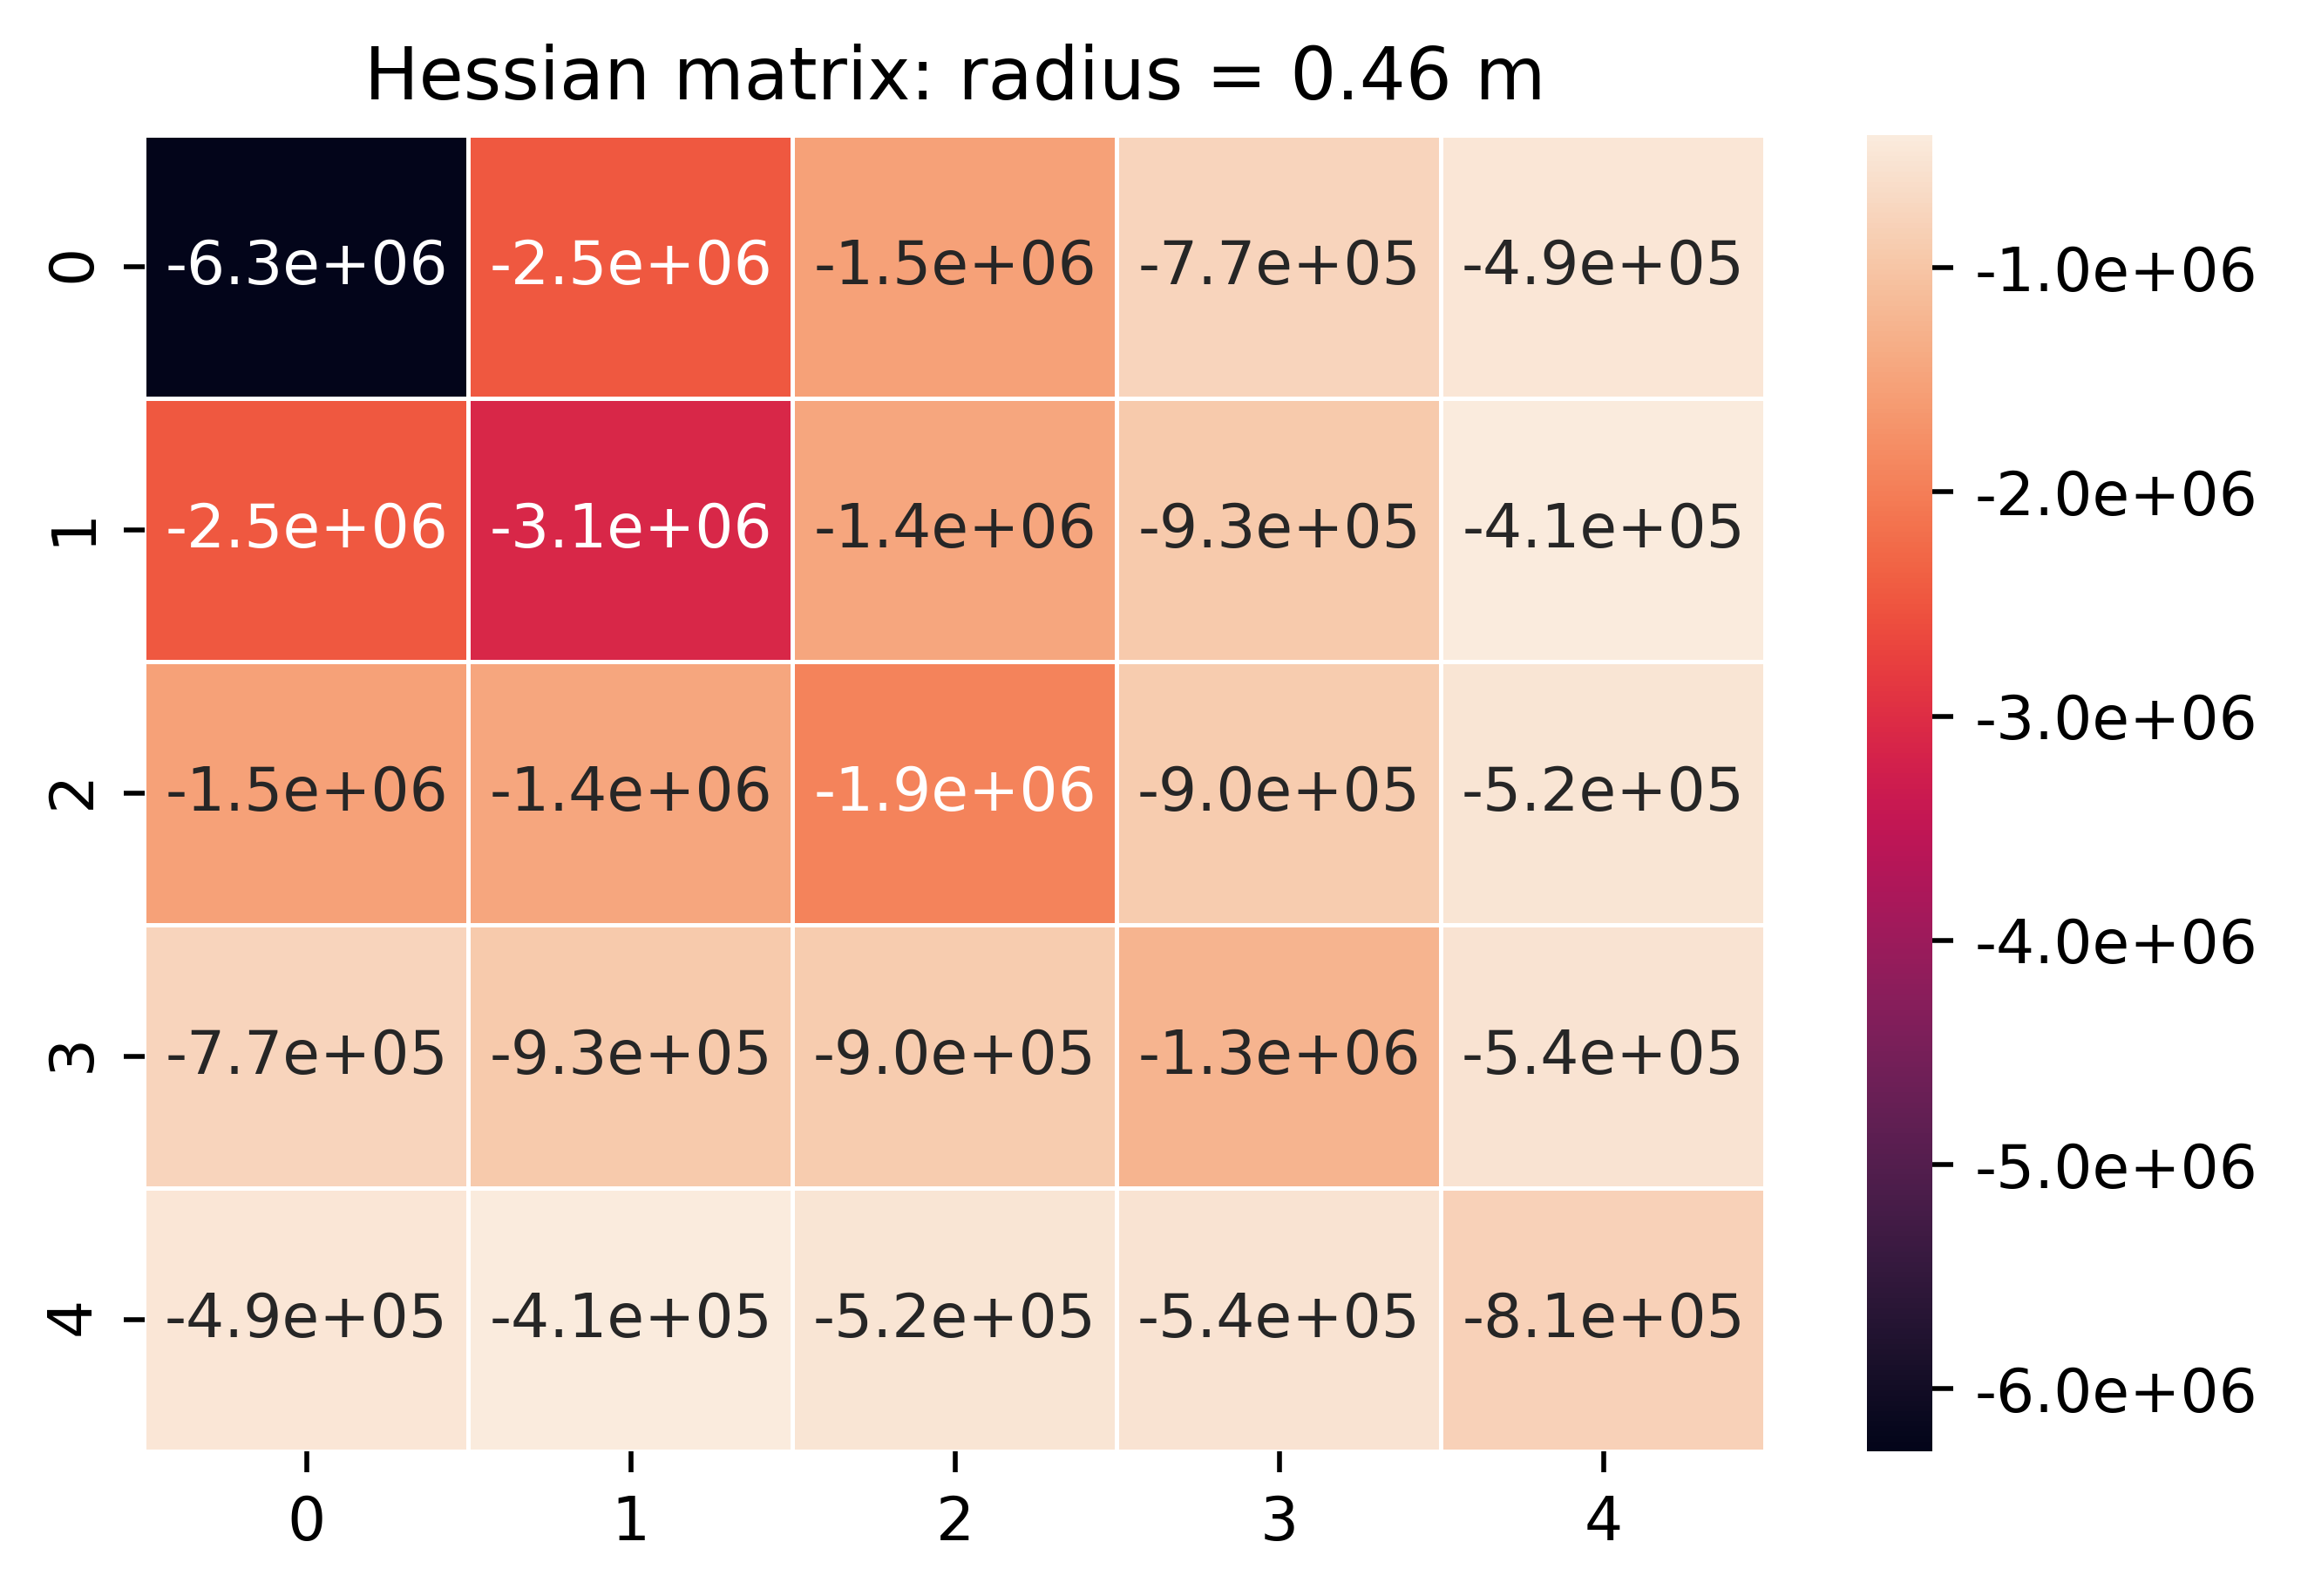

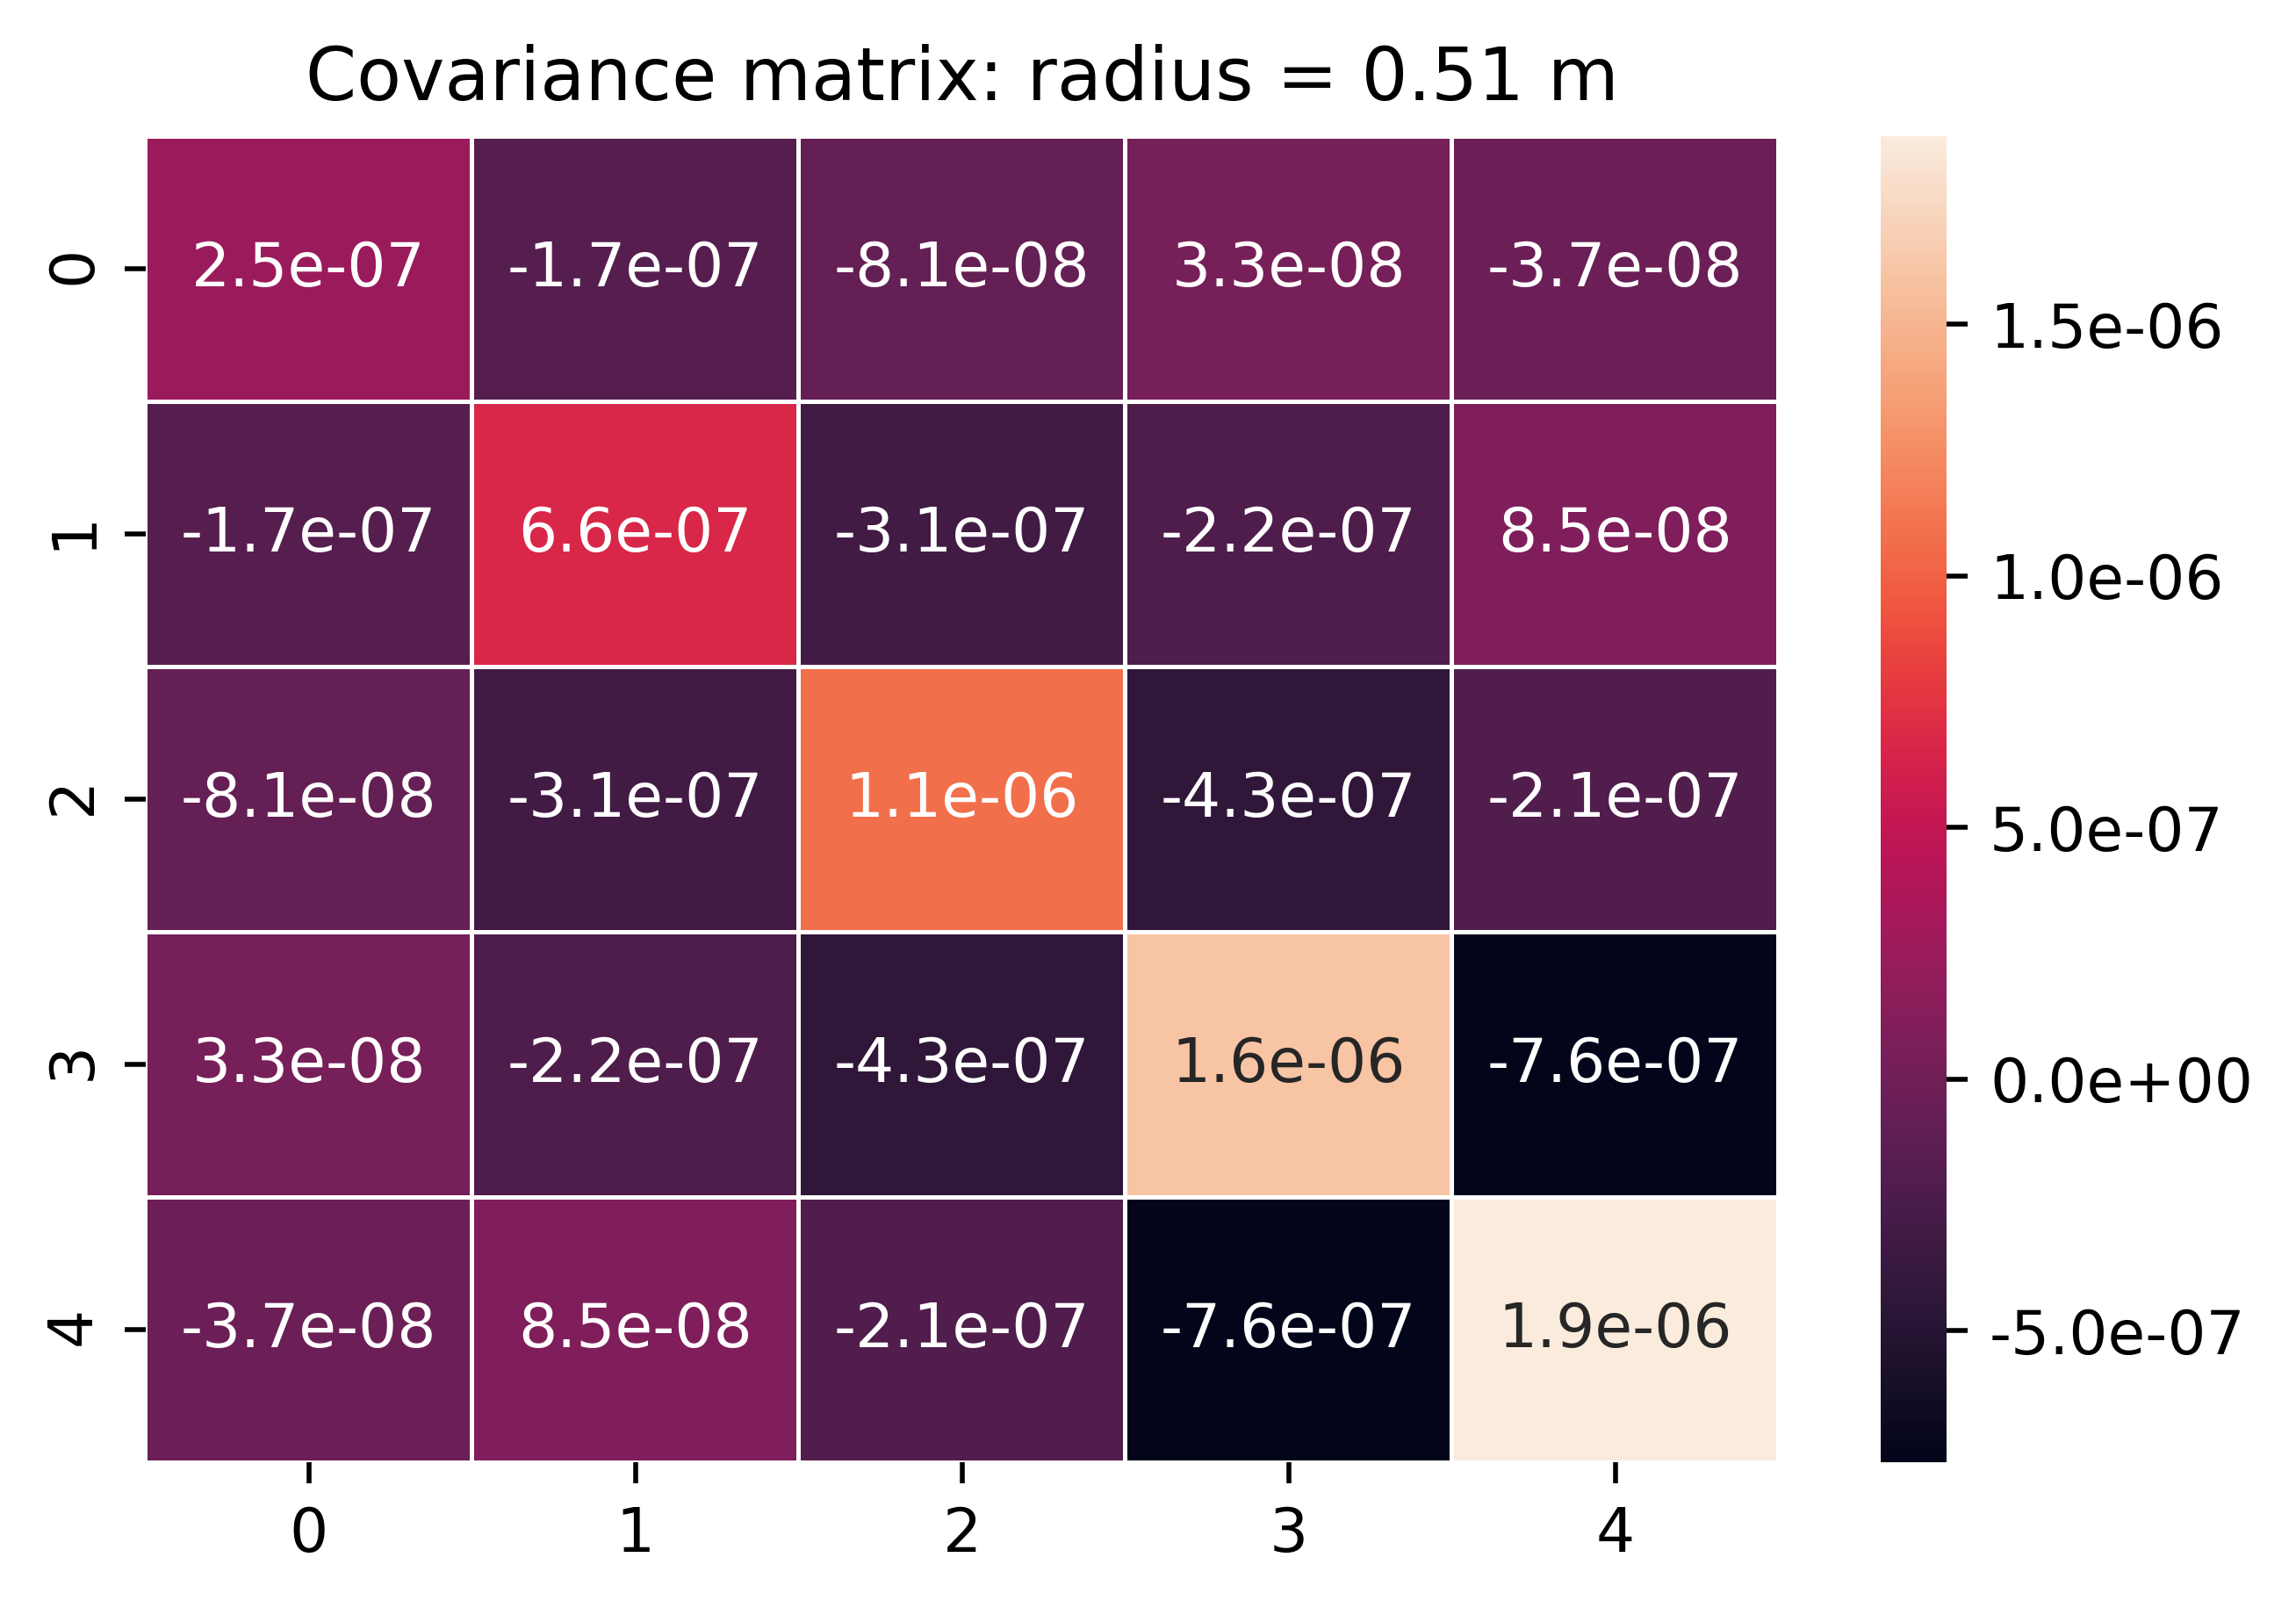

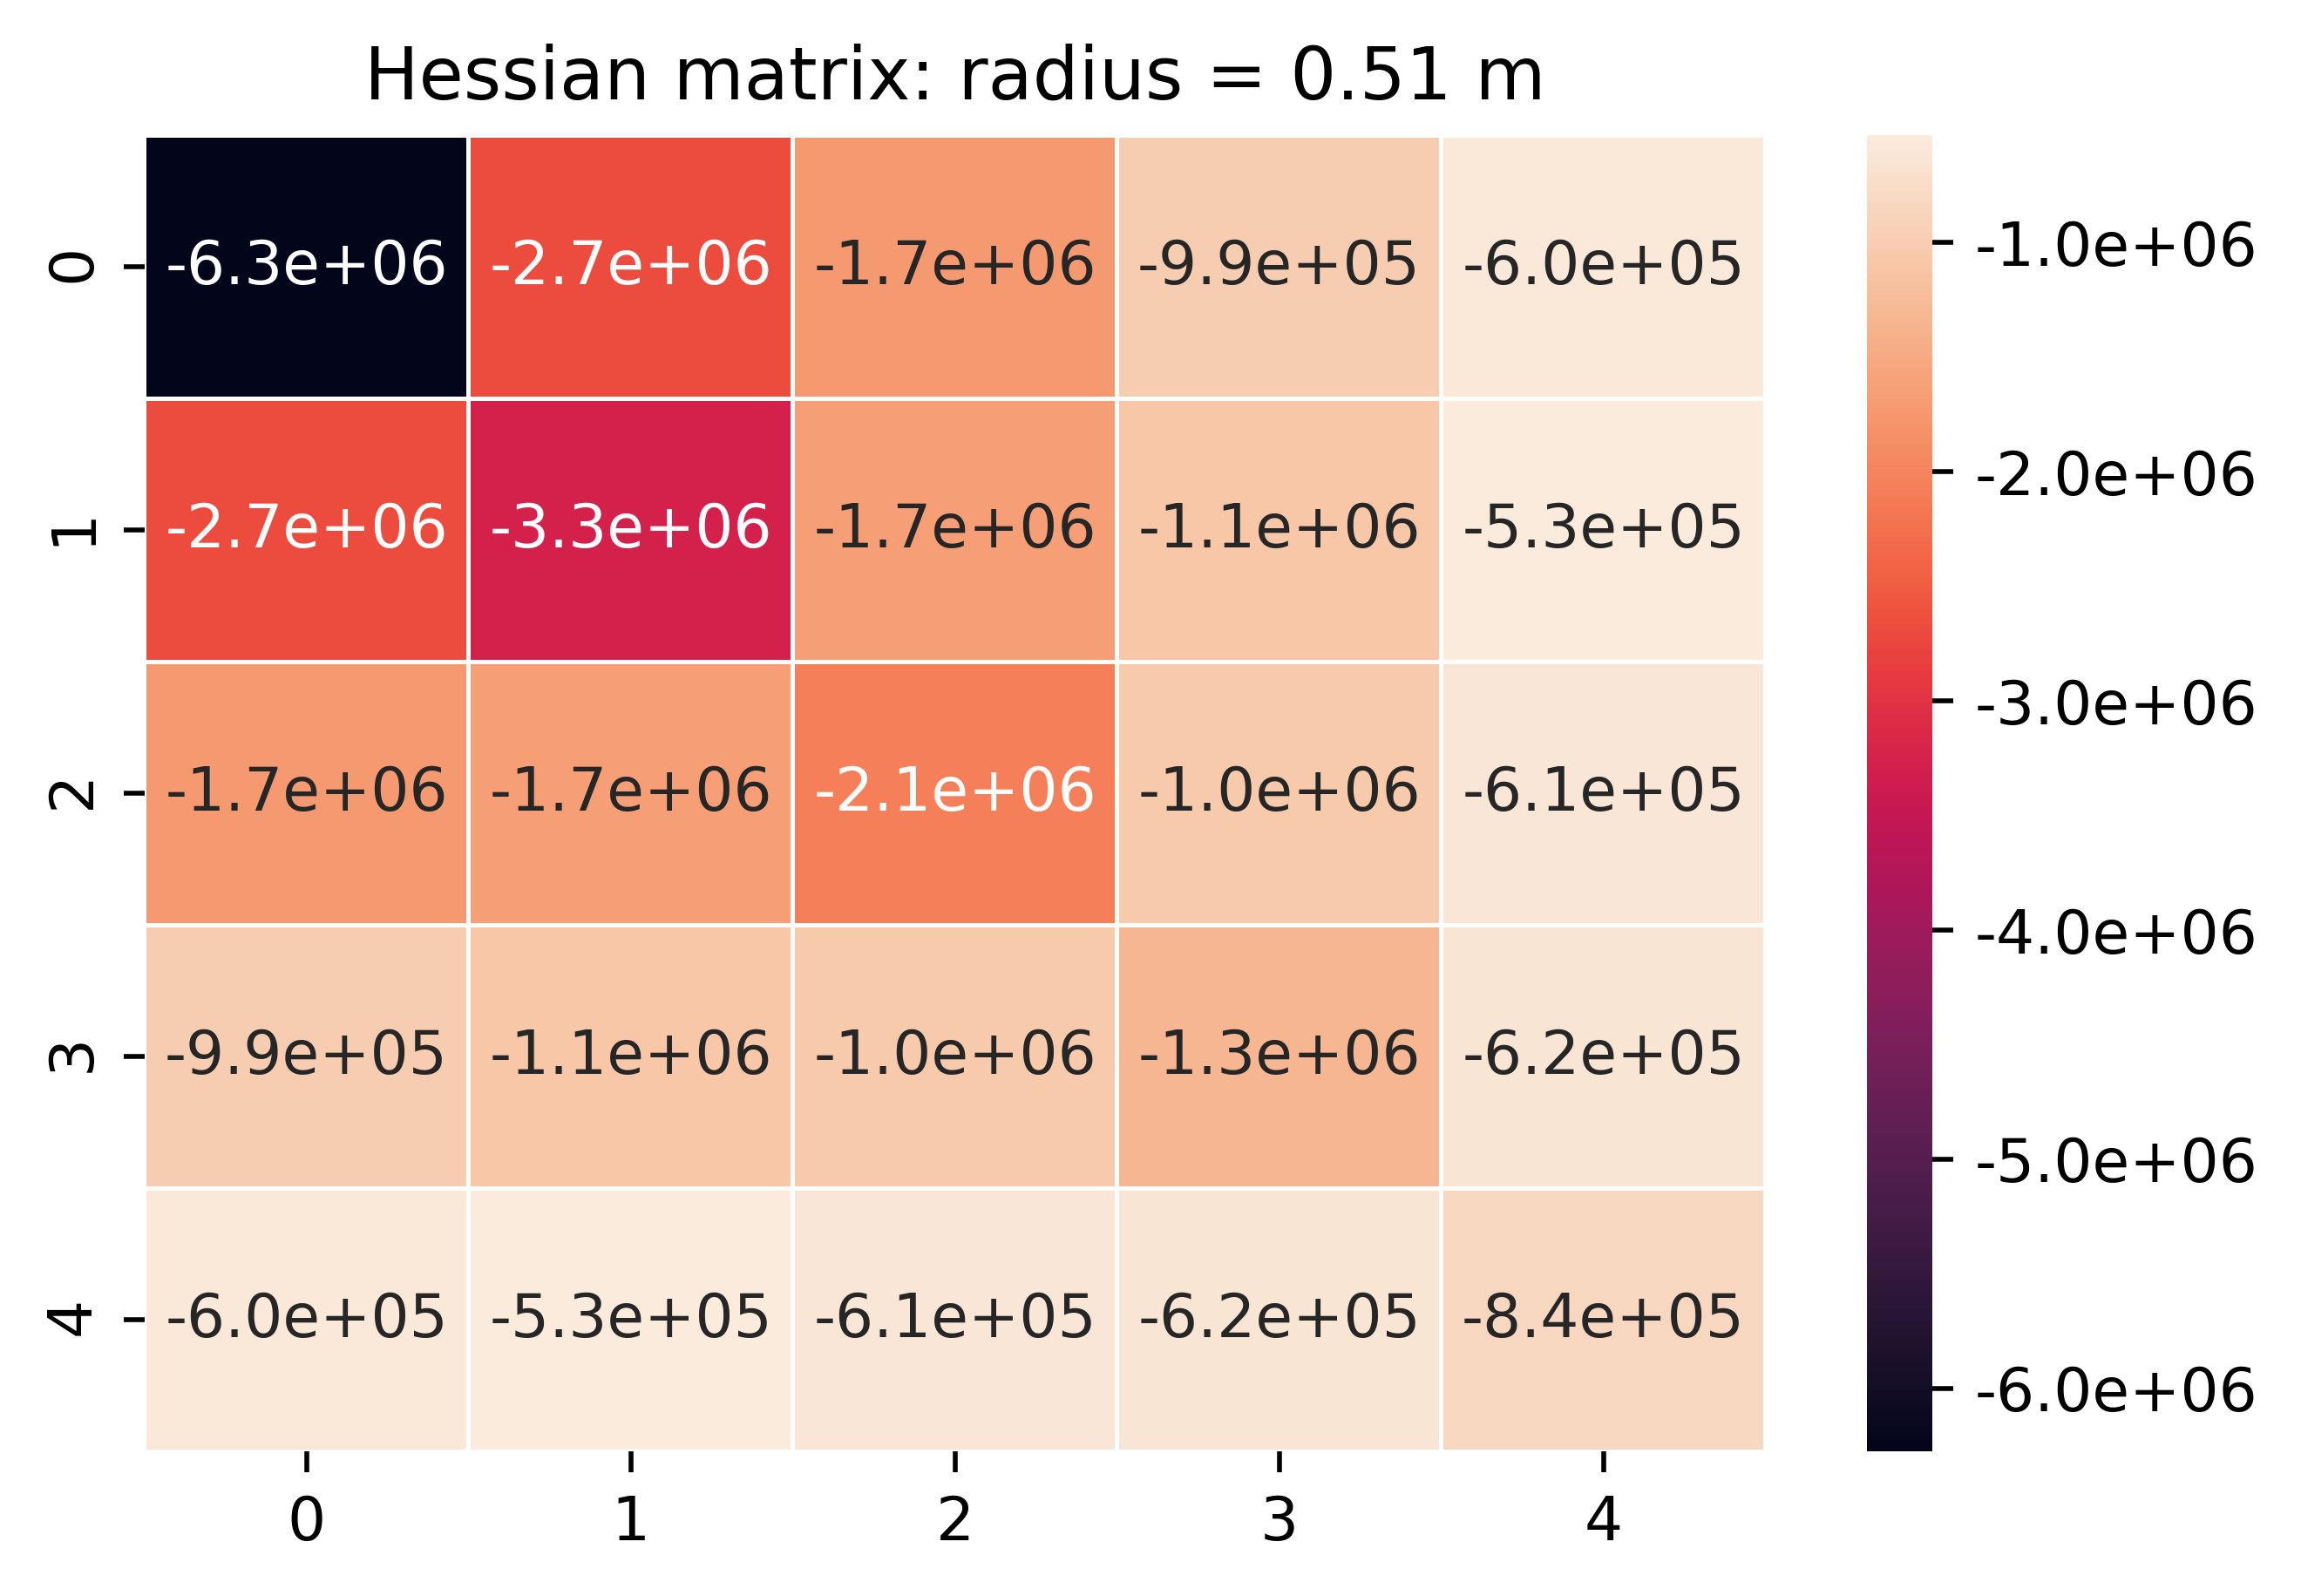

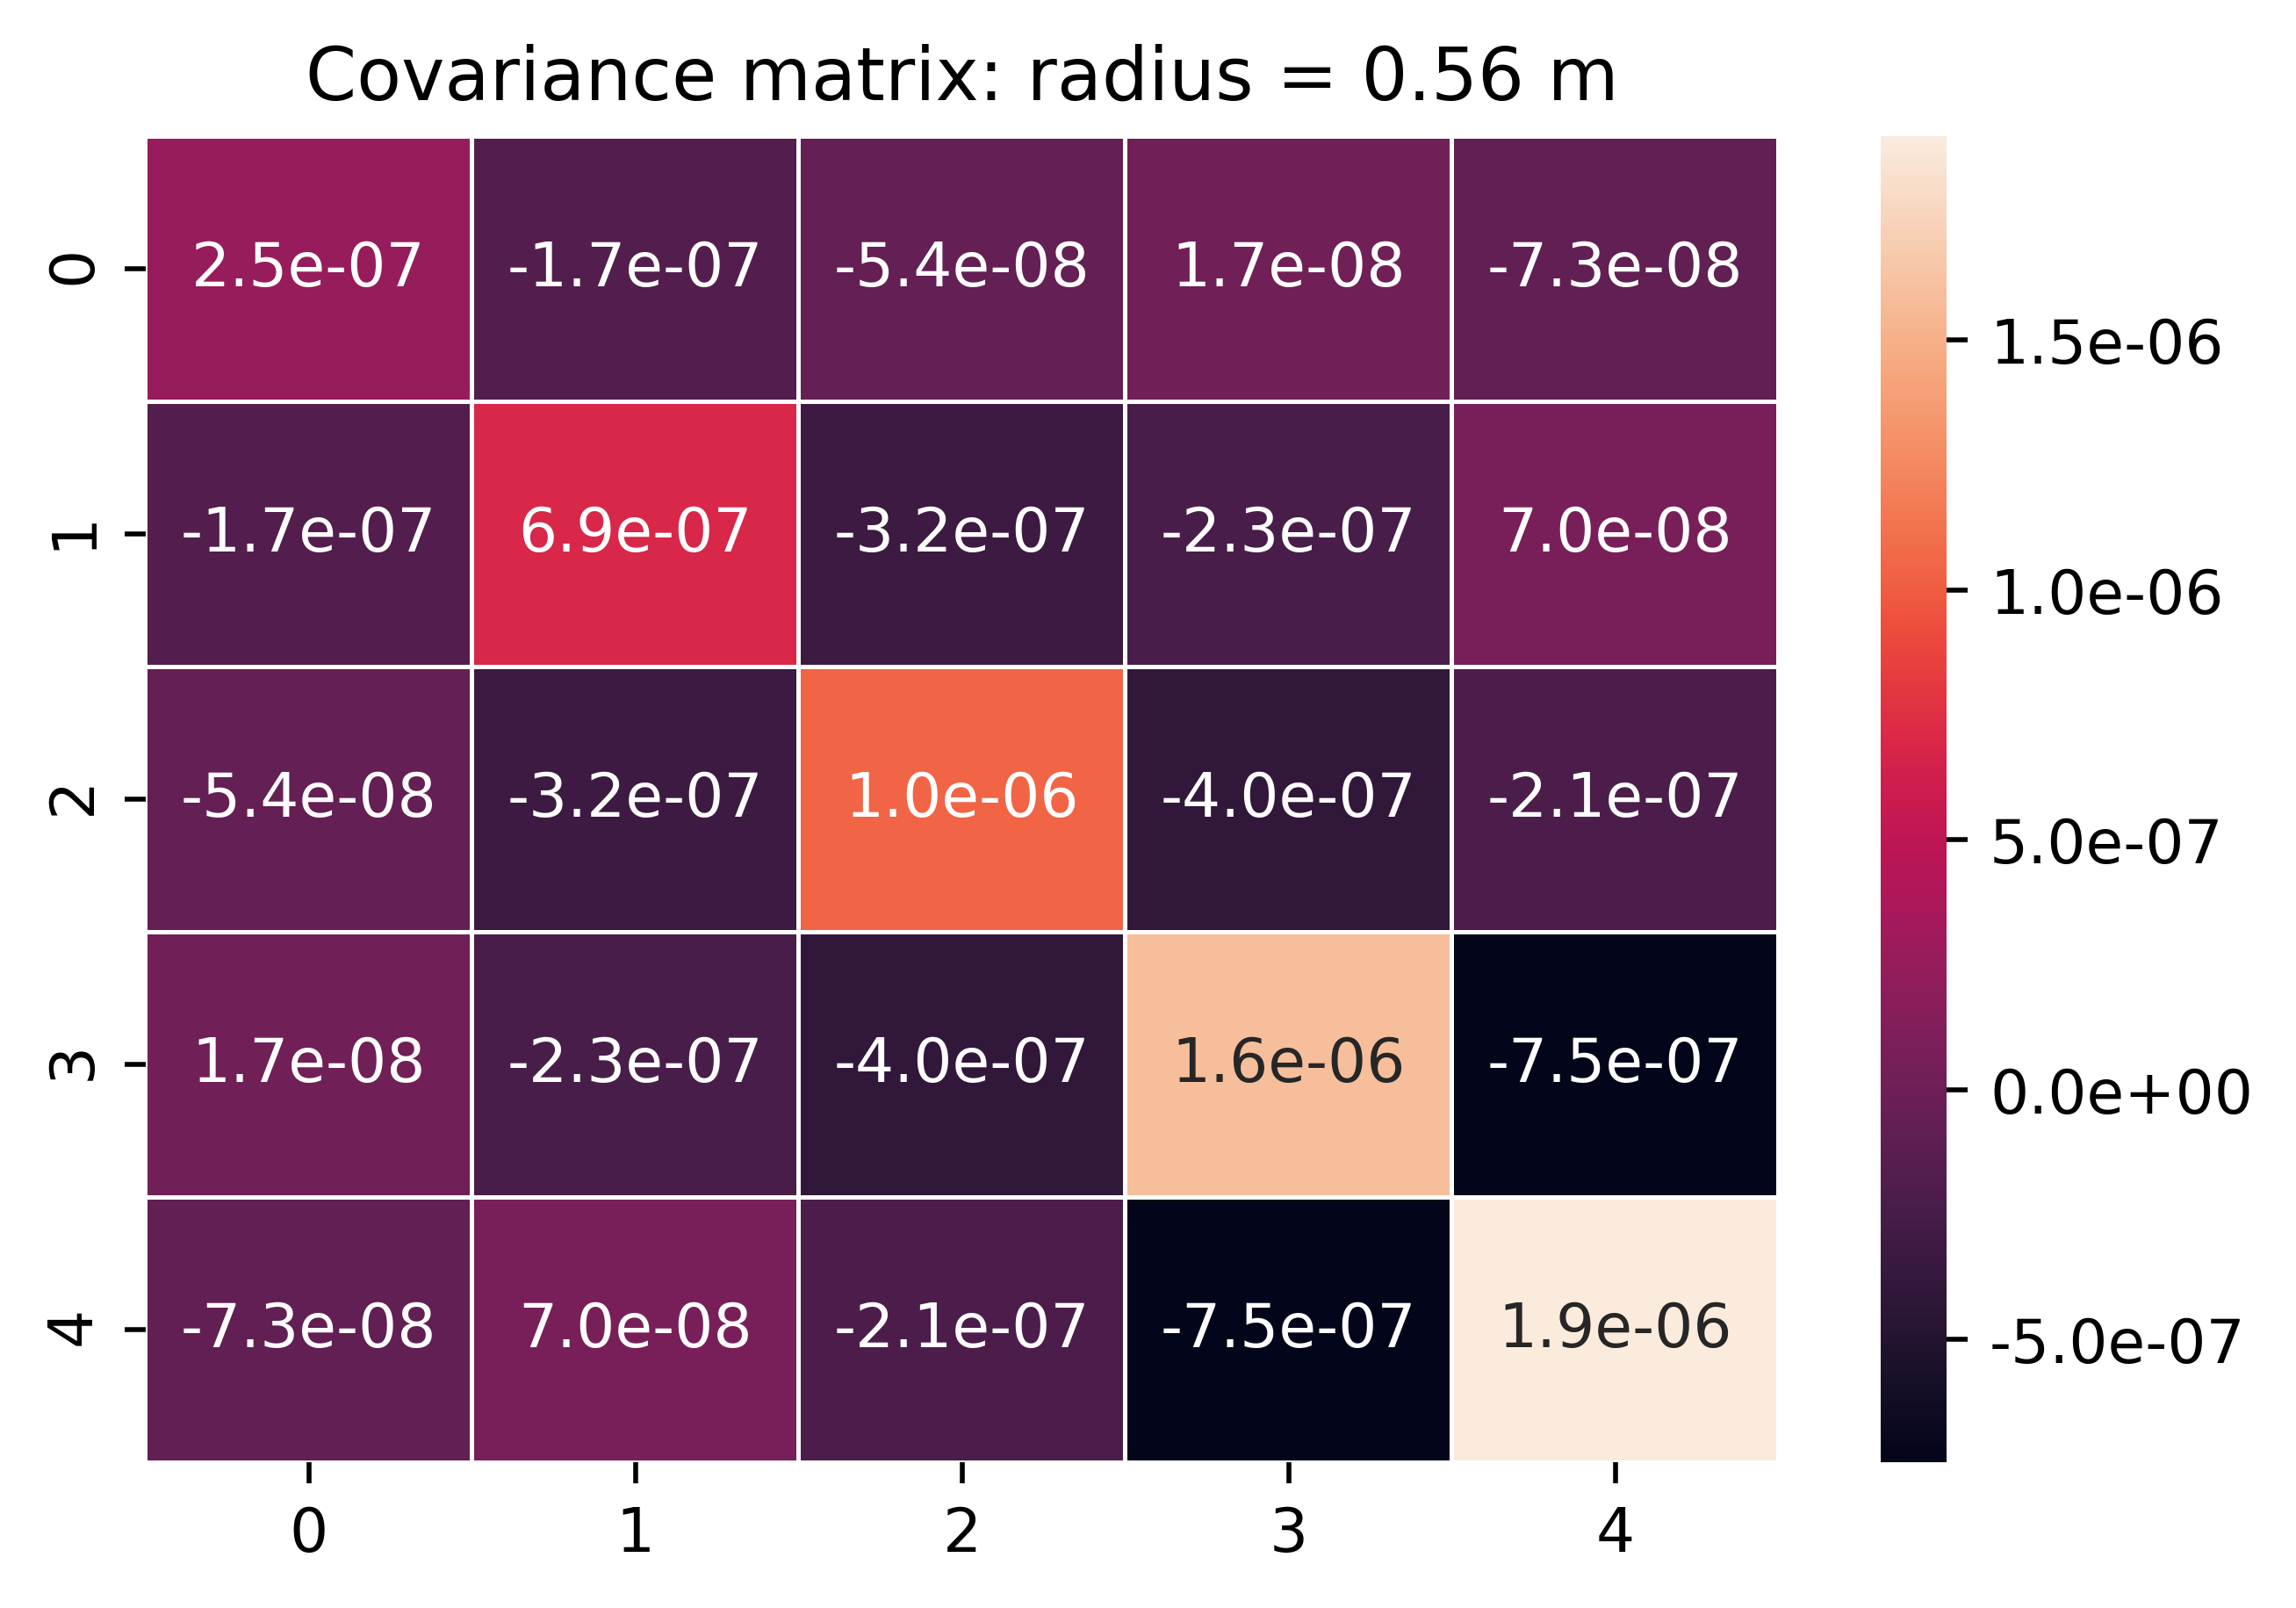

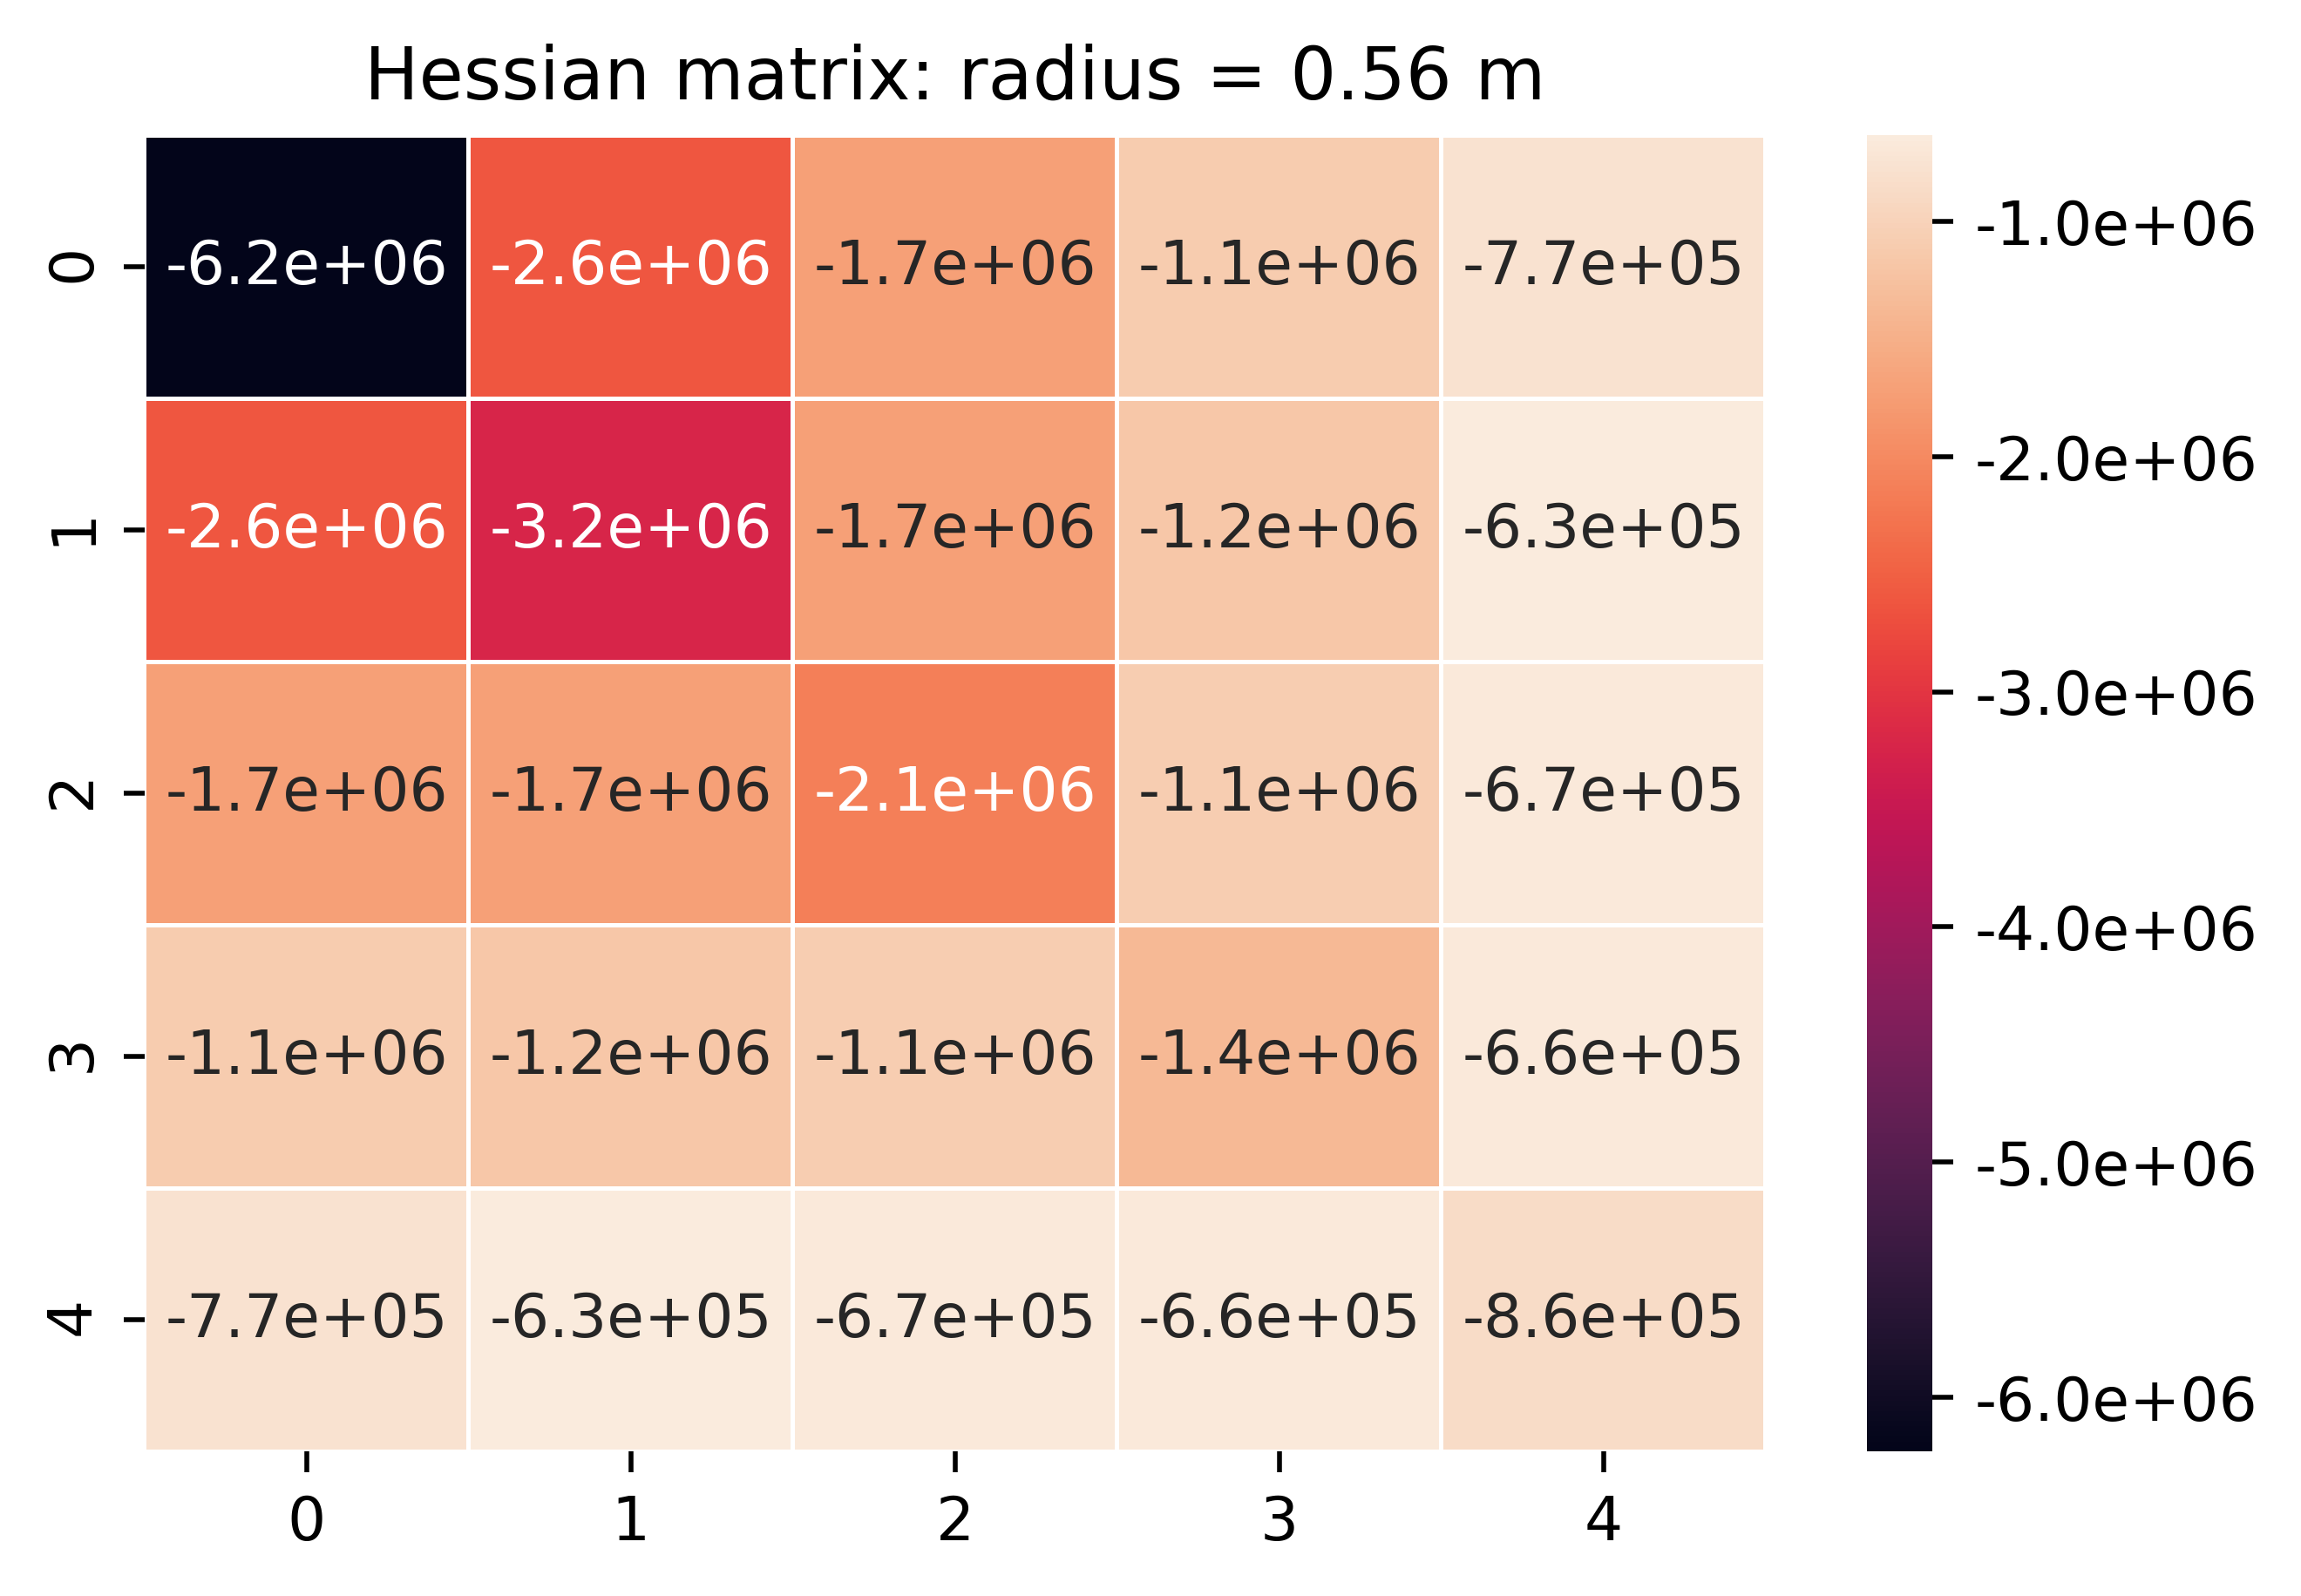

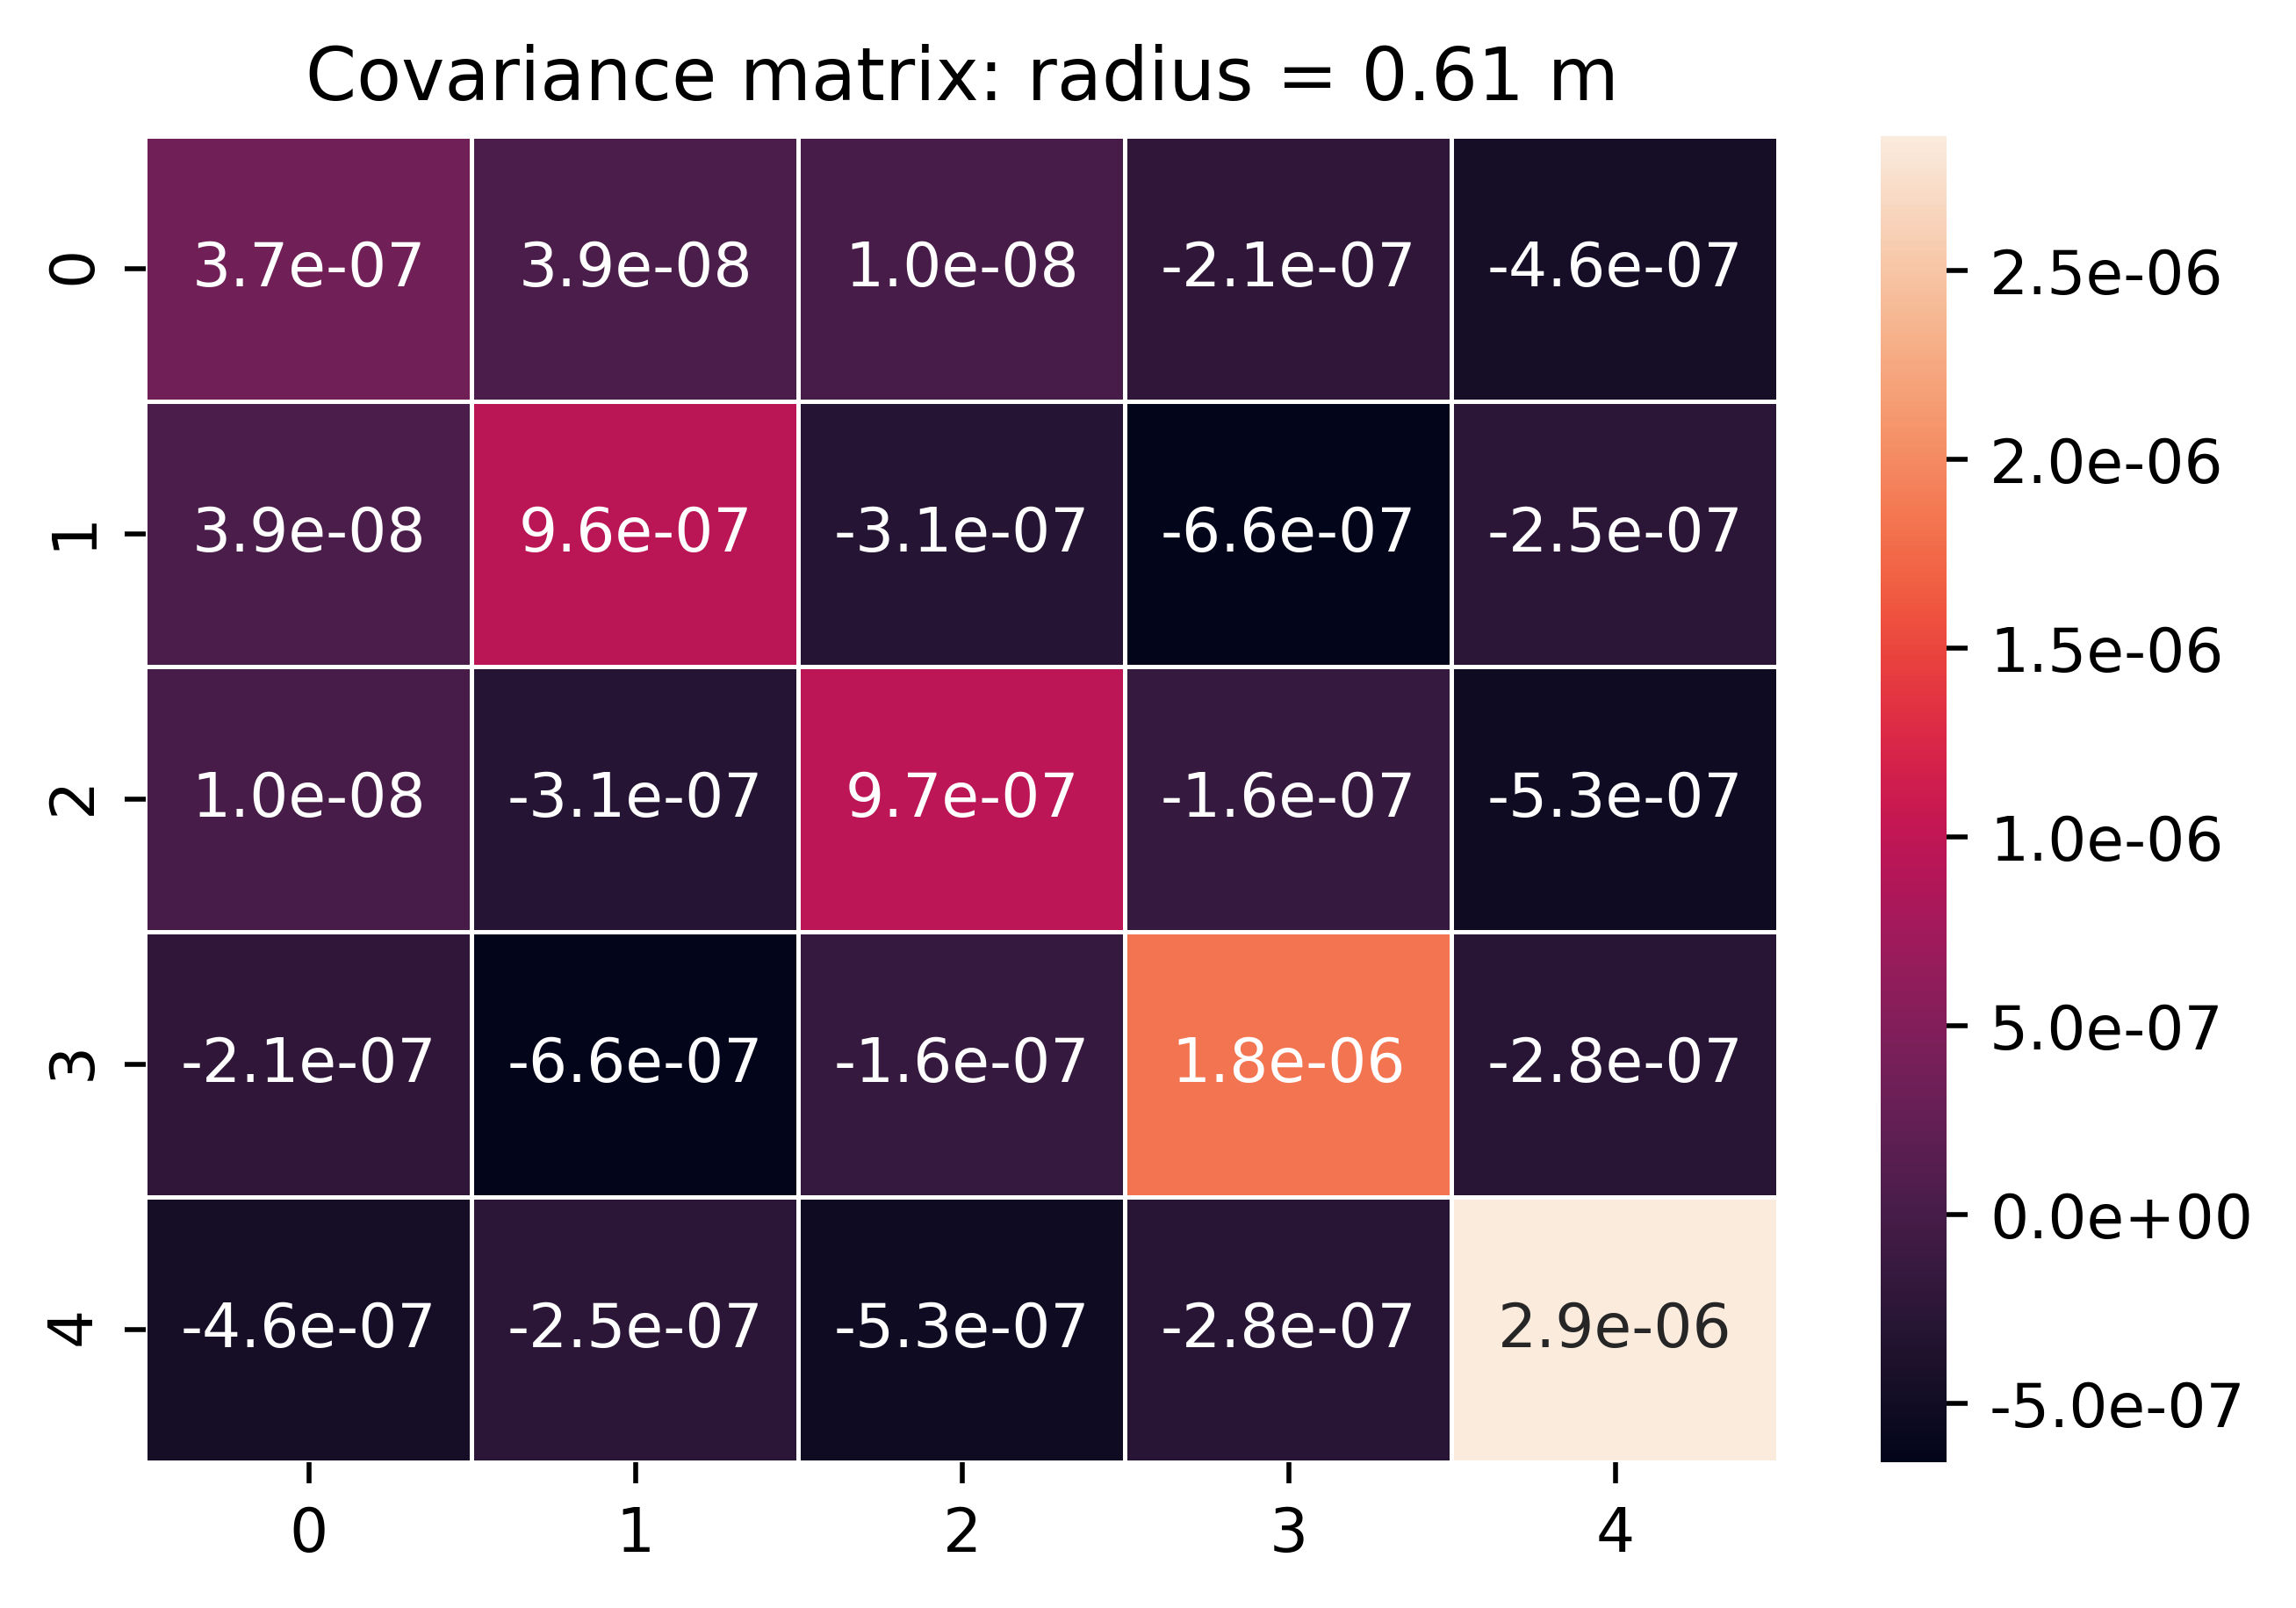

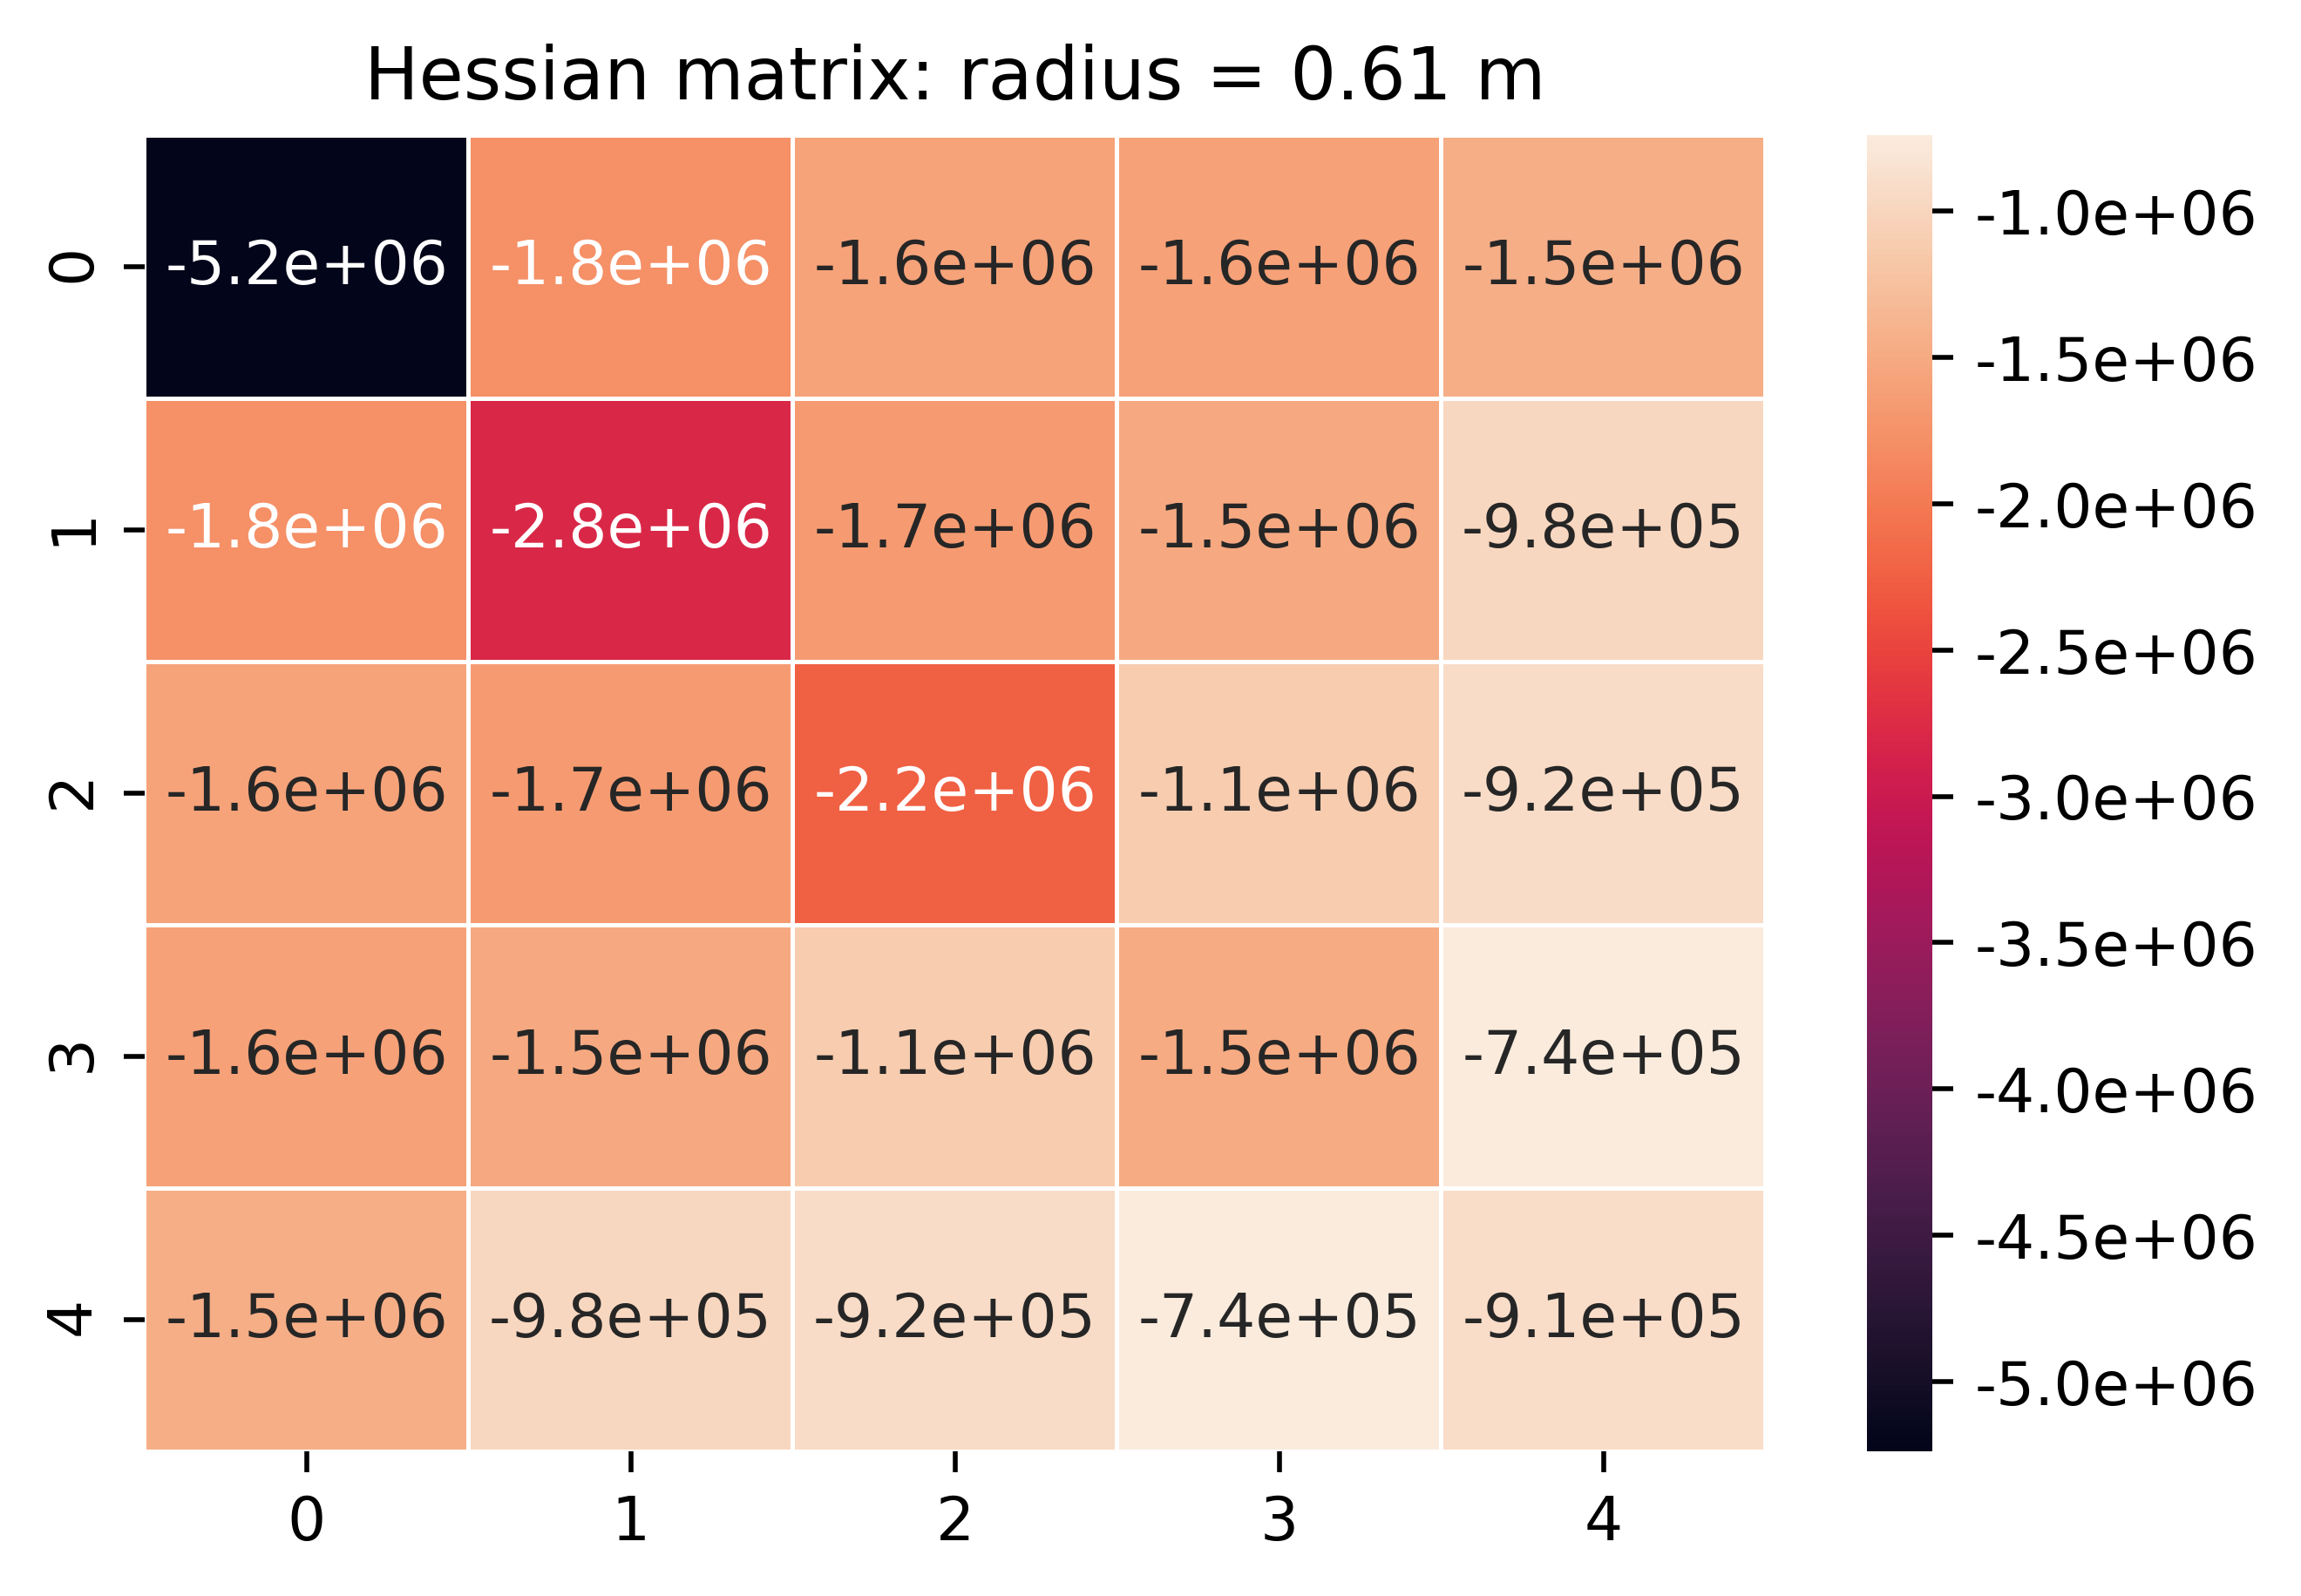

In [39]:
import seaborn as sns
for i_index,i in enumerate(np.array(rd)):
    plt.figure(dpi=500)
    #print(i)
    #print(Hessian[i_index])
    ax = sns.heatmap(np.linalg.pinv(Hessian[i_index]), linewidth=.5, annot=True, fmt=".1e",cbar_kws={'format': '%.1e'})
    #plt.contourf(np.linalg.pinv(Hessian[i_index]))
    #print(np.linalg.pinv(Hessian[i_index]))
    #plt.colorbar()
    #cbar = ax.collections[0].colorbar
    #cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
    plt.title('Covariance matrix: radius = %.2f m' % i)
    plt.savefig('Cov_%.2f.pdf' % i )
    plt.show()
    plt.figure(dpi=500)
    #print(i)
    #print(Hessian[i_index])
    sns.heatmap(-Hessian[i_index], linewidth=.5, annot=True, fmt=".1e",cbar_kws={'format': '%.1e'})
    #plt.contourf(np.linalg.pinv(Hessian[i_index]))
    #print(np.linalg.pinv(Hessian[i_index]))
    #plt.colorbar()
    plt.title('Hessian matrix: radius = %.2f m' % i)
    plt.savefig('Hess_%.2f.pdf' % i )
    plt.show()

In [ ]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els7/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))
ra = np.arange(0.01, 0.65, 0.05)
order = 5
coeff_pe = []
err = []
Hessian = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        coeff, H = LoadDataPE(path, str_radius, order)
        rd.append(np.array(radius))
        Hessian.append(H)
        coeff_pe = np.hstack((coeff_pe, coeff))
        err = np.hstack((err, np.sqrt(np.diag(np.linalg.pinv(H)))))
    except:
        print('error: %.3f' % radius)